# ANEOS PYROLITE MODEL DOCUMENTATION NOTEBOOK

## ANEOS PYROLITE<br>RELEASE VERSION: SLVTv0.2G1 <br>RELEASE DATE: 20220301

This Jupyter notebook provides documentation for an ANEOS model for pyrolitic melt composition.

<b>Reference: S.T. Stewart, B.A. Chidester, R. Caracas, J. Badro, M.L. Harwell, M. Huff, S.B. Jacobsen, P. Kalita, D.K. Spaulding, A hydrocode EOS for pyrolitic mantles and magma oceans. Lunar and Planetary Science Conference, 53, Abstract 1535, 2022.</b><p>

When this verion of the model EOS is used, cite this reference and the doi-tagged Zenodo archive that corresponds to the released version of the EOS model on github. The README file in the github repository provides the history of release versions and doi numbers.
 
Future updates to this EOS will be archived in Zenodo doi-tagged version-controlled releases.

We use two tabulated quality parameters to help guide usage of this EOS model, as described in https://github.com/ststewart/aneos-forsterite-2019/.<p>

Sarah T. Stewart <br>
sts@ucdavis.edu <br>
June 15, 2021<br>
June 20, 2021, v0.1<br>
June 27, 2021, v0.2<br>
March 1, 2022, v0.2 documentation, data comparison updates and official release<p>

<b>VERSION INFORMATION</b><br>
Forsterite EOS Version: Pyrolite-ANEOS-SLVTv0.2G1<br>
SLVT# translates to solid-liquid-vapor-thermal model adjustment-version number<br>
G1 = the gridded EOS tables used the gridflag=1 definition for the grid points<br>
SLVTv0.2G1 Release Date: 20220301<br>
GitHub: https://github.com/ststewart/aneos-pyrolite-2022/<p>

This is a solid-liquid-vapor ANEOS model with ionization for a simplified pyrolitic silicate composition (Ca$_{0.87}$Fe$_{2.03}$Mg$_{20.22}$Al$_{1.98}$Si$_{16.27}$O$_{58.63}$). This model EOS uses the new heat capacity adjustment factor described in Stewart et al. (AIP Conference Proceedings, 2020) and Stewart, ANEOS Code Modification: Thermal model adjustment parameter, https://github.com/ststewart/aneos-forsterite-2019/EOS-docs/, 2019. <p>

This Jupyter notebook was used to develop and document ANEOS input parameters that are optimized for the liquid and vapor regions. This model EOS is intended for problems involving bodies with bulk silicate Earth composition in the melt and and partial vaporization regimes.<p>

This model was developed with unpublished data (Caracas and Stewart, in prep., and Chidester et al., in prep.), which will be added to the github repository upon publication. <p>

A reference list is provided at the end of this notebook. PDFs of some of the open access technical references are included in https://github.com/ststewart/aneos-forsterite-2019/EOS-docs/.<p>

<b>USAGE</b><br>
This notebook interacts with multiple outputs from ANEOS, including phase boundary information, the calculated Hugoniot, and tabulated EOS. The notebook also reads in material properties data and extracted data from previous versions of ANEOS model parameter sets for forsterite.

This notebook is designed to be used in two modes:<br>
<ul>
<li> Development mode: ANEOS is called in the local directory to generate new model output. The user can varying the model input parameters and tabular gridding schemes. This notebook produces plots of the equation of state surface and comparisons to experimental data and ab initio calculations.
<li> Release mode: the notebook interacts with previously created ANEOS model output. This notebook provides detailed documentation of a version-controlled release of the model EOS and enables users to interact with the EOS surface and compare the model to data. 
</ul>

This notebook is distributed in release mode. Users who wish to use the development mode can obtain the ANEOS source code from: Thompson, S. L., Lauson, H. S., Melosh, H. J., Collins, G. S., & Stewart, S. T. (2019, November 1). M-ANEOS (Version 1.0). Zenodo. http://doi.org/10.5281/zenodo.3525030.<p>

Development mode:<br>
The notebook calls a local aneos executable which expects a formatted ANEOS.INPUT ascii file and an ascii gridtable.txt definition file that is generated by this notebook. ANEOS produces an ANEOS.OUTPUT ascii file and gridded ascii SESAME-format EOS tables.<br>
The user edits (1) the input parameters in ANEOS.INPUT (separately from this notebook) and (2) the output EOS table parameters in the notebook cell below.<br>
This notebook reads some parameters from ANEOS.INPUT and assumes that the variables are spaced by 10 columns.<br> 
When the notebook is run, the code issues a system call to run the aneos program in the local directory and reads in results from the ANEOS.OUTPUT, NEW-SESAME-STD.TXT, and NEW-SESAME-EXT.TXT files to make the plots below and to generate the GADGET format EOS table and other miscellaneous files.<p>

Release mode:<br>
This notebook reads in the provided ANEOS.INPUT, EOS tables, and other distribution data to generate the plots below. <p>

<b>OUTPUT/PROVIDED DATA FILES</b><br>
ANEOS.OUTPUT: Plain text file with an overview of the calculated equation of state. Look at this file for any errors in the EOS calculation.<br>

NEW-SESAME-STD.TXT: Standard length Sandia-style SESAME file with 201 table and 301 table (density, temperature, pressure, sp. internal energy, Helmholtz free energy). 301 table units: g/cm$^3$, K, GPa, MJ/kg, MJ/kg. <br>

NEW-SESAME-EXT.TXT: SESAME-style table with extra variables from ANEOS. Contains the standard 201 table and non-standard 301-extra-variables EOS table. The 301 table has: density grid values, temperature grid values, sp. entropy(T,rho), sound speed(T,rho), sp. heat capacity(T,rho), KPA flag(T,rho). 2-D arrays list all densities, looping over each temperature. 301 table units: g/cm$^3$, K, MJ/K/kg, cm/s, MJ/K/kg, integer flag, integer flag. The KPA flag is an ANEOS output with phase information. <br>

NEW-SESAME-HUG.TXT: Ascii table with the reference state Hugoniot. <br>

NEW-SESAME-MDQ.TXT: Ascii 301-style SESAME table with the MDQ rating. <br>

NEW-SESAME-IEP-BILINEAR.TXT: Standard length Sandia-style SESAME file with 201 table and 301-style table containing the IEP values for bilinear interpolation. Format: 1-D interpolated density points, 1-D interpolated temperature points, 2-D IEP arrays for pressure, sp. internal energy, Helmholtz free energy, sound speed). IEP units are ratios to the original calculated ANEOS point values. Located in the interpolation subdirectory.<br>

NEW-SESAME-STD-NOTENSION.TXT: Standard length Sandia-style SESAME file with 201 table and 301 table (density, temperature, pressure, sp. internal energy, Helmholtz free energy) where the ANEOS tension region is removed and replaced with the solid-vapor coexistence region. 301 table units: g/cm$^3$, K, GPa, MJ/kg, MJ/kg. <br>

NEW-SESAME-GADGETINIT-NOTENSION.TXT: Standard length Sandia-style SESAME file with 201 table and 301 table (density, temperature, pressure, sp. internal energy, specific entropy) where the ANEOS tension region is removed and replaced with the solid-vapor coexistence region. 301 table units: g/cm$^3$, K, GPa, MJ/kg, MJ/K/kg. <br>

NEW-GADGET2-STD-NOTENSION.TXT: Standard GADGET2 EOS table generated by interpolating the ANEOS table with no tension. Format: number of density points, number of sp. entropy points, density grid values, sp. entropy grid values, 2-D arrays of pressure, temperature, specific internal energy, sound speed. 2-D array values list all densities, looping over each value for specific entropy. Units: g/cm$^3$, erg/K/g, dynes/cm$^2$, K, erg/g, cm/s. <br>

NEW-GADGET2-EXT-NOTENSION.TXT: Extended variables GADGET2 EOS table generated by interpolating the ANEOS table with no tension. Format: number of density points, number of sp. entropy points, density grid values, sp. entropy grid values, 2-D arrays of Helmholtz free energy, KPA flag, MDQ flag. 2-D array values list all densities, looping over each value for specific entropy. Units: g/cm$^3$, erg/K/g, erg/g, integer flag, integer flag. <br>

The SESAME tabular equation of state formats are described in Lyon and Johnson (1992).<p>

<b>APPLICATIONS AND LIMITATIONS</b><br>
    
Pyrolite is a compositional model for the chemistry and mineralogy of the entire Earth's mantle that approximates the bulk silicate Earth of today, after separation of the iron core (McDonough and Sun, 1995). This composition is based on synthetic glass samples prepared by J. Badro for shock Hugoniot measurements (Chidester et al. AGU Fall Meeting 2021; Stewart et al. LPSC 2022). The initial bulk density of the glass was 2.94 g/cm$^3$. The composition is similar to the one used by Solomatova and Caracas (2019) and Caracas and Stewart (in prep.) for ab initio calculations of the fluid under terrestrial magma ocean conditions and around the vapor curve: NaCa$_2$Fe$_4$Mg$_{30}$Al$_3$Si$_{24}$O$_{89}$. The ab initio data was used as part of this model development.
    
The reference state is the solid at STP. In ANEOS, the liquid model is a modification of the solid model. As a compromise to span the whole phase diagram, the solid does not represent the true multi-mineral physical properties of a pyrolitic composition. In particular, the solid bulk modulus is lower than the true material to better fit the liquid region experimental data; the increased compressibility partially compensates for the lack of denser, high-pressure minerals. The heat capacity adjustment parameter is fitted to the available shock temperatures and model estimates for the equation of state. The Debye temperature is fitted to attain the desired specific entropy at melting with a single solid phase. Forsterite data was used as a representative of the single component treatment of pyrolitic composition when necessary, e.g. to define the melting point and shock temperatures from an initial solid phase.

This EOS table is appropriate for problems where bulk silicate Earth composition is present as a warm solid near the melt curve, liquid, and partially vaporized. The temperatures in the liquid field are much improved with the adjusted heat capacity compared to previous ANEOS models using the Dulong-Petit limit.

This model does not include a high-pressure phase transition to avoid the artificial discontinuities introduced in the liquid field by ANEOS. This model becomes increasingly erroneous for shock pressures above about 2000 GPa as the curvature on the Hugoniot and the Grueneisen parameter are not correct at extremely high densities (this model does not approach the Thomas-Fermi limit).

This model is not appropriate for problems entirely in the solid mantles of planets. The modulus of the solid is too low and high-pressure polymorphs are neglected.

The functional form for the Gruneisen parameter in ANEOS has difficulty matching the properties of silicate liquids.<p>

The interpolation procedure to make the GADGET2 density-entropy-grid table uses linear interpolation on the same density grid as the density-temperature SESAME table to obtain the EOS values at each GADGET2 entropy grid point. This method introduces substantial errors in the vapor dome. <p>

The calculated critical point pressure is slightly high compared to the DFT estimate and other silicate critical points. The density and temperatures fall in the range constrained by DFT calculations. The vapor curve follows the 50% condensation point for the bulk silicate Earth composition calculated in Lock et al. JGR 2018. Thus this single phase treatment of the multicomponent system provides an estimate for the boiling point of 50% of the mass. <p>

<b>MODEL DEVELOPMENT QUALITY (MDQ) RATING</b><br>
We provide an MDQ rating which is saved as a 301-style SESAME table. The MDQ rating is a qualitative guide for users that provides some known quality control information. This information is necessarily subjective and incomplete. The rating does not guarantee any fidelity in the EOS model except for points that have been directly compared to experimental data in the plots below. See discussion with the plots below.

<b>INTERPOLATION ISSUES AND THE INTERPOLATION ERROR PARAMETER (IEP)</b><br>
The IEP measures the quality of the interpolation scheme for a specific variable on a specific density-temperature grid. Robust interpolation of wide-ranging EOS tables is known to be a difficult problem. Most interpolation schemes individually interpolate each variable, which leads to interpolated states that are not thermodynamically self-consistent. While some thermodynamically consistent interpolation schemes have been developed (e.g., Zeman et al. 2019), they more computationally intensive than simpler interpolation methods and have not been widely implemented yet.

The IEP is calculated on the density-temperature grid using the following method: 
<ul>
    <li>Start with a grid that is twice as dense as the desired final grid and generate an ANEOS density-temperature table.
    <li>Split the table into two tables made from the even rows and columns and the odd rows and columns.
    <li>Interpolate for the odd index grid values using the even index table.
    <li>The IEP is given by (interpolated value-original value)/(original value) of the odd index table.
</ul>

A tabulated EOS must be sufficiently densely gridded to capture the phase boundaries. Otherwise, non-physical material response can arise during problems that cross the phase boundary. Simple interpolations schemes generally produce large errors in and near phase boundaries. See illustrative plots below. 

<b>We recommend that the interpolation scheme, the implementation of the scheme into EOS code functions (e.g., the source code), and IEP values should be reported in published works that use tabular EOS.</b> See the Jupyter Notebook in the subdirectory and the plots below.

<b>ANEOS NOTES</b><br>
This work uses v1.0 of M-ANEOS released on Zenodo: Thompson, S. L., Lauson, H. S., Melosh, H. J., Collins, G. S., & Stewart, S. T. (2019). M-ANEOS (1.0). Zenodo. https://doi.org/10.5281/zenodo.3525030
This version included Melosh's (2007) treatment for molecular gas and the capability to include a melt curve and solid-solid/liquid-liquid transition (Collins & Melosh LPSC 2014). This version includes an adjustment to the Debye model for the thermal term in the Helmholtz free energy to approach a user-defined heat capacity at high temperatures. The multiplicative factor $f_{cv}$ is entered in input value V44, and the high-temperature heat capacity is $3f_{cv}Nk$.<p>
The ANEOSTEST.f routine was modified to output tabulated EOS. Note that the current version of this function sets positive pressures smaller than 1.E-30 GPa equal to 1.E-30 GPa.<br>
ANEOS2.f was modified to increase the number of points tabulated on the melt curve in the ANEOS.OUTPUT file and to gather the variables for the heat capacity modification.<br>
ANHUG.f was modified to output more Hugoniot points.<br>
ANEOS1.f and ANEOS2.f were modified to increase the high temperature limit for the heat capacity (Stewart et al., AIP Conference Proceedings, 2020).<p>

<b>FUTURE DEVELOPMENTS</b><br>
<ul>
<li>Add information to MDQ to identify regions with experimental validation.
<li>Add binary format output for EOS tables.
<li>Examine other table interpolation schemes, including thermodynamically self-consistent schemes such as Zeman et al. (2019).
<li>Unpublished EOS data were used in the development of this model EOS. These data will be added to future versions of this model development notebook when published.
<li>Try rational function interpolation method of Kerley (1977) on the original density-temperature-grid table.
<li>Plots of free energy terms.
<li>Currently, SESAME ascii file sizes are limited by github. Future releases will use binary SESAME files.
</ul>

<b>CORRECTIONS AND IMPROVEMENTS</b><br>
Please send corrections to STS and any requests for data to include in the model-data comparison plots.<p>

In [1]:
# this cell has a java script that that enables hiding the raw python code
# test typing

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
from datetime import datetime
presentime = datetime.now()
print("Current date and time:", presentime)

# Record the verions information for these calculation for posterity
import platform
print('python version: ',platform.python_version())
del platform
import matplotlib
print('matplotlib version: ', matplotlib.__version__)
del matplotlib
import numpy
print('numpy version: ', numpy.__version__)
del numpy
import scipy
print('scipy version: ', scipy.__version__)
del scipy
import pandas
print('pandas version: ', pandas.__version__)
del pandas

# this prevents some error messages for inline plotting in a jupyter notebook
%matplotlib inline 
# import python libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from copy import deepcopy
import numpy as np
from scipy import interpolate
import colormaps as local_cmaps
import subprocess
import pandas as pd
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
#
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["patch.force_edgecolor"] = True
#
def make_error_boxes(ax, xdata, ydata, xerror, yerror, facecolor='r',
                     edgecolor='None', alpha=0.5):

    # Loop over data points; create box from errors at each point
    errorboxes = [Rectangle((x - xe[0], y - ye[0]), xe.sum(), ye.sum())
                  for x, y, xe, ye in zip(xdata, ydata, xerror.T, yerror.T)]

    # Create patch collection with specified colour/alpha
    pc = PatchCollection(errorboxes, facecolor=facecolor, alpha=alpha,
                         edgecolor=edgecolor)

    # Add collection to axes
    ax.add_collection(pc)

    # Plot errorbars
    artists = ax.errorbar(xdata, ydata, xerr=xerror, yerr=yerror,
                          fmt='None', ecolor='k')

    return artists


Current date and time: 2022-03-08 10:44:34.782679
python version:  3.7.10
matplotlib version:  3.3.4
numpy version:  1.20.2
scipy version:  1.6.2
pandas version:  1.2.4


## USER INPUTS FOR SESAME AND GADGET2 TABLE CONSTRUCTION

If the code cell below is hidden, use the button above to reveal the cell.<p>

In development mode, the user must input:<br>
1. Header information for the SESAME table.<br>
2. Temperature, density and entropy grid points.<p>

The following code cell also includes the development mode flag and 
option to skip construction of a GADGET2 table if it is not needed.<p>

In [3]:
# -------------------------------------------------------------
# USER INPUTS
#-------------------------------------------------------------
# NOTEBOOK MODE
#-------------------------------------------------------------
#
DEVMODE = 0 # 1=development mode; 0=release mode
## flag to read in and plot unpublished data on pyrolite
SHOWUNPUBDATA = 0
#
#-------------------------------------------------------------
# OPTIONS TO REMOVE TENSION REGION AND CONSTRUCT A GADGET2 TABLE
#-------------------------------------------------------------
#
REMOVETENSIONFLAG=1  # 0- keep tension region; 1- remove tension region
MAKEGADGETTABLE=1  # 1=make table; 0=do not make gadget2 table
#
#-------------------------------------------------------------
# USER MUST SET THESE VALUES TO DEFINE THE TABULATED EOS GRIDS
#-------------------------------------------------------------
#
# ====>>>>>> YOU NEED TO MAKE SURE THESE VALUES MATCH ANEOS.INPUT  <<<<=====
MATERIALNAME = 'Pyrolite'
MODELNAME = 'Pyrolite_ANEOS_SLVTv0.2'
# Header information must all be compatible with float format
MATID   = 1.0      # MATID number
DATE    = 210627.  # Date as a single 6-digit number YYMMDD
VERSION = 0.1      # ANEOS Parameters Version number
FMN     = 153      # Formula weight in atomic numbers for NaCa2Fe4Mg30Al3Si24O89 left out Na and added 1 Si
FMW     = 3234.61  # Formula molecular weight (g/mol) for NaCa2Fe4Mg30Al3Si24O89 left out Na and added 1 Si
# The following define the default initial state for material in the 201 table
R0REF   = 3.35     # g/cm3 *** R0REF is inserted into the density array
K0REF   = 0.95E12  # dynes/cm2
T0REF   = 298.     # K -- *** T0REF is inserted into the temperature array
P0REF   = 1.E6     # dynes/cm2 -- this defines the principal Hugoniot calculated below
#
#-------------------------------------------------------------
# EXAMPLE EOS GRID ARRAYS
#-------------------------------------------------------------
#
# Life is easier if the grid arrays are even in length (after adding T0REF and R0REF below)
#
# Flag for easily switching between different table grids during model development
# 0: low res for testing
# 1: high res for production: release version SLVT0.2G1
gridflag = 1
#
#------------------------------------------------------
if gridflag == 99: # low res for testing
    gridtvals  = [0, 10000., 20000.,1.e7] # K -- this array defines the edges of the segments along the grid, 0 is changed to 1 below
    gridtstyle = [1,1,0] # 1 for linear, 0 for log in each segment
    gridtnpts  = [30., 30.,20.] # number of grid points in each segment
    # define the density array for the SESAME AND GADGET2 tables
    gridrvals  = [1.e-20, 0.1, 2.6, 3.2, 10., 30.] # g/cm3 -- this array defines the edges of the segments along the grid
    gridrstyle = [0, 1, 1, 1, 1] # 1 for linear, 0 for log in each segment
    gridrnpts  = [20, 10, 6, 30, 20] # number of grid points in each segment
    # define the specific entropy array for the GADGET2 table
    gridsvals  = [1.e-4,.25] # MJ/K/kg -- this array defines the edges of the segments along the grid
    gridsstyle = [0] # 1 for linear, 0 for log in each segment
    gridsnpts  = [80] # number of grid points in each segment
#
if gridflag == 0: # medium resolution grid <1E7 entries in 301 table. This is about 250,000 values.
    # define the temperature array for the SESAME table
    # 0 K is changed to 1 K
    # 298 K is inserted into the table if it is not present in the original array
    gridtvals  = [0, 10000., 20000.,1.e7] # K -- this array defines the edges of the segments along the grid, 0 is changed to 1 below
    gridtstyle = [1,1,0] # 1 for linear, 0 for log in each segment
    gridtnpts  = [200.,200.,151.] # number of grid points in each segment
    # define the density array for the SESAME AND GADGET2 tables
    # 0 g/cm3 is removed if present
    gridrvals  = [1.e-20, 0.1, 2.6, 3.2, 10., 30.] # g/cm3 -- this array defines the edges of the segments along the grid
    gridrstyle = [0, 1, 1, 1, 1] # 1 for linear, 0 for log in each segment
    gridrnpts  = [150, 76, 55, 206, 40] # number of grid points in each segment
    # define the specific entropy array for the GADGET2 table
    # 0 MJ/K/kg is removed if present
    gridsvals  = [0.,0.03] # MJ/K/kg -- this array defines the edges of the segments along the grid
    gridsstyle = [1] # 1 for linear, 0 for log in each segment
    gridsnpts  = [500] # number of grid points in each segment
#
if gridflag == 1: # new form for the high resolution table entries in 301 table. Try for 1e6 values
    # define the temperature array for the SESAME table
    # 0 K is changed to 1 K
    # T0REF is inserted into the table if it is not present in the original array
    # need to have extra temperature resolution around the triple point
    gridtvals  = [0, 100, 2000, 2300, 10000., 20000.,1.e7] # K -- this array defines the edges of the segments along the grid, 0 is changed to 1 below
    gridtstyle = [1,1,1,1,1,0] # 1 for linear, 0 for log in each segment
    gridtnpts  = [2, 191., 100, 300.,100.,50.] # number of grid points in each segment
    # define the density array for the SESAME AND GADGET2 tables
    # R0REF is inserted into the table if it is not present in the original array
    # need to have extra density resolution around the triple point
    # 0 g/cm3 is removed if present
    gridrvals  = [1.e-20, 0.1, 2.6, 3.4, 10., 30.] # g/cm3 -- this array defines the edges of the segments along the grid
    gridrstyle = [0, 1, 1, 1, 1] # 1 for linear, 0 for log in each segment
    gridrnpts  = [200, 100, 160, 300, 100] # number of grid points in each segment
    # define the specific entropy array for the GADGET2 table
    # 0 MJ/K/kg is removed if present
    gridsvals  = [1.e-4,.25] # MJ/K/kg -- this array defines the edges of the segments along the grid
    gridsstyle = [0] # 1 for linear, 0 for log in each segment
    gridsnpts  = [800] # number of grid points in each segment
#----------------------------------------
# END USER INPUT
#----------------------------------------

In [4]:
# THIS CELL DEFINEs FUNCTIONS 
# define index function (must be a more efficient way to do this...)
get_indexes = lambda x, xs: [i for (y, i) in zip(xs, range(len(xs))) if x == y]
#
# LOAD EXTERNAL FUNCTIONS AND OBJECT CLASSES
# defines rational function interpolation functions rf1d and rf2d
#%run rfinterpolation.py 
# defines class objects for extEOStable and functions to read in ANEOS input and output
# READ THIS CODE IF YOU WANT TO UNDERSTAND THE FILE STRUCTURES
%run eostable.py 
# Run the following help for the functions in the class
#help(extEOStable())

In [5]:
# THIS CELL HAS CODE TO GENERATE THE GRIDS AND WRITES TO A FILE TO BE READ BY ANEOS
print('GENERATING ARRAYS FOR THE INDICES OF THE TABULATED EOS.')
#-------------- the following code generates the temperature array
gridtarr = []
for iir in  range(1,len(gridtvals)):
    if gridtstyle[iir-1] == 1:
        # linear region
        temptarr = np.arange(gridtnpts[iir-1])/gridtnpts[iir-1]*(gridtvals[iir]-gridtvals[iir-1])+gridtvals[iir-1]
    if gridtstyle[iir-1] == 0:
        # log region
        logstep = (np.log10(gridtvals[iir])-np.log10(gridtvals[iir-1]))/gridtnpts[iir-1]
        temptarr = np.power(10.,np.log10(gridtvals[iir-1])+(np.arange(gridtnpts[iir-1]))*logstep)
    gridtarr = np.concatenate((gridtarr,temptarr))
# check if T0REF already in the grid
#indexT0REF = get_indexes(T0REF,gridtarr)
indexT0REF = np.where(abs(T0REF-gridtarr)<1.E-4)[0]
if len(indexT0REF) == 0:
    # insert T0REF K into the array
    indexT0REF = np.where((gridtarr-T0REF)>0.)[0]
    gridtarr = np.concatenate((gridtarr[0:indexT0REF[0]],[T0REF],gridtarr[indexT0REF[0]::]))
    if indexT0REF[0]>1:
        print('Inserted the REFERENCE TEMPERATURE INTO THE ARRAY:',gridtarr[indexT0REF[0]-2:indexT0REF[0]+3])
    else:
        print('Inserted the REFERENCE TEMPERATURE INTO THE ARRAY:',gridtarr[indexT0REF[0]-1:indexT0REF[0]+3])
else:
    print('T0REF already in temperature array: ',T0REF,gridrarr[indexT0REF[0]-2:indexT0REF[0]+2])
# Remove 0 K or convert to 1 K
indexzero = get_indexes(0.,gridtarr)
indexone = get_indexes(1.,gridtarr)
if len(indexzero) == 1 and len(indexone) == 0:
    gridtarr[indexzero] = 1.
    print('Zero kelvin changed to 1 kelvin.')
else:
    gridtarr = np.delete(gridtarr, indexzero)
    print('Deleted zero K index.')
#
#gridtsize = len(grdtarr)
print('Number of temperature points: ',len(gridtarr))
#print(gridtarr)
#------------ the following code generates the density array
gridrarr = []
for iir in range(1,len(gridrvals)):
    if gridrstyle[iir-1] == 1:
        # linear region
        temprarr = np.arange(gridrnpts[iir-1])/gridrnpts[iir-1]*(gridrvals[iir]-gridrvals[iir-1])+gridrvals[iir-1]
    if gridrstyle[iir-1] == 0:
        # log region
        logstep = (np.log10(gridrvals[iir])-np.log10(gridrvals[iir-1]))/gridrnpts[iir-1]
        temprarr = np.power(10.,np.log10(gridrvals[iir-1])+(np.arange(gridrnpts[iir-1]))*logstep)
    gridrarr = np.concatenate((gridrarr,temprarr))
# check if R0REF already in the grid
#indexR0REF = get_indexes(R0REF,gridrarr)
indexR0REF = np.where(abs(R0REF-gridrarr)<1.E-4)[0]
if len(indexR0REF) == 0:
    # insert R0REF  into the array
    indexR0REF = np.where((gridrarr-R0REF)>0.)[0]
    gridrarr = np.concatenate((gridrarr[0:indexR0REF[0]],[R0REF],gridrarr[indexR0REF[0]::]))
    print('Inserted the REFERENCE DENSITY INTO THE ARRAY:',gridrarr[indexR0REF[0]-2:indexR0REF[0]+3])
    #print('NOT INSERTING REFERENCE DENSITY INTO THE ARRAY.')
else:
    print('R0REF already in density array: ',R0REF,gridrarr[indexR0REF[0]-2:indexR0REF[0]+2])
# Remove 0 g/cm3 if present
indexzero = get_indexes(0.,gridrarr)
if len(indexzero) == 1:
    gridrarr = np.delete(gridrarr, indexzero)
    print('Deleted zero g/cm3 index.')
#
#gridrsize = len(gridrarr)
print('Number of density points: ',len(gridrarr))
#print(gridrarr)
#------------ the following code generates the specific entropy array for gadget tables
gridsarr = []
for iir in range(1,len(gridsvals)):
    if gridsstyle[iir-1] == 1:
        # linear region
        tempsarr = np.arange(gridsnpts[iir-1])/gridsnpts[iir-1]*(gridsvals[iir]-gridsvals[iir-1])+gridsvals[iir-1]
    if gridsstyle[iir-1] == 0:
        # log region
        logstep = (np.log10(gridsvals[iir])-np.log10(gridsvals[iir-1]))/gridsnpts[iir-1]
        tempsarr = np.power(10.,np.log10(gridsvals[iir-1])+(np.arange(gridsnpts[iir-1]))*logstep)
    gridsarr = np.concatenate((gridsarr,tempsarr))
# Remove 0 MJ/K/kg if present
indexzero = get_indexes(0.,gridsarr)
if len(indexzero) == 1:
    gridsarr[indexzero]=1.e-20
#    gridsarr = np.delete(gridsarr, indexzero)
    print('replaced zero MJ/K/kg index with 1.E-20')
#gridssize = len(gridsarr)
#
print('Number of specific entropy points: ',len(gridsarr))
#print(gridsarr)

print('Number of words in the standard SESAME 301 table (NR, NT, R, T, P, IE, HFE)=',2.+len(gridrarr)+len(gridtarr)+len(gridrarr)*len(gridtarr)*3.)
#-----------------------------------------------------------
#
if DEVMODE:
    print('WRITING tablegrid.txt FOR ANEOS in the local directory.\n')
    # write the table arrays to a file for the ANEOS driver to read in
    tablegridfile = open("tablegrid.txt","w")  
    tablegridfile.write("{:.6e}".format(MATID)+'\n')  
    tablegridfile.write("{:.6e}".format(DATE)+'\n')  
    tablegridfile.write("{:.6e}".format(VERSION)+'\n')  
    tablegridfile.write("{:.6e}".format(FMN)+'\n')  
    tablegridfile.write("{:.6e}".format(FMW)+'\n')  
    tablegridfile.write("{:.6e}".format(R0REF)+'\n')  
    tablegridfile.write("{:.6e}".format(K0REF)+'\n')  
    tablegridfile.write("{:.6e}".format(T0REF)+'\n')  
    tablegridfile.write("{:.6e}".format(len(gridrarr))+'\n')  # number of density points
    tablegridfile.write("{:.6e}".format(len(gridtarr))+'\n')  # number of temperature points
    for i in range(0,len(gridrarr)):
        tablegridfile.write("{:.6e}".format(gridrarr[i])+'\n')
    for i in range(0,len(gridtarr)):
        tablegridfile.write("{:.6e}".format(gridtarr[i])+'\n')
    tablegridfile.close()
#
#-----------------------------------------------------
# Output GADGET2 Table information
if MAKEGADGETTABLE:
    print('Number of words in the extended GADGET2 EOS table (NR, NS, R, S, P, T, IE, CS, HFE, CV, KPA, MDQ)=',2.+len(gridrarr)+len(gridtarr)+len(gridrarr)*len(gridtarr)*8.)
#------------------------------------------------------

#----------------------------------------------------
# Sp. Internal Energy grid for Tillotson
#tillearr = np.power(10.,np.arange(600)/600.*6.-3.) # MJ/kg
#tillearr = np.append(0.,tillearr)
#print('Number of specific internal energy points for Tillotson EOS: ',len(tillearr))
#----------------------------------------------------
# Paranoia check
# make sure all table grid values are unique
if (len(np.unique(gridtarr))!=len(gridtarr)):
    print('NON-UNIQUE VALUES IN TEMP ARRAY')
    stopthecode
if (len(np.unique(gridrarr))!=len(gridrarr)):
    print('NON-UNIQUE VALUES IN DENSITY ARRAY')
    stopthecode
if (len(np.unique(gridsarr))!=len(gridsarr)):
    print('NON-UNIQUE VALUES IN SP. ENTROPY ARRAY')
    stopthecode
#if (len(np.unique(tillearr))!=len(tillearr)):
#    print('NON-UNIQUE VALUES IN SP. ENERGY ARRAY')
#    stopthecode

#----------------------------------------------------

print('\nDone generating EOS grids.\n')
print('\nCHECK THAT THE GRID ARRAYS ARE EVEN IN LENGTH.\n')

# END TABLE GRIDDING INFORMATION

GENERATING ARRAYS FOR THE INDICES OF THE TABULATED EOS.
Inserted the REFERENCE TEMPERATURE INTO THE ARRAY: [279.05759162 289.0052356  298.         298.95287958 308.90052356]
Zero kelvin changed to 1 kelvin.
Number of temperature points:  744
R0REF already in density array:  3.35 [3.34  3.345 3.35  3.355]
Number of density points:  860
Number of specific entropy points:  800
Number of words in the standard SESAME 301 table (NR, NT, R, T, P, IE, HFE)= 1921126.0
WRITING tablegrid.txt FOR ANEOS in the local directory.

Number of words in the extended GADGET2 EOS table (NR, NS, R, S, P, T, IE, CS, HFE, CV, KPA, MDQ)= 5120326.0

Done generating EOS grids.


CHECK THAT THE GRID ARRAYS ARE EVEN IN LENGTH.



In [6]:
if DEVMODE:
    # call aneos in the local directory
    # output file is in the local directory
    print('RUNNING IN DEVELOPMENT MODE')
    print('Calling aneos in the local directory.')
    completed = subprocess.run(['./aneos'])
    print('Aneos call complete. CHECK THAT A NEW ANEOS.OUTPUT FILE WAS CREATED.')
    print('aneos call result: ', completed.returncode)
    print('Check ANEOS.OUTPUT file for errors.')
else:
    print('RUNNING IN RELEASE MODE: NO ANEOS SYSTEM CALL.')
    print('READING IN EOS DISTRIBUTION FILES.')

RUNNING IN DEVELOPMENT MODE
Calling aneos in the local directory.
Aneos call complete. CHECK THAT A NEW ANEOS.OUTPUT FILE WAS CREATED.
aneos call result:  0
Check ANEOS.OUTPUT file for errors.


In [7]:
# READ IN NEW ANEOS MODEL and fill the extEOStable class object
# source in eostable.py
#------------------------------------------------------------------
NewEOS  = extEOStable() # FIRST make new empty EOS object
NewEOS.loadextsesame('NEW-SESAME-EXT.TXT') # LOAD THE EXTENDED 301 SESAME FILE GENERATED BY STSM VERSION OF ANEOS
NewEOS.loadstdsesame('NEW-SESAME-STD.TXT') # LOAD THE STANDARD 301 SESAME FILE GENERATED BY STSM VERSION OF ANEOS
NewEOS.MODELNAME = MODELNAME # string set above in user input
NewEOS.MDQ = np.zeros((NewEOS.NT,NewEOS.ND)) # makes the empty MDQ array
#print(NewEOS.units) # these are the default units for SESAME rho-T tables
#'Units: g/cm3, K, GPa, MJ/kg, MJ/kg, MJ/K/kg, cm/s, MJ/K/kg, KPA flag. 2D arrays are (NT,ND).'

# Add the header info to the table. This could be done during the loading. 
# if made from this notebook, these values are set in the user-input above.
# ** MAKE SURE THEY MATCH ANEOS.INPUT **
NewEOS.MATID   = MATID
NewEOS.DATE    = DATE
NewEOS.VERSION = VERSION
NewEOS.FMN     = FMN
NewEOS.FMW     = FMW
NewEOS.R0REF   = R0REF
NewEOS.K0REF   = K0REF
NewEOS.T0REF   = T0REF
NewEOS.P0REF   = P0REF
#
# Load the information from ANEOS.INPUT and ANEOS.OUTPUT
NewEOS.loadaneos(aneosinfname='ANEOS.INPUT',aneosoutfname='ANEOS.OUTPUT')
#
# calculate the principal Hugoniot from the table
if DEVMODE:
    # calculate the Hugoniot and write to a file. This is from the ANEOS REFERENCE STATE
    NewEOS.calchugoniot(r0=NewEOS.R0REF,t0=NewEOS.T0REF,writefilename='NEW-SESAME-HUG.TXT')
    # calculate the Hugoniot and write to a file pyrolitic Glass initial state, which is not on this EOS surface (proxy crystalline solid + liquid + vapor)
    # this result is basically the same as the requested Hugoniot at r0 and t0, where ANEOS interprets the initial density to be in tension. Differences at very low pressures.
    NewEOS.calcOffEOSHugoniot(r0=2.94,t0=298.,p0=1.e-4,e0=0.,r1=3.35,writefilename='NEW-SESAME-HUG-GLASS.TXT')
else:
    # just calculate the Hugoniot and put it in the EOS object
    NewEOS.calchugoniot(r0=NewEOS.R0REF,t0=NewEOS.T0REF)
    NewEOS.calcOffEOSHugoniot(r0=2.94,t0=298.,p0=1.e-4,e0=0.,r1=3.35)
#
# calculate the 1-bar profile; loop over temp
NewEOS.onebar.T = np.zeros(NewEOS.NT)
NewEOS.onebar.S = np.zeros(NewEOS.NT)
NewEOS.onebar.rho = np.zeros(NewEOS.NT)
it0 = np.where(NewEOS.T >= NewEOS.T0REF)[0]
id0 = np.arange(NewEOS.ND)#np.where(NewEOS.rho >= 0.8*NewEOS.R0REF)[0]
for iit in range(0,NewEOS.NT):
    NewEOS.onebar.T[iit] = NewEOS.T[iit]
    NewEOS.onebar.S[iit] = np.interp(1.E-4,NewEOS.P[iit,id0],NewEOS.S[iit,id0])
    NewEOS.onebar.rho[iit] = np.interp(1.E-4,NewEOS.P[iit,id0],NewEOS.rho[id0])
    #print(iit,NewEOS.onebar.rho[iit],NewEOS.onebar.T[iit],NewEOS.onebar.S[iit]*1.E3)


Done loading ANEOS files.
ANEOS WAS CALLED WITH THE FOLLOWING INPUT, LOADED FROM FILE  ANEOS.INPUT
 *         EOS#      string for EOS name           .....Hugoniot initial........ long
 *                                                 T(eV)           Rho(g/cc)     flag
 * Reference solid Hugoniot at STP initial density and temperature
 ANEOS1    -1        'Pyrolite_ANEOS_SLVTv0.2'     THUG=0.02568    RHUG=2.94     LONG

 *
 *         nelem     type      rho0      temp0(K)  press0    B0/-Cbulk Gamma0    Tdebye(K)
 *         V01       V02       V03       V04       V05       V06       V07       V08
 ANEOS2    6         4         3.35      298.      1.e6      0.95E12   0.85      -1500.

 *         TG model  Gamma     Esep      Tmelt(K)  ..Critical Pt..     Thermal Conduction
 *         or S1     3*C24     erg/g     or -Em    C53       C54       H0        C41
 *         V09       V10       V11       V12       V13       V14       V15       V16
 ANEOS3    1         4.5       1.90E11   2163. 

In [8]:
#--------------------------------------------------------------------------
# Identify poor regions of the EOS table: SET THE MDQ FLAG
# MDQ=-5 means that there are much better model EOS formulations for these regions of phase space
#
# very high pressures and densities are known to be bad because of the gamma function values used in this model
badind = np.where(np.reshape(NewEOS.P,NewEOS.ND*NewEOS.NT) > 2000.0) # GPa
MDQtmp = np.reshape(NewEOS.MDQ,NewEOS.ND*NewEOS.NT)
MDQtmp[badind] = -5
# high-pressure solid is known to be a problem because no high-pressure phase transition
badind = np.where((np.reshape(NewEOS.P,NewEOS.ND*NewEOS.NT) > 23.0)&(np.reshape(NewEOS.KPA,NewEOS.ND*NewEOS.NT)==4)) # GPa
MDQtmp[badind] = -4
# so the high-pressure solid melt curve is also a problem
badind = np.where((np.reshape(NewEOS.P,NewEOS.ND*NewEOS.NT) > 23.0)&(np.reshape(NewEOS.KPA,NewEOS.ND*NewEOS.NT)==5)) # GPa
MDQtmp[badind] = -4
#
# return MDQ to the proper shape
NewEOS.MDQ = np.reshape(MDQtmp,(NewEOS.NT,NewEOS.ND))
#

In [9]:
# Make a NOTENSION TABLE and GADGET TABLE
################### REMOVE TENSION REGION ###########################
## The GADGET2 tables do not have a tension region. 
## If the gadget2 table is selected, then must generate a no-tension table
if MAKEGADGETTABLE:
    REMOVETENSIONFLAG=1  # 0- keep tension region; 1- remove tension region

# minimum pressure 1.E-30
# minimum sp energy about 1.E-4 before negative entropy region
# minimum sp entropy about 1.E-5 before negative entropy region
# minimum HFE about 1.E-3 before negative entropy region
# minimum sound speed about 1.E-10 before negative entropy region
# minimum sp heat capacity about 1.E-4 before negative entropy region

## FUTURE WORK: THIS SECTION COULD USE THE LEVER RULE TO FILL IN THE MISSING POINTS
## SINCE MANY VALUES ARE NEAR THE LOWER LIMITS IN THE SUBLIMATION REGION ANYWAY, 
## HERE, TENSION REGION VALUES ARE FILLED IN WITH THE ADJACENT S-V DOME VALUES
## This is obviously bad for interpolations. Fix for future work.
if REMOVETENSIONFLAG:
    # First make a deep copy of the original table with the tension region
    NewEOSorig = deepcopy(NewEOS)
    NewEOS.MODELNAME = NewEOS.MODELNAME+'notension'
    # THIS SECTION REWRITES NEGATIVE PRESSURE REGION
    # The tension region is in the solid-vapor phase boundary. 
    # Use the liquid-vapor phase boundary. Below the temperature of the triple point, it is the sublimation curve.
    # But the pressures for the solid calculation is spurious at very low pressures, so use the vapor pressure.
    # HFE = GFE + TS
    print('REMOVING TENSION REGION FROM THE ORIGINAL ANEOS TABLE.')
    for itt in range(NewEOS.NT-1,-1,-1):
        tmp = np.where(NewEOS.P[itt,:] < 0.)
        if (len(tmp[0]) > 0):
            badind = tmp[0]
            if badind[0] > 0:
                #print(itt, len(badind), NewEOS.T[itt], 'tension only', NewEOS.P[itt,badind[0]-4:badind[0]+1])
                # at this temperature, all densities are the same pressure in the vapor dome
                # so use the adjacent positive pressure value
                # do the same for all the variables since there is very little change in this region of the dome.
                # Errors introduced by interpolating the vapor curve are comparable to
                # recalculating the lever rule. Would need to call ANEOS again to get good end point values
                # to calculate the mass-weighted value via the lever rule.
                NewEOS.P[itt,badind] = np.full(len(badind),NewEOS.P[itt,badind[0]-1])
                NewEOS.U[itt,badind] = np.full(len(badind),NewEOS.U[itt,badind[0]-1])
                NewEOS.S[itt,badind] = np.full(len(badind),NewEOS.S[itt,badind[0]-1])
                NewEOS.A[itt,badind] = np.full(len(badind),NewEOS.A[itt,badind[0]-1])
                NewEOS.cs[itt,badind] = np.full(len(badind),NewEOS.cs[itt,badind[0]-1])
                NewEOS.cv[itt,badind] = np.full(len(badind),NewEOS.cv[itt,badind[0]-1])
                NewEOS.KPA[itt,badind] = np.full(len(badind),2)
                NewEOS.MDQ[itt,badind] = np.full(len(badind),-1) # replaced tension region flag
            else:
                print('SOMETHING VERY WRONG WITH TENSION IN THE TABLE')
                makethecodestop # please tell me a more graceful way to stop the notebook
    #
    # THIS SECTION RESETS NEGATIVE SPECIFIC ENTROPIES WITH ADJACENT VALUES OR MINIMUM POSITIVE VALUES
    # THESE VALUES TYPICALLY DEFINE THE COLD COMPRESSION LIMIT OF THE MATERIAL
    # OR SPURIOUS NEGATIVE ENTROPIES AT VERY LOW PRESSURES (IMPERFECT DEBYE MODEL IN ANEOS)
    for itt in range(NewEOS.NT-1,-1,-1):
        tmp = np.where(NewEOS.S[itt,:] < 0.)
        if (len(tmp[0]) > 0):
            badind = tmp[0]
            if badind[0] > 0:
                #print(itt, antarr[itt], andarr[badind[0]], badind[0],len(badind),'negative entropy', ansarr[itt,badind[0]],ansarr[itt,badind[0]-1])
                NewEOS.P[itt,badind] = np.full(len(badind),NewEOS.P[itt,badind[0]-1]) # use the adjacent pressure at this temperature in the dome
                NewEOS.U[itt,badind] = np.full(len(badind),NewEOS.U[itt,badind[0]-1])
                NewEOS.S[itt,badind] = np.full(len(badind),NewEOS.S[itt,badind[0]-1])
                NewEOS.A[itt,badind] = np.full(len(badind),NewEOS.A[itt,badind[0]-1])
                NewEOS.cs[itt,badind] = np.full(len(badind),NewEOS.cs[itt,badind[0]-1])
                NewEOS.cv[itt,badind] = np.full(len(badind),NewEOS.cv[itt,badind[0]-1])
                #NewEOS.KPA[itt,badind]  # leave as original region flag
                NewEOS.MDQ[itt,badind] = np.full(len(badind),-2) # negative entropies flag
                #print('Some NEGATIVE  S AT THIS INDEX, TEMP(K): ',itt, NewEOS.T[itt],NewEOS.P[itt,badind[0]-1],NewEOS.P[itt,badind[0]-2]) #, badind[0],len(badind),'negative entropy', NewEOS.S[itt,badind[0]])
            if badind[0] == 0:
                print('All S VALUES NEGATIVE AT THIS INDEX, TEMP(K): ',itt, NewEOS.T[itt]) #, badind[0],len(badind),'negative entropy', NewEOS.S[itt,badind[0]])
                NewEOS.S[itt,badind] = np.full(len(badind),1.E-10)            
                NewEOS.U[itt,badind] = np.full(len(badind),1.E-10) # also replace the negative sp. internal energies           
                NewEOS.MDQ[itt,badind] = np.full(len(badind),-2) # negative entropies flag

    #### ONLY WRITE A NEW TABLE IN DEVELOPMENT MODE
    if DEVMODE:
        #### WRITE NEW SESAME TABLE WITH NO TENSION REGION
        #     WRITE STANDARD (SHORT) SESAME FILE
        #     WRITE SESAME TABLE TO FILE LIMITED TO P, E, HFE
        NewEOS.writestdsesame(writestdsesfname="NEW-SESAME-STD-NOTENSION.TXT")
    if DEVMODE:
        #### WRITE NEW SESAME TABLE WITH NO TENSION REGION
        #     WRITE STANDARD (SHORT) SESAME FILE
        #     WRITE SESAME TABLE TO FILE LIMITED TO P, E, S
        NewEOS.writegadgetinitsesame(writegadgetinitsesfname="NEW-SESAME-GADGETINIT-NOTENSION.TXT")

#### ONLY WRITE A NEW TABLE IN DEVELOPMENT MODE
if DEVMODE:
    #### WRITE MDQ Flag as a 301-style table
    NewEOS.writemdqsesame(writemdqsesfname="NEW-SESAME-MDQ.TXT")
#
#--------------------------------------------------------------------------
########## MAKE GADGET2 EOS TABLE ARRAYS ###################
# LATER WE CAN TURN THIS INTO A FUNCTION IN THE GADGET EOS OBJECT
# FLAG IS SET ABOVE IN THE USER INPUT SECTION
# MAKEGADGETTABLE = 1 # 1 - do it ; 0 - skip it
if MAKEGADGETTABLE:
    print('Starting interpolation for GADGET table.')
    GadEOS  = extGADtable() # make new empty Gadget EOS object
    #
    # rho array is andarr to match the SESAME table
    # S array is gridsarr
    GadEOS.ND  = len(gridrarr)
    GadEOS.NS  = len(gridsarr)
    GadEOS.rho = gridrarr
    GadEOS.S   = gridsarr
    GadEOS.P   = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.T   = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.U   = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.A   = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.cs  = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.cv  = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.KPA = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.MDQ = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.MODELNAME = NewEOS.MODELNAME+'-gadget-linear-int'
    #
    # some combinations of density and sp. entropy are not in the EOS surface
    # in these cases, apply minimum values
    gadpmin  = np.min(NewEOS.P) # GPa
    gadsmin  = 1.E-30     # MJ/K/kg
    gademin  = np.min(NewEOS.U)    # MJ/kg
    gadtmin  = 1.     # K
    gadcmin  = np.min(NewEOS.cs) # cm/s
    gadcvmin = 0.     # MJ/K/kg
    gadamin  = np.min(NewEOS.A) # can be negative    # MJ/kg
    print('Minimum values used in the rational function interpolation scheme:')
    print('gadpmin,gadsmin,gademin,gadtmin,gadcmin,gadcvmin,gadamin=')
    print(gadpmin,gadsmin,gademin,gadtmin,gadcmin,gadcvmin,gadamin)
    #
    # some combinations of density and sp. entropy are not in the EOS surface
    # in these cases, fill the region with the adjacent real values from the original T-RHO table
    # ----------------------------------------------------------
    # SIMPLE LINEAR INTERPOLATION TO FLIP T-RHO to S-RHO table
    print("LINEAR INTERPOLATION FOR GADGET TABLE.")
    for iid in range(0,GadEOS.ND):
        # same density arrays for the T-rho table and S-rho table
        sall1d = NewEOS.S[:,iid]
        pall1d = NewEOS.P[:,iid]
        eall1d = NewEOS.U[:,iid]
        tall1d = NewEOS.T[:]
        call1d = NewEOS.cs[:,iid]
        cvall1d = NewEOS.cv[:,iid]
        aall1d = NewEOS.A[:,iid]
        kall1d = NewEOS.KPA[:,iid]
        mdqall1d = NewEOS.MDQ[:,iid]
        # interpolate P at the new S
        testinterp = interpolate.interp1d(sall1d,pall1d,bounds_error=False)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.P[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.P[tmpind,iid] = pall1d[NewEOS.NT-1]
        # interpolate E at the new S
        testinterp = interpolate.interp1d(sall1d,eall1d,bounds_error=False)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.U[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.U[tmpind,iid] = eall1d[NewEOS.NT-1]
        # interpolate T at the new S
        testinterp = interpolate.interp1d(sall1d,tall1d,bounds_error=False)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.T[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.T[tmpind,iid] = tall1d[NewEOS.NT-1]
        # interpolate sound speed at the new S
        testinterp = interpolate.interp1d(sall1d,call1d,bounds_error=False)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.cs[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.cs[tmpind,iid] = call1d[NewEOS.NT-1]
        # interpolate sp. heat capacity at the new S
        testinterp = interpolate.interp1d(sall1d,cvall1d,bounds_error=False)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.cv[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.cv[tmpind,iid] = call1d[NewEOS.NT-1]
        # interpolate HFE at the new S
        testinterp = interpolate.interp1d(sall1d,aall1d,bounds_error=False)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.A[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.A[tmpind,iid] = call1d[NewEOS.NT-1]
        # interpolate phase information KPA flag at the new S
        testinterp = interpolate.interp1d(sall1d,kall1d,bounds_error=False)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.KPA[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.KPA[tmpind,iid] = call1d[NewEOS.NT-1]
        # interpolate model development quality flag at the new S
        testinterp = interpolate.interp1d(sall1d,mdqall1d,bounds_error=False)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.MDQ[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.MDQ[tmpind,iid] = call1d[NewEOS.NT-1]
    #
    GadEOSlin = deepcopy(GadEOS)
    #
    '''
    # ----------------------------------------------------------
    # 1D RATIONAL FUNCTION INTERPOLATION METHOD FROM KERLEY
    print("RATIONAL FUNCTION INTERPOLATION TO GENERATE GADGET2 EOS TABLE.")
    for iid in range(0,GadEOS.ND):
        GadEOS.MODELNAME = NewEOS.MODELNAME+'-gadget-ratfunc-int'
        #
        # same density arrays for the T-rho table and S-rho table
        sall1d  = NewEOS.S[:,iid]
        pall1d  = NewEOS.P[:,iid]
        eall1d  = NewEOS.U[:,iid]
        tall1d  = NewEOS.T[:]
        call1d  = NewEOS.cs[:,iid]
        cvall1d = NewEOS.cv[:,iid]
        aall1d  = NewEOS.A[:,iid]
        #kall1d = NewEOS.KPA[:,iid]
        #mdqall1d = NewEOS.MDQ[:,iid]
        #
        # interpolate P at the new S
        GadEOS.P[:,iid] = rf1d(sall1d,pall1d,gridsarr,gadpmin)
        # interpolate E at the new S
        GadEOS.U[:,iid] = rf1d(sall1d,eall1d,gridsarr,gademin)
        # interpolate T at the new S
        GadEOS.T[:,iid] = rf1d(sall1d,tall1d,gridsarr,gadtmin)
        # interpolate sound speed at the new S
        GadEOS.cs[:,iid] = rf1d(sall1d,call1d,gridsarr,gadcmin)
        # interpolate sp. heat capacity at the new S
        GadEOS.cv[:,iid] = rf1d(sall1d,cvall1d,gridsarr,gadcvmin)
        # interpolate HFE at the new S
        GadEOS.A[:,iid] = rf1d(sall1d,aall1d,gridsarr,gadamin)
        # Do not interpolate KPA or MDQ with rational function interp. Use Linear.
        # do not overwrite the linear interpolation above.
    '''
    #
    print('Done interpolating the gadget2 table.')
    #print('Using RATIONAL FUNCTION INTERPOLATION EXCEPT FOR KPA and MDQ FLAGS (bilinear).')
    if DEVMODE:
        # ONLY WRITE GADGET2 TABLE TO DISK IN DEVELOPMENT MODE
        #### WRITE NEW GADGET2 TABLE WITH NO TENSION REGION
        #### This ascii table format follows the sesame table format of 5 columns of numbers in 16.8e format
        #### the STYLE variable is just a counter to 5 to know when to write a newline
        GadEOS.writestdgadget(writestdgadgetfname="NEW-GADGET-STD-NOTENSION.TXT")
        GadEOS.writeextgadget(writeextgadgetfname="NEW-GADGET-EXT-NOTENSION.TXT")


REMOVING TENSION REGION FROM THE ORIGINAL ANEOS TABLE.
All S VALUES NEGATIVE AT THIS INDEX, TEMP(K):  4 119.8953
All S VALUES NEGATIVE AT THIS INDEX, TEMP(K):  3 109.9476
All S VALUES NEGATIVE AT THIS INDEX, TEMP(K):  2 100.0
All S VALUES NEGATIVE AT THIS INDEX, TEMP(K):  1 50.0
All S VALUES NEGATIVE AT THIS INDEX, TEMP(K):  0 1.0
Done writing the STD SESAME 301 notension table to local directory:  NEW-SESAME-STD-NOTENSION.TXT
Done writing the GADGET INIT SESAME 301 notension table to local directory:  NEW-SESAME-GADGETINIT-NOTENSION.TXT
Done writing the MDQ Flag as a 301-style table to local directory:  NEW-SESAME-MDQ.TXT
Starting interpolation for GADGET table.
Minimum values used in the rational function interpolation scheme:
gadpmin,gadsmin,gademin,gadtmin,gadcmin,gadcvmin,gadamin=
9.99999968e-31 1e-30 1e-10 1.0 1e-10 0.0 -2198876.62
LINEAR INTERPOLATION FOR GADGET TABLE.
Done interpolating the gadget2 table.
Done writing the STD GADGET TABLE FILE with notension to local directory:

In [10]:
# READ IN FORSTERITE MATERIAL DATA SETS
# Forsterite data is used as a proxy where pyrolite or peridotite information is not available
fo_datadir='./data_forsterite/'
#
# Use these units:
units_str = 'rho g/cm3, T K, P GPa, U MJ/kg, A MJ/kg, S kJ/K/kg, cs cm/s, cv MJ/K/kg, us km/s, up km/s'
#
#======================================================================
#======================================================================
# Gather some experimental and theoretical data on forsterite
# Simple I/O into named structures so readers can see what is being loaded and the units more easily

#Robie, R.A., Hemingway, B.S., Takei, H., 1982. Heat capacities and entropies of Mg 2 SiO 4 , Mn 2 SiO 4 , and Co 2 SiO 4 between 5 and 380 K. Am. Mineral. 67, 470–482.
# STP specific entropy
fo_STP_Robie82 = EOSpoint()
fo_STP_Robie82.S = 0.6689 # kJ/K/kg STP (Robie et al. 1982)
fo_STP_Robie82.T = 298.0 # K
fo_STP_Robie82.P = 1.E-4 # GPa
fo_STP_Robie82.rho = 3.22 # g/cm3
fo_STP_Robie82.units = units_str
fo_STP_Robie82.label = 'Fo STP Robie et al. 1982'

# Read in 1 bar data for forsterite from Gillet et al. 1991
# Gillet, P., Richet, P., Guyot, F., Fiquet, G., 1991. High-temperature thermodynamic properties of forsterite. J. Geophys. Res. 96. https://doi.org/10.1029/91jb00680
#T_solid (K), S_solid (J/K/kg), T_melt (K), S_melt (J/K/kg) 
# **** Melt is calculated sp. entropy based on constant Cv from Thomas et al. 2013 ****
fo_1bar_Gillet91_file = fo_datadir+'Gillet-1991-Forsterite_Entropy_to_3000K.txt'
fo_1barsolid_Gillet91      = EOS1barcurve()
fo_1barsolid_Gillet91.T    = np.loadtxt(fo_1bar_Gillet91_file,delimiter=',',skiprows=2,usecols=[0]) # K
fo_1barsolid_Gillet91.S    = np.loadtxt(fo_1bar_Gillet91_file,delimiter=',',skiprows=2,usecols=[1])/1.e3 # kJ/K/kg
fo_1barsolid_Gillet91.units = units_str
fo_1barsolid_Gillet91.label = '1bar Gillet et al. 1991'
fo_1barmelt_Gillet91      = EOS1barcurve()
fo_1barmelt_Gillet91.T    = np.loadtxt(fo_1bar_Gillet91_file,delimiter=',',skiprows=2,usecols=[2]) # K
fo_1barmelt_Gillet91.S    = np.loadtxt(fo_1bar_Gillet91_file,delimiter=',',skiprows=2,usecols=[3])/1.e3 # kJ/K/kg
fo_1barmelt_Gillet91.units = units_str
fo_1barmelt_Gillet91.label = '1bar Gillet et al. 1991'

# Read in data thief'd melt curve for forsterite from Mosenfelder et al. 2007
# P GPa and T K
# Mosenfelder, J.L., Asimow, P.D., Ahrens, T.J., 2007. Thermodynamic properties of Mg 2 SiO 4 liquid at ultra-high pressures from shock measurements to 200 GPa on forsterite and wadsleyite. J. Geophys. Res. 112, B06208. https://doi.org/10.1029/2006JB004364
# Asimow acknowledges that this is not a well constrained curve May 2019
fo_mc_Mosen2007_file  = fo_datadir+'Mosenfelder-2007-melt-curve.txt'
fo_mc_Mosen2007       = EOSmeltcurve()
fo_mc_Mosen2007.units = units_str
fo_mc_Mosen2007.label = 'Melt curve Mosenfelder et al. 2007'
fo_mc_Mosen2007.P     = np.loadtxt(fo_mc_Mosen2007_file,delimiter=',',skiprows=2,usecols=[0]) # GPa
fo_mc_Mosen2007.T     = np.loadtxt(fo_mc_Mosen2007_file,delimiter=',',skiprows=2,usecols=[1]) # K

# Davies, E.J., Carter, P.J., Root, S., Kraus, R.G., Spaulding, D.K., Stewart, S.T., Jacobsen, S.B., 2020. Silicate Melting and Vaporization During Rocky Planet Formation. J. Geophys. Res. Planets 125, 1–17. https://doi.org/10.1029/2019JE006227
# Gruneisen parameter for liquid forsterite from Z release data 
# Gamma, G_e, Density, rho_e , q, q_e rho in kg/m3
#Load in Shallow Release Densities and Gammas
fo_gamma_Davies20_file = fo_datadir+'Davies-2020-Gamma_Release_Data_20190812.txt'
fo_gamma_Davies20 = EOShugoniot()
fo_gamma_Davies20.rho = np.loadtxt(fo_gamma_Davies20_file,delimiter=',',skiprows=2,usecols=[2])/1.e3 # g/cm3
fo_gamma_Davies20.rho_err = np.loadtxt(fo_gamma_Davies20_file,delimiter=',',skiprows=2,usecols=[3])/1.e3 # g/cm3
fo_gamma_Davies20.gamma = np.loadtxt(fo_gamma_Davies20_file,delimiter=',',skiprows=2,usecols=[0]) # [-]
fo_gamma_Davies20.gamma_err = np.loadtxt(fo_gamma_Davies20_file,delimiter=',',skiprows=2,usecols=[1]) # [-]
fo_gamma_Davies20.units = units_str
fo_gamma_Davies20.label = 'Fo gamma Davies et al. 2020'

# Root, S., Townsend, J.P.J.P., Davies, E., Lemke, R.W.R.W., Bliss, D.E.D.E., Fratanduono, D.E.D.E., Kraus, R.G.R.G., Millot, M., Spaulding, D.K.D.K., Shulenburger, L., Stewart, S.T.S.T., Jacobsen, S.B.S.B., 2018. The Principal Hugoniot of Forsterite to 950 GPa. Geophys. Res. Lett. 45, 3865–3872. https://doi.org/10.1029/2017GL076931
# Root et al. 2018, QMD Hugoniot including specific heat capacities calculated by Townsend
# file has near-STP point (not read in)
fo_hug_QMDRoot18_file  = fo_datadir + 'Root-2018-Forsterite-QMD-Hugoniot.txt'
fo_hug_QMDRoot18       = EOShugoniot()
fo_hug_QMDRoot18.rho0  = 3.2246 # g/cm3 QMD value
# QMD values with no near-STP point (skip 5)
fo_hug_QMDRoot18.rho   = np.loadtxt(fo_hug_QMDRoot18_file,skiprows=5,usecols=[0]) # g/cm3
fo_hug_QMDRoot18.cv    = np.loadtxt(fo_hug_QMDRoot18_file,skiprows=5,usecols=[5])/1.e3 # MJ/K/kg
fo_hug_QMDRoot18.gamma = np.loadtxt(fo_hug_QMDRoot18_file,skiprows=5,usecols=[4]) # [-]
fo_hug_QMDRoot18.up    = np.loadtxt(fo_hug_QMDRoot18_file,skiprows=5,usecols=[6]) # km/s
fo_hug_QMDRoot18.us    = np.loadtxt(fo_hug_QMDRoot18_file,skiprows=5,usecols=[7]) # km/s
fo_hug_QMDRoot18.U     = np.loadtxt(fo_hug_QMDRoot18_file,skiprows=5,usecols=[1]) # MJ/kg
fo_hug_QMDRoot18.P     = np.loadtxt(fo_hug_QMDRoot18_file,skiprows=5,usecols=[2]) # GPa
fo_hug_QMDRoot18.T     = np.loadtxt(fo_hug_QMDRoot18_file,skiprows=5,usecols=[3]) # K
fo_hug_QMDRoot18.units = units_str
fo_hug_QMDRoot18.label = 'Fo QMD Root et al. 2018'

# Root, S., Townsend, J.P.J.P., Davies, E., Lemke, R.W.R.W., Bliss, D.E.D.E., Fratanduono, D.E.D.E., Kraus, R.G.R.G., Millot, M., Spaulding, D.K.D.K., Shulenburger, L., Stewart, S.T.S.T., Jacobsen, S.B.S.B., 2018. The Principal Hugoniot of Forsterite to 950 GPa. Geophys. Res. Lett. 45, 3865–3872. https://doi.org/10.1029/2017GL076931
# Root et al. 2018 Z Machine All PV Hugoniot data points
fo_hug_ZRoot18_file    = fo_datadir + 'Root-2018-ForsteriteHugoniotData-03Nov2017.txt' # SESAME units
fo_hug_ZRoot18         = EOShugoniot()
fo_hug_ZRoot18.rho0    = 3.22 # g/cm3 
fo_hug_ZRoot18.rho     = np.loadtxt(fo_hug_ZRoot18_file,skiprows=4,usecols=[8]) # g/cm3
fo_hug_ZRoot18.rho_err = np.loadtxt(fo_hug_ZRoot18_file,skiprows=4,usecols=[9]) # g/cm3
fo_hug_ZRoot18.up      = np.loadtxt(fo_hug_ZRoot18_file,skiprows=4,usecols=[4]) # km/s
fo_hug_ZRoot18.up_err  = np.loadtxt(fo_hug_ZRoot18_file,skiprows=4,usecols=[5]) # km/s
fo_hug_ZRoot18.us      = np.loadtxt(fo_hug_ZRoot18_file,skiprows=4,usecols=[6]) # km/s
fo_hug_ZRoot18.us_err  = np.loadtxt(fo_hug_ZRoot18_file,skiprows=4,usecols=[7]) # km/s
fo_hug_ZRoot18.P       = np.loadtxt(fo_hug_ZRoot18_file,skiprows=4,usecols=[10]) # GPa
fo_hug_ZRoot18.P_err   = np.loadtxt(fo_hug_ZRoot18_file,skiprows=4,usecols=[11]) # GPa
fo_hug_ZRoot18.units   = units_str
fo_hug_ZRoot18.label   = 'Fo Z Root et al. 2018'

# Shock temperature data from Root et al 2018; addition and correction in Davies et al. 2020
# Root et al. 2018 Z Machine All PVT Hugoniot data points
# One point corrected; one point added in Davies et al. 2020
#P (Gpa),Pe,T (K),Te,Us (km/s),Use,Up,Upe,Flyer V
fo_hug_TRoot18_file    = fo_datadir + 'Root-2018-Davies-2020-Forsterite_PT_hugDat.csv' # SESAME units
fo_hug_TRoot18         = EOShugoniot()
fo_hug_TRoot18.rho0    = 3.22 # g/cm3 
fo_hug_TRoot18.P       = np.loadtxt(fo_hug_TRoot18_file,delimiter=',',skiprows=5,usecols=[0]) # GPa
fo_hug_TRoot18.P_err   = np.loadtxt(fo_hug_TRoot18_file,delimiter=',',skiprows=5,usecols=[1]) # GPa
fo_hug_TRoot18.T       = np.loadtxt(fo_hug_TRoot18_file,delimiter=',',skiprows=5,usecols=[2]) # K
fo_hug_TRoot18.T_err   = np.loadtxt(fo_hug_TRoot18_file,delimiter=',',skiprows=5,usecols=[3]) # K
fo_hug_TRoot18.us      = np.loadtxt(fo_hug_TRoot18_file,delimiter=',',skiprows=5,usecols=[4]) # km/s
fo_hug_TRoot18.us_err  = np.loadtxt(fo_hug_TRoot18_file,delimiter=',',skiprows=5,usecols=[5]) # km/s
fo_hug_TRoot18.up      = np.loadtxt(fo_hug_TRoot18_file,delimiter=',',skiprows=5,usecols=[6]) # km/s
fo_hug_TRoot18.up_err  = np.loadtxt(fo_hug_TRoot18_file,delimiter=',',skiprows=5,usecols=[7]) # km/s
fo_hug_TRoot18.rho     = 1./((1./fo_hug_TRoot18.rho0)*(1-fo_hug_TRoot18.up/fo_hug_TRoot18.us)) # g/cm3
fo_hug_TRoot18.units   = units_str
fo_hug_TRoot18.label   = 'Fo T Root et al. 2018'

# Davies, E.J., Carter, P.J., Root, S., Kraus, R.G., Spaulding, D.K., Stewart, S.T., Jacobsen, S.B., 2020. Silicate Melting and Vaporization During Rocky Planet Formation. J. Geophys. Res. Planets 125, 1–17. https://doi.org/10.1029/2019JE006227
# Root et al. 2018 FITTED WITH PROPAGATED ERRORS PVT Hugoniot with Sp. Entropies from Davies et al. 2020
# VALID FROM ABOUT 220 GPa to 950 GPa
#P (Pa), T (K), S (J/K/kg), rho (kg/m^3), Pe, Te, Se, rho_e  
fo_hug_Davies20_file    = fo_datadir + 'Davies-2020-Z_Hugoniot-20190922.txt' # SI units
fo_hug_Davies20         = EOShugoniot()
fo_hug_Davies20.rho0    = 3.22 # g/cm3 
fo_hug_Davies20.P       = np.loadtxt(fo_hug_Davies20_file,delimiter=',',skiprows=2,usecols=[0])/1.e9 # GPa
fo_hug_Davies20.P_err   = np.loadtxt(fo_hug_Davies20_file,delimiter=',',skiprows=2,usecols=[4])/1.e9 # GPa
fo_hug_Davies20.T       = np.loadtxt(fo_hug_Davies20_file,delimiter=',',skiprows=2,usecols=[1]) # K
fo_hug_Davies20.T_err   = np.loadtxt(fo_hug_Davies20_file,delimiter=',',skiprows=2,usecols=[5]) # K
fo_hug_Davies20.S       = np.loadtxt(fo_hug_Davies20_file,delimiter=',',skiprows=2,usecols=[2])/1.e3 # kJ/K/kg
fo_hug_Davies20.S_err   = np.loadtxt(fo_hug_Davies20_file,delimiter=',',skiprows=2,usecols=[6])/1.e3 # kJ/K/kg
fo_hug_Davies20.rho     = np.loadtxt(fo_hug_Davies20_file,delimiter=',',skiprows=2,usecols=[3])/1.e3 # g/cm3
fo_hug_Davies20.rho_err = np.loadtxt(fo_hug_Davies20_file,delimiter=',',skiprows=2,usecols=[7])/1.e3 # g/cm3
fo_hug_Davies20.units   = units_str
fo_hug_Davies20.label   = 'Fo fit Davies et al. 2020'

# Davies, E.J., Carter, P.J., Root, S., Kraus, R.G., Spaulding, D.K., Stewart, S.T., Jacobsen, S.B., 2020. Silicate Melting and Vaporization During Rocky Planet Formation. J. Geophys. Res. Planets 125, 1–17. https://doi.org/10.1029/2019JE006227
# Entropy tie point ('point E') on the Fo principal Hugoniot
fo_Stie_Davies20 = EOSpoint()
fo_Stie_Davies20.P = 237. # GPa
fo_Stie_Davies20.P_err = 83. # GPa
fo_Stie_Davies20.S = 4.036 # kJ/K/kg
fo_Stie_Davies20.S_err = 0.212 # kJ/K/kg
fo_Stie_Davies20.units = units_str
fo_hug_Davies20.label   = 'Tie Pt. Davies et al. 2020'

#Root, S., Townsend, J.P.J.P., Davies, E., Lemke, R.W.R.W., Bliss, D.E.D.E., Fratanduono, D.E.D.E., Kraus, R.G.R.G., Millot, M., Spaulding, D.K.D.K., Shulenburger, L., Stewart, S.T.S.T., Jacobsen, S.B.S.B., 2018. The Principal Hugoniot of Forsterite to 950 GPa. Geophys. Res. Lett. 45, 3865–3872. https://doi.org/10.1029/2017GL076931
# Root et al. 2018 OMEGA decaying shock temperature data
# OMEGA Livermore data Us km/s, Us err, T K, Terr R, Rerr; P (TPa), Perr
fo_hug_OM1Root18_file     = fo_datadir + 'Root-2018-s77775_withP.txt' # SESAME units
fo_hug_OM1Root18          = EOShugoniot()
fo_hug_OM1Root18.rho0     = 3.277 # Livermore data, g/cm3
fo_hug_OM1Root18.rho0_err = fo_hug_OM1Root18.rho0*0.003
fo_hug_OM1Root18.us       = np.loadtxt(fo_hug_OM1Root18_file,delimiter=',',skiprows=1,usecols=[0]) # km/s
fo_hug_OM1Root18.us_err   = np.loadtxt(fo_hug_OM1Root18_file,delimiter=',',skiprows=1,usecols=[1]) # km/s
fo_hug_OM1Root18.T        = np.loadtxt(fo_hug_OM1Root18_file,delimiter=',',skiprows=1,usecols=[2]) # K
fo_hug_OM1Root18.T_err    = np.loadtxt(fo_hug_OM1Root18_file,delimiter=',',skiprows=1,usecols=[3]) # K
fo_hug_OM1Root18.R        = np.loadtxt(fo_hug_OM1Root18_file,delimiter=',',skiprows=1,usecols=[4]) # [-]
fo_hug_OM1Root18.R_err    = np.loadtxt(fo_hug_OM1Root18_file,delimiter=',',skiprows=1,usecols=[5]) # [-]
fo_hug_OM1Root18.P        = np.loadtxt(fo_hug_OM1Root18_file,delimiter=',',skiprows=1,usecols=[6])*1000. # GPa
fo_hug_OM1Root18.P_err    = np.loadtxt(fo_hug_OM1Root18_file,delimiter=',',skiprows=1,usecols=[7])*1000. # GPa
fo_hug_OM1Root18.units    = units_str
fo_hug_OM1Root18.label    = 'Omega T Root et al. 2018'

fo_hug_OM2Root18_file     = fo_datadir + 'Root-2018-s77776_withP.txt' # SESAME units
fo_hug_OM2Root18          = EOShugoniot()
fo_hug_OM2Root18.rho0     = 3.277 # Livermore data, g/cm3
fo_hug_OM2Root18.rho0_err = fo_hug_OM2Root18.rho0*0.003
fo_hug_OM2Root18.us       = np.loadtxt(fo_hug_OM2Root18_file,delimiter=',',skiprows=1,usecols=[0]) # km/s
fo_hug_OM2Root18.us_err   = np.loadtxt(fo_hug_OM2Root18_file,delimiter=',',skiprows=1,usecols=[1]) # km/s
fo_hug_OM2Root18.T        = np.loadtxt(fo_hug_OM2Root18_file,delimiter=',',skiprows=1,usecols=[2]) # K
fo_hug_OM2Root18.T_err    = np.loadtxt(fo_hug_OM2Root18_file,delimiter=',',skiprows=1,usecols=[3]) # K
fo_hug_OM2Root18.R        = np.loadtxt(fo_hug_OM2Root18_file,delimiter=',',skiprows=1,usecols=[4]) # [-]
fo_hug_OM2Root18.R_err    = np.loadtxt(fo_hug_OM2Root18_file,delimiter=',',skiprows=1,usecols=[5]) # [-]
fo_hug_OM2Root18.P        = np.loadtxt(fo_hug_OM2Root18_file,delimiter=',',skiprows=1,usecols=[6])*1000. # GPa
fo_hug_OM2Root18.P_err    = np.loadtxt(fo_hug_OM2Root18_file,delimiter=',',skiprows=1,usecols=[7])*1000. # GPa
fo_hug_OM2Root18.units    = units_str
fo_hug_OM2Root18.label    = 'Omega T Root et al. 2018'

fo_hug_OM3Root18_file     = fo_datadir + 'Root-2018-s77779_withP.txt' # SESAME units
fo_hug_OM3Root18          = EOShugoniot()
fo_hug_OM3Root18.rho0     = 3.277 # Livermore data, g/cm3
fo_hug_OM3Root18.rho0_err = fo_hug_OM3Root18.rho0*0.003
fo_hug_OM3Root18.us       = np.loadtxt(fo_hug_OM3Root18_file,delimiter=',',skiprows=1,usecols=[0]) # km/s
fo_hug_OM3Root18.us_err   = np.loadtxt(fo_hug_OM3Root18_file,delimiter=',',skiprows=1,usecols=[1]) # km/s
fo_hug_OM3Root18.T        = np.loadtxt(fo_hug_OM3Root18_file,delimiter=',',skiprows=1,usecols=[2]) # K
fo_hug_OM3Root18.T_err    = np.loadtxt(fo_hug_OM3Root18_file,delimiter=',',skiprows=1,usecols=[3]) # K
fo_hug_OM3Root18.R        = np.loadtxt(fo_hug_OM3Root18_file,delimiter=',',skiprows=1,usecols=[4]) # [-]
fo_hug_OM3Root18.R_err    = np.loadtxt(fo_hug_OM3Root18_file,delimiter=',',skiprows=1,usecols=[5]) # [-]
fo_hug_OM3Root18.P        = np.loadtxt(fo_hug_OM3Root18_file,delimiter=',',skiprows=1,usecols=[6])*1000. # GPa
fo_hug_OM3Root18.P_err    = np.loadtxt(fo_hug_OM3Root18_file,delimiter=',',skiprows=1,usecols=[7])*1000. # GPa
fo_hug_OM3Root18.units    = units_str
fo_hug_OM3Root18.label    = 'Omega T Root et al. 2018'

fo_hug_OM4Root18_file     = fo_datadir + 'Root-2018-s77780_withP.txt' # SESAME units
fo_hug_OM4Root18          = EOShugoniot()
fo_hug_OM4Root18.rho0     = 3.277 # Livermore data, g/cm3
fo_hug_OM4Root18.rho0_err = fo_hug_OM4Root18.rho0*0.003
fo_hug_OM4Root18.us       = np.loadtxt(fo_hug_OM4Root18_file,delimiter=',',skiprows=1,usecols=[0]) # km/s
fo_hug_OM4Root18.us_err   = np.loadtxt(fo_hug_OM4Root18_file,delimiter=',',skiprows=1,usecols=[1]) # km/s
fo_hug_OM4Root18.T        = np.loadtxt(fo_hug_OM4Root18_file,delimiter=',',skiprows=1,usecols=[2]) # K
fo_hug_OM4Root18.T_err    = np.loadtxt(fo_hug_OM4Root18_file,delimiter=',',skiprows=1,usecols=[3]) # K
fo_hug_OM4Root18.R        = np.loadtxt(fo_hug_OM4Root18_file,delimiter=',',skiprows=1,usecols=[4]) # [-]
fo_hug_OM4Root18.R_err    = np.loadtxt(fo_hug_OM4Root18_file,delimiter=',',skiprows=1,usecols=[5]) # [-]
fo_hug_OM4Root18.P        = np.loadtxt(fo_hug_OM4Root18_file,delimiter=',',skiprows=1,usecols=[6])*1000. # GPa
fo_hug_OM4Root18.P_err    = np.loadtxt(fo_hug_OM4Root18_file,delimiter=',',skiprows=1,usecols=[7])*1000. # GPa
fo_hug_OM4Root18.units    = units_str
fo_hug_OM4Root18.label    = 'Omega T Root et al. 2018'

# Mosenfelder, J.L., Asimow, P.D., Ahrens, T.J., 2007. Thermodynamic properties of Mg 2 SiO 4 liquid at ultra-high pressures from shock measurements to 200 GPa on forsterite and wadsleyite. J. Geophys. Res. 112, B06208. https://doi.org/10.1029/2006JB004364
# low pressure gas gun Hugoniot data datathiefed from Mosenfelder et al. 2007
fo_hug_Mosen07_file = fo_datadir + 'Mosenfelder-2007-forsterite-hugoniot.txt'
fo_hug_Mosen07      = EOShugoniot()
fo_hug_Mosen07.rho0 = 3.22 # g/cm3
fo_hug_Mosen07.rho  = np.loadtxt(fo_hug_Mosen07_file,delimiter=',',skiprows=2,usecols=[0]) # g/cm3
fo_hug_Mosen07.P    = np.loadtxt(fo_hug_Mosen07_file,delimiter=',',skiprows=2,usecols=[1]) # GPa
fo_hug_Mosen07.up   = np.sqrt((fo_hug_Mosen07.P)*(1./fo_hug_Mosen07.rho0-1./fo_hug_Mosen07.rho)) # km/s
fo_hug_Mosen07.us   = (1./fo_hug_Mosen07.rho0)*np.sqrt((fo_hug_Mosen07.P)/(1./fo_hug_Mosen07.rho0-1./fo_hug_Mosen07.rho)) # km/s
fo_hug_Mosen07.units = units_str
fo_hug_Mosen07.label = 'Fo Mosenfelder et al. 2007'
#print(fo_hug_Mosen07.up)
#print(fo_hug_Mosen07.us)


# Thomas, C.W., Asimow, P.D., 2013. Direct shock compression experiments on premolten forsterite and progress toward a consistent high-pressure equation of state for CaO-MgO-Al2 O3 -SiO2 -FeO liquids. J. Geophys. Res. Solid Earth 118, 5738–5752. https://doi.org/10.1002/jgrb.50374
# Thomas & Asimow 2013 Forsterite Liquid shock data BAD TABULATED VALUES
# foliqhugpres = [0.,9.21,22.98,47.6,75.0,96.7,114.3] 
# foliqhugdens = [2.273,3.34,3.74,4.1,4.29,4.68,4.68] # Tabulated incorrect values
# recalculate the TA13 Hugoniot Points 
# May 2019: Confirmed with Asimow that the tabulated values are incorrect and recalculation values are correct
# He says incorrect values only in the published tables; Correct values used in the thermodynamic analysis.
fo_hug_liqThomas13      = EOShugoniot()
fo_hug_liqThomas13.rho0 = 2.597 # g/cm3
fo_hug_liqThomas13.T0   = 2273. # K
fo_hug_liqThomas13.up   = np.asarray([1.644,0.886,4.08,2.59,3.41,4.43]) # km/s
fo_hug_liqThomas13.us   = np.asarray([5.38,4.,9.14,7.1,8.47,9.95]) # km/s
fo_hug_liqThomas13.P    = fo_hug_liqThomas13.rho0*fo_hug_liqThomas13.up*fo_hug_liqThomas13.us # GPa
fo_hug_liqThomas13.rho  = 1./((1./fo_hug_liqThomas13.rho0)*(1-fo_hug_liqThomas13.up/fo_hug_liqThomas13.us)) # g/cm3
fo_hug_liqThomas13.units = units_str
fo_hug_liqThomas13.label = 'Fo 2273K Thomas & Asimow 2013'




In [11]:
# Read in data for Olivine, Peridotite compositions
mantle_datadir='./data_mantle/'
#
# Use these units:
units_str = 'rho g/cm3, T K, P GPa, U MJ/kg, A MJ/kg, S kJ/K/kg, cs cm/s, cv MJ/K/kg, us km/s, up km/s'
#
#======================================================================
#======================================================================

# Chidester, B.A., Millot, M., Townsend, J.P., Spaulding, D.K., Davies, E.J., Root, S., Kalita, P., Fratanduono, D.E., Jacobsen, S.B., Stewart, S.T., 2021. The Principal Hugoniot of Iron‐Bearing Olivine to 1465 GPa. Geophys. Res. Lett. 48. https://doi.org/10.1029/2021GL092471
## Olivine Hugoniot Fit to data from 166 to 1465 GPa
ol_hug_Chid21       = EOShugoniot()
ol_hug_Chid21.rho0  = 3.35 # g/cm3
ol_hug_Chid21.up    = np.arange(4,18,200) # km/s
ol_hug_Chid21.us    = 4.17+1.656*ol_hug_Chid21.up-0.008*ol_hug_Chid21.up*ol_hug_Chid21.up # km/s
ol_hug_Chid21.P     = ol_hug_Chid21.rho0*ol_hug_Chid21.up*ol_hug_Chid21.us # GPa
ol_hug_Chid21.rho   = 1/((1/ol_hug_Chid21.rho0)*(1-ol_hug_Chid21.up/ol_hug_Chid21.us)) # g/cm3
A = 22000. # K
B = -4000. # K s/km
C = 209    # K s2/km2
ol_hug_Chid21.T     = A + B * ol_hug_Chid21.us + C * ol_hug_Chid21.us* ol_hug_Chid21.us # K
ol_hug_Chid21.units = units_str
ol_hug_Chid21.label = 'Olivine Chidester et al. 2021'

# Fiquet, G., Auzende, A.L., Siebert, J., Corgne, A., Bureau, H., Ozawa, H., Garbarino, G., 2010. Melting of Peridotite to 140 Gigapascals. Science (80-. ). 329, 1516–1518. https://doi.org/10.1126/science.1192448
# Fiquet et al 2010 Peridotite solidus and liquidus
# P GPa, T K
pdt_mc_Fiquet10_file  = mantle_datadir + 'Fiquet-2010-Science-Peridotite-Melting-Fig3-solidus.txt'
pdt_mc_Fiquet10       = EOSmeltcurve()
pdt_mc_Fiquet10.Ps    = np.loadtxt(pdt_mc_Fiquet10_file,delimiter=',',skiprows=1,usecols=[0]) # GPa
pdt_mc_Fiquet10.Ts    = np.loadtxt(pdt_mc_Fiquet10_file,delimiter=',',skiprows=1,usecols=[1]) # K
pdt_mc_Fiquet10_file  = mantle_datadir + 'Fiquet-2010-Science-Peridotite-Melting-Fig3-liquidus.txt'
pdt_mc_Fiquet10.Pl    = np.loadtxt(pdt_mc_Fiquet10_file,delimiter=',',skiprows=1,usecols=[0]) # GPa
pdt_mc_Fiquet10.Tl    = np.loadtxt(pdt_mc_Fiquet10_file,delimiter=',',skiprows=1,usecols=[1]) # K
pdt_mc_Fiquet10.units = units_str
pdt_mc_Fiquet10.label = 'Peridotite Fiquet et al. 2010'

# Asimow, P.D., 2018. Melts Under Extreme Conditions From Shock Experiments, in: Magmas Under Pressure. Elsevier, pp. 387–418. https://doi.org/10.1016/B978-0-12-811301-1.00015-0
# Read in peridotite composition data
# from Asimow (2018) model 3050 K isentrope and model liquidus
pdt_mc_Asimow18_file  = mantle_datadir + 'Asimow-peridotite-liquidus-data.csv'
pdt_mc_Asimow18       = EOSmeltcurve()
pdt_mc_Asimow18.Pl    = np.loadtxt(pdt_mc_Asimow18_file,delimiter=',',skiprows=1,usecols=[0]) # GPa
pdt_mc_Asimow18.rl    = np.loadtxt(pdt_mc_Asimow18_file,delimiter=',',skiprows=1,usecols=[1])/1.e3 # g/cm3
pdt_mc_Asimow18.units = units_str
pdt_mc_Asimow18.label = 'Peridotite melt curve Asimow 2018'

pdt_isen_Asimow18_file  = mantle_datadir + 'Asimow-peridotite-3050Kisentrope-data.csv'
pdt_isen_Asimow18       = EOScurve()
pdt_isen_Asimow18.P     = np.loadtxt(pdt_isen_Asimow18_file,delimiter=',',skiprows=1,usecols=[0]) # GPa
pdt_isen_Asimow18.T     = np.loadtxt(pdt_isen_Asimow18_file,delimiter=',',skiprows=1,usecols=[1]) # K
pdt_isen_Asimow18.units = units_str
pdt_isen_Asimow18.label = '3050K isentrope Asimow 2018'


# Jing, Z., & Karato, S. (2011). A new approach to the equation of state of silicate melts: An application of the theory of hard sphere mixtures. Geochimica et Cosmochimica Acta, 75(22), 6780–6802. https://doi.org/10.1016/j.gca.2011.09.004
# Calculated Hugoniots for silicate melts
# Table 10. Estimated shock temperatures for Di and Di64An36 based on the shock data and EOS provided in Asimow and Ahrens (2010).
# Asimow, P. D., & Ahrens, T. J. (2010). Shock compression of liquid silicates to 125 GPa: The anorthite-diopside join. Journal of Geophysical Research, 115(B10), B10209. https://doi.org/10.1029/2009JB007145
di_hug_JK11 = EOShugoniot()
di_hug_JK11.P = [8.7,13.9,14.1,21.5,32.8,38.2,39.3,84.7,114.3] # GPa
di_hug_JK11.rho = [3.14,3.36 ,3.42,3.47,3.79,4.,3.99,4.67,4.73] # g/cm3
di_hug_JK11.T = np.asarray([1861,1999,2048,2093,2496,2908,2885,5562,5943]) # K

dian_hug_JK11 = EOShugoniot()
dian_hug_JK11.P =[4.5,6.7,10.,15.6,15.8,24.2,29.3,33.8,41.3,85.8,109.9,127.5] # GPa
dian_hug_JK11.rho = [2.96,3.14,3.27,3.52,3.47,3.85,3.91,3.91,4.17,4.51,4.83,4.9] # g/cm3
dian_hug_JK11.T = np.asarray([1765,1836,1902,2081,2038,2473,2572,2572,3139,4426,6822,7647]) #K



In [12]:
if SHOWUNPUBDATA:
    # Read in data for pyrolite
    pyrolite_datadir='./data_pyrolite_unpublished/'
    #
    # Use these units:
    units_str = 'rho g/cm3, T K, P GPa, U MJ/kg, A MJ/kg, S kJ/K/kg, cs cm/s, cv MJ/K/kg, us km/s, up km/s'
    #
    #======================================================================
    #======================================================================
    #
    # Solomatova and Caracas JGR 2019 and Caracas & Stewart, in prep.
    # Razvan Caracas DFT calculations of pyrolitic liquid and vapor curve
    # spinodal 20210121
    pyr_spin_Caracas22_file  = pyrolite_datadir + 'Caracas_pyrolite_DFT_spinodal.txt'
    pyr_spin_Caracas22       = EOSvaporcurve()
    pyr_spin_Caracas22.rl    = np.loadtxt(pyr_spin_Caracas22_file,delimiter=',',skiprows=2,usecols=[1]) # g/cm3
    pyr_spin_Caracas22.Tl    = np.loadtxt(pyr_spin_Caracas22_file,delimiter=',',skiprows=2,usecols=[0]) # K
    pyr_spin_Caracas22.units = units_str
    pyr_spin_Caracas22.label = 'Pyrolite DFT spinodal Caracas & Stewart, in prep.'

    # Caracas DFT Pyrolite Hugoniot
    pyr_hug_Caracas22_file  = pyrolite_datadir + 'Caracas_pyrolite_DFT_hugoniot.txt'
    pyr_hug_Caracas22       = EOShugoniot()
    pyr_hug_Caracas22.T     = np.loadtxt(pyr_hug_Caracas22_file,skiprows=2,usecols=[2]) # K
    pyr_hug_Caracas22.P     = np.loadtxt(pyr_hug_Caracas22_file,skiprows=2,usecols=[1]) # GPa
    pyr_hug_Caracas22.rho   = np.loadtxt(pyr_hug_Caracas22_file,skiprows=2,usecols=[0]) # g/cm3
    pyr_hug_Caracas22.units = units_str
    pyr_hug_Caracas22.label = 'Pyrolite DFT Hugoniot Caracas & Stewart, in prep.'
        
    # Caracas Pyrolite isotherms data table from May 23, 2020
    # not reading in the reference state in first line
    pyr_isotherms_Caracas22_file  = pyrolite_datadir + 'Pyrolite - PVTE 20200523 stsm formatted.csv'
    pyr_isotherms_Caracas22       = EOScurve()
    pyr_isotherms_Caracas22.T     = np.loadtxt(pyr_isotherms_Caracas22_file,delimiter=',',skiprows=2,usecols=[0]) # K
    pyr_isotherms_Caracas22.P     = np.loadtxt(pyr_isotherms_Caracas22_file,delimiter=',',skiprows=2,usecols=[1]) # GPa
    pyr_isotherms_Caracas22.rho   = np.loadtxt(pyr_isotherms_Caracas22_file,delimiter=',',skiprows=2,usecols=[2]) # g/cm3
    pyr_isotherms_Caracas22.P_err = np.loadtxt(pyr_isotherms_Caracas22_file,delimiter=',',skiprows=2,usecols=[3]) # GPa
    pyr_isotherms_Caracas22.U     = np.loadtxt(pyr_isotherms_Caracas22_file,delimiter=',',skiprows=2,usecols=[5])/1.e6 # MJ/kg
    pyr_isotherms_Caracas22.units = units_str
    pyr_isotherms_Caracas22.label = 'Pyrolite DFT Isotherms Caracas & Stewart, in prep.'
    
    pyr_DFT_densityarray = np.asarray(list(set(pyr_isotherms_Caracas22.rho)))
    pyr_DFT_densityarray.sort()
    pyr_DFT_temparray = np.asarray(list(set(pyr_isotherms_Caracas22.T)))
    pyr_DFT_temparray.sort()
    pyr_DFT_U0 = -30323413.3829667/1.e6 # MJ/kg
    
    print("Density and Temperature grid for the pyrolite DFT points (Solomatova & Caracas 2019; Caracas & Stewart, in review):")
    print(pyr_DFT_densityarray)
    print(pyr_DFT_temparray)
      
    # now make a 2D array to hold the values for each isotherm; try structures later
    # arrays are temperature x variable (pressure, energy) interpolated onto master density array
    pyr_DFT_parr = np.zeros((len(pyr_DFT_temparray),len(pyr_DFT_densityarray)))
    pyr_DFT_earr = np.zeros((len(pyr_DFT_temparray),len(pyr_DFT_densityarray)))
    count=0
    for x in pyr_DFT_temparray:
        #print(count,x)
        ix = get_indexes(pyr_DFT_temparray[count],pyr_isotherms_Caracas22.T)
        #print('ix=',ix)
        tmp = pyr_isotherms_Caracas22.rho[ix]
        tmpd = np.asarray(np.flipud(tmp))
        tmp = pyr_isotherms_Caracas22.P[ix]
        tmpp = np.asarray(np.flipud(tmp))
        tmp = pyr_isotherms_Caracas22.U[ix]
        tmpe = np.asarray(np.flipud(tmp))
        px=np.asarray(np.interp(pyr_DFT_densityarray, tmpd, tmpp))
        ex=np.asarray(np.interp(pyr_DFT_densityarray, tmpd, tmpe))
        pyr_DFT_parr[count,:]=px
        pyr_DFT_earr[count,:]=ex
    # mask out the locations that are extrapolated
        ind=np.asarray(np.where((pyr_DFT_densityarray>max(tmpd))))
        if len(ind) > 0:
            pyr_DFT_parr[count,ind] = np.nan
            pyr_DFT_earr[count,ind] = np.nan
        ind=np.asarray(np.where((pyr_DFT_densityarray<min(tmpd))))
        if len(ind) > 0:
            pyr_DFT_parr[count,ind] = np.nan
            pyr_DFT_earr[count,ind] = np.nan
        count=count+1
    #print('P(T,rho)')
    #print(pyr_DFT_parr)
    #print('U(T,rho)')
    #print(pyr_DFT_earr)

    # Calculate Gruneisen parameter from DFT isotherms from all available data referenced to 7500 K
    count=0
    # reference index for 7500 K for all except 2.735 3.512 4.614 
    # use 5000 K reference for index 13, 15, 16
    #[0.779 0.844 0.916 0.997 1.087 1.189 1.304 1.434 1.583 1.752 1.947 2.171
    # 2.431 2.735 3.091 3.512 4.013 4.614 5.342 6.23  7.327]
    #iref=5
    dgarrt = [0.]
    ggarrt = [0.]
    for dd in pyr_DFT_densityarray:
        id = get_indexes(dd,pyr_DFT_densityarray)
        for tt in pyr_DFT_temparray:
            it = get_indexes(tt,pyr_DFT_temparray)
            iref=5
            if id[0] in [13,15,16]:
                iref=3
    #            print('ref',id,iref,temparray[iref])      
            if not(np.isnan(pyr_DFT_parr[it,id[0]])) and not(np.isnan(pyr_DFT_parr[iref,id[0]])) and tt != pyr_DFT_temparray[iref]:
                gg = (1./(pyr_DFT_densityarray[id[0]]*1000.)) \
                    *(pyr_DFT_parr[it[0],id[0]]-pyr_DFT_parr[iref,id[0]])*1.e9/((pyr_DFT_earr[it[0],id[0]]-pyr_DFT_earr[iref,id[0]])*1.E6)
                #print(id[0],it[0],iref,dd,tt,gg,pyr_DFT_temparray[iref],pyr_DFT_densityarray[id[0]],pyr_DFT_parr[it[0],id[0]],pyr_DFT_parr[iref,id[0]])
                if pyr_DFT_parr[it,id] > 0.:
                     # check if there is an original data point
                    ix = get_indexes(tt,pyr_isotherms_Caracas22.T)
                    dorig = pyr_isotherms_Caracas22.rho[ix]
                    if dd in dorig:
    #                    ax1.plot(dd,gg,'k+')
                        icolscale = (tt-2000.)/(max(pyr_DFT_temparray))
                        col=local_cmaps.parula(icolscale)
                        dgarrt = np.append(dgarrt,[dd])
                        ggarrt = np.append(ggarrt,[gg])

            
                
    #print(ggarr) 
    pyr_DFT_ggarr=np.trim_zeros(ggarrt)
    pyr_DFT_dgarr=np.trim_zeros(dgarrt)
    #print('pyrolite data:')
    #print('densities: ',pyr_DFT_dgarr)
    #print('gammas: ',pyr_DFT_ggarr)

In [13]:
if SHOWUNPUBDATA:
    # Read in data for pyrolite
    pyrolite_datadir='./data_pyrolite_unpublished/'
    #
    # Use these units:
    units_str = 'rho g/cm3, T K, P GPa, U MJ/kg, A MJ/kg, S kJ/K/kg, cs cm/s, cv MJ/K/kg, us km/s, up km/s'
    #
    #======================================================================
    #======================================================================
    #
    # Solomatova and Caracas JGR 2019 and Caracas & Stewart, in prep.
    # Razvan Caracas DFT calculations of pyrolitic liquid and vapor curve
    # spinodal 20210121
    pyr_spin_Caracas22_file  = pyrolite_datadir + 'Caracas_pyrolite_DFT_spinodal.txt'
    pyr_spin_Caracas22       = EOSvaporcurve()
    pyr_spin_Caracas22.rl    = np.loadtxt(pyr_spin_Caracas22_file,delimiter=',',skiprows=2,usecols=[1]) # g/cm3
    pyr_spin_Caracas22.T     = np.loadtxt(pyr_spin_Caracas22_file,delimiter=',',skiprows=2,usecols=[0]) # K
    pyr_spin_Caracas22.units = units_str
    pyr_spin_Caracas22.label = 'Pyrolite DFT spinodal Caracas & Stewart, in prep.'

    # Caracas DFT Pyrolite Hugoniot
    pyr_hug_Caracas22_file  = pyrolite_datadir + 'Caracas_pyrolite_DFT_hugoniot.txt'
    pyr_hug_Caracas22       = EOShugoniot()
    pyr_hug_Caracas22.T     = np.loadtxt(pyr_hug_Caracas22_file,skiprows=2,usecols=[2]) # K
    pyr_hug_Caracas22.P     = np.loadtxt(pyr_hug_Caracas22_file,skiprows=2,usecols=[1]) # GPa
    pyr_hug_Caracas22.rho   = np.loadtxt(pyr_hug_Caracas22_file,skiprows=2,usecols=[0]) # g/cm3
    pyr_hug_Caracas22.units = units_str
    pyr_hug_Caracas22.label = 'Pyrolite DFT 2.94 Hugoniot Caracas & Stewart, in prep.'

    # Caracas DFT Pyrolite Hugoniot
    pyr_hug31_Caracas22_file  = pyrolite_datadir + 'Caracas_pyrolite_DFT_hugoniot_3.1.txt'
    pyr_hug31_Caracas22       = EOShugoniot()
    pyr_hug31_Caracas22.T     = np.loadtxt(pyr_hug31_Caracas22_file,skiprows=2,usecols=[2]) # K
    pyr_hug31_Caracas22.P     = np.loadtxt(pyr_hug31_Caracas22_file,skiprows=2,usecols=[1]) # GPa
    pyr_hug31_Caracas22.rho   = np.loadtxt(pyr_hug31_Caracas22_file,skiprows=2,usecols=[0]) # g/cm3
    pyr_hug31_Caracas22.units = units_str
    pyr_hug31_Caracas22.label = 'Pyrolite DFT 3.1 Hugoniot Caracas & Stewart, in prep.'
    

    # Chidester et al. in prep; Stewart et al. LPSC 2022
    # Chidester Omega Pyrolite Impedance match Hugoniot Data
    pyr_hug_Chid22_file    = pyrolite_datadir + 'Omega-Hugoniot.csv'
    pyr_hug_Chid22         = EOShugoniot()
    pyr_hug_Chid22.rho0    = 2.94 # g/cm3
    pyr_hug_Chid22.us      = np.loadtxt(pyr_hug_Chid22_file,delimiter=',',skiprows=1,usecols=[3]) # km/s
    pyr_hug_Chid22.us_err  = np.loadtxt(pyr_hug_Chid22_file,delimiter=',',skiprows=1,usecols=[4]) # km/s
    pyr_hug_Chid22.up      = np.loadtxt(pyr_hug_Chid22_file,delimiter=',',skiprows=1,usecols=[5]) # km/s
    pyr_hug_Chid22.up_err  = np.loadtxt(pyr_hug_Chid22_file,delimiter=',',skiprows=1,usecols=[6]) # km/s
    pyr_hug_Chid22.P       = np.loadtxt(pyr_hug_Chid22_file,delimiter=',',skiprows=1,usecols=[7]) # GPa
    pyr_hug_Chid22.P_err   = np.loadtxt(pyr_hug_Chid22_file,delimiter=',',skiprows=1,usecols=[8]) # GPa
    pyr_hug_Chid22.rho     = np.loadtxt(pyr_hug_Chid22_file,delimiter=',',skiprows=1,usecols=[9]) # g/cm3
    pyr_hug_Chid22.rho_err = np.loadtxt(pyr_hug_Chid22_file,delimiter=',',skiprows=1,usecols=[10]) # g/cm3
    pyr_hug_Chid22.units   = units_str
    pyr_hug_Chid22.label   = 'Pyrolite Hugoniot Chidester et al., in prep.'
    
    pyr_rescov = np.polyfit(pyr_hug_Chid22.up,pyr_hug_Chid22.us,1,cov=True)
    pyr_res = pyr_rescov[0]
    pyr_cov = pyr_rescov[1]
    print('Us-Up linear fit to IM points = ',pyr_res)

    pyr_hug_TChid22_file  = pyrolite_datadir + 'Omega-Us-T.txt'
    pyr_hug_TChid22       = EOShugoniot()
    pyr_hug_TChid22.rho0  = 2.94 # g/cm3
    pyr_hug_TChid22.us    = np.loadtxt(pyr_hug_TChid22_file,delimiter=',',skiprows=3,usecols=[0]) # km/s
    pyr_hug_TChid22.T     = np.loadtxt(pyr_hug_TChid22_file,delimiter=',',skiprows=3,usecols=[1]) # K
    pyr_hug_TChid22.P     = pyr_hug_TChid22.rho0*pyr_hug_TChid22.us*(pyr_hug_TChid22.us-pyr_res[1])/pyr_res[0] # GPa
    pyr_hug_TChid22.units = units_str
    pyr_hug_TChid22.label = 'Pyrolite Hugoniot Chidester et al., in prep.'
    pyr_Trescov = np.polyfit(pyr_hug_TChid22.us,pyr_hug_TChid22.T,2,cov=True)
    pyr_Tres = pyr_Trescov[0]
    pyr_Tcov = pyr_Trescov[1]
    print('T-Us quadratic fit to decaying shocks = ',pyr_Tres)

    # fitted Hugoniot for pyrolite data
    pyr_hugfit_Chid22         = EOShugoniot()
    pyr_hugfit_Chid22.rho0  = 2.94 # g/cm3
    pyr_hugfit_Chid22.up  = np.arange(100)/3 # km/s
    pyr_hugfit_Chid22.us  = pyr_res[1] + pyr_res[0]*pyr_hugfit_Chid22.up # km/s
    pyr_hugfit_Chid22.P = pyr_hugfit_Chid22.rho0*pyr_hugfit_Chid22.up*pyr_hugfit_Chid22.us # GPa
    pyr_hugfit_Chid22.rho = 1./((1/pyr_hugfit_Chid22.rho0)*(1-pyr_hugfit_Chid22.up/pyr_hugfit_Chid22.us)) # g/cm3
    pyr_hugfit_Chid22.T = pyr_Tres[2]+pyr_Tres[1]*pyr_hugfit_Chid22.us+pyr_Tres[0]*pyr_hugfit_Chid22.us*pyr_hugfit_Chid22.us # K
    pyr_hugfit_Chid22.units = units_str
    pyr_hugfit_Chid22.label = 'Pyrolite Hugoniot Fit Chidester et al. in prep.'

    #plt.scatter(pyr_hug_TChid22.us,pyr_hug_TChid22.T,s=1)
    #plt.plot(pyr_hugfit_Chid22.us,pyr_hugfit_Chid22.T)
    #plt.xlabel("Shock Velocity (km/s)")
    #plt.ylabel("Shock Temperature (K)")

else:
    # fitted Hugoniot for pyrolite from Omega experiments; Chidester et al. in prep; Stewart et al. LPSC 2022
    # Us-Up linear fit to IM points =  [1.29014673 5.13028448]
    # T-Us quadratic fit to decaying shocks =  [  159.05444146 -1912.94546584  6533.20847076]
    pyr_res = [1.29014673, 5.13028448]
    pyr_Tres = [  159.05444146, -1912.94546584,  6533.20847076]
    
    # fitted Hugoniot for pyrolite data
    pyr_hugfit_Chid22         = EOShugoniot()
    pyr_hugfit_Chid22.rho0    = 2.94 # g/cm3
    pyr_hugfit_Chid22.up      = np.arange(100)/3 # km/s
    pyr_hugfit_Chid22.us      = pyr_res[1] + pyr_res[0]*pyr_hugfit_Chid22.up # km/s
    pyr_hugfit_Chid22.P       = pyr_hugfit_Chid22.rho0*pyr_hugfit_Chid22.up*pyr_hugfit_Chid22.us # GPa
    pyr_hugfit_Chid22.rho     = 1./((1/pyr_hugfit_Chid22.rho0)*(1-pyr_hugfit_Chid22.up/pyr_hugfit_Chid22.us)) # g/cm3
    pyr_hugfit_Chid22.T       = pyr_Tres[2]+pyr_Tres[1]*pyr_hugfit_Chid22.us+pyr_Tres[0]*pyr_hugfit_Chid22.us*pyr_hugfit_Chid22.us # K
    pyr_hugfit_Chid22.units   = units_str
    pyr_hugfit_Chid22.label   = 'Pyrolite Hugoniot Fit Chidester et al. in prep.'
    

## Color mesh plots of the SESAME Rho-T table


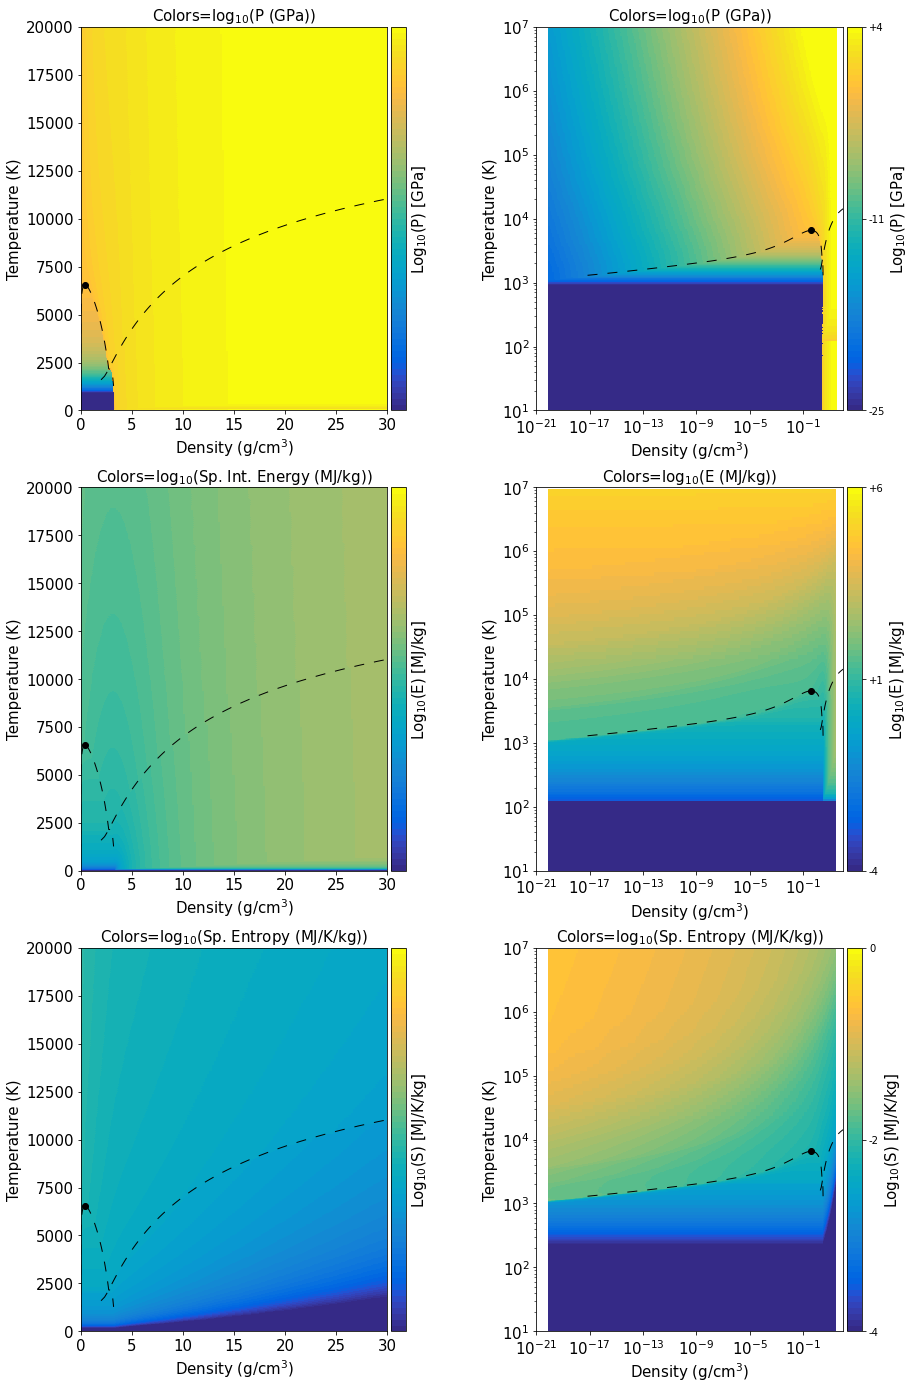

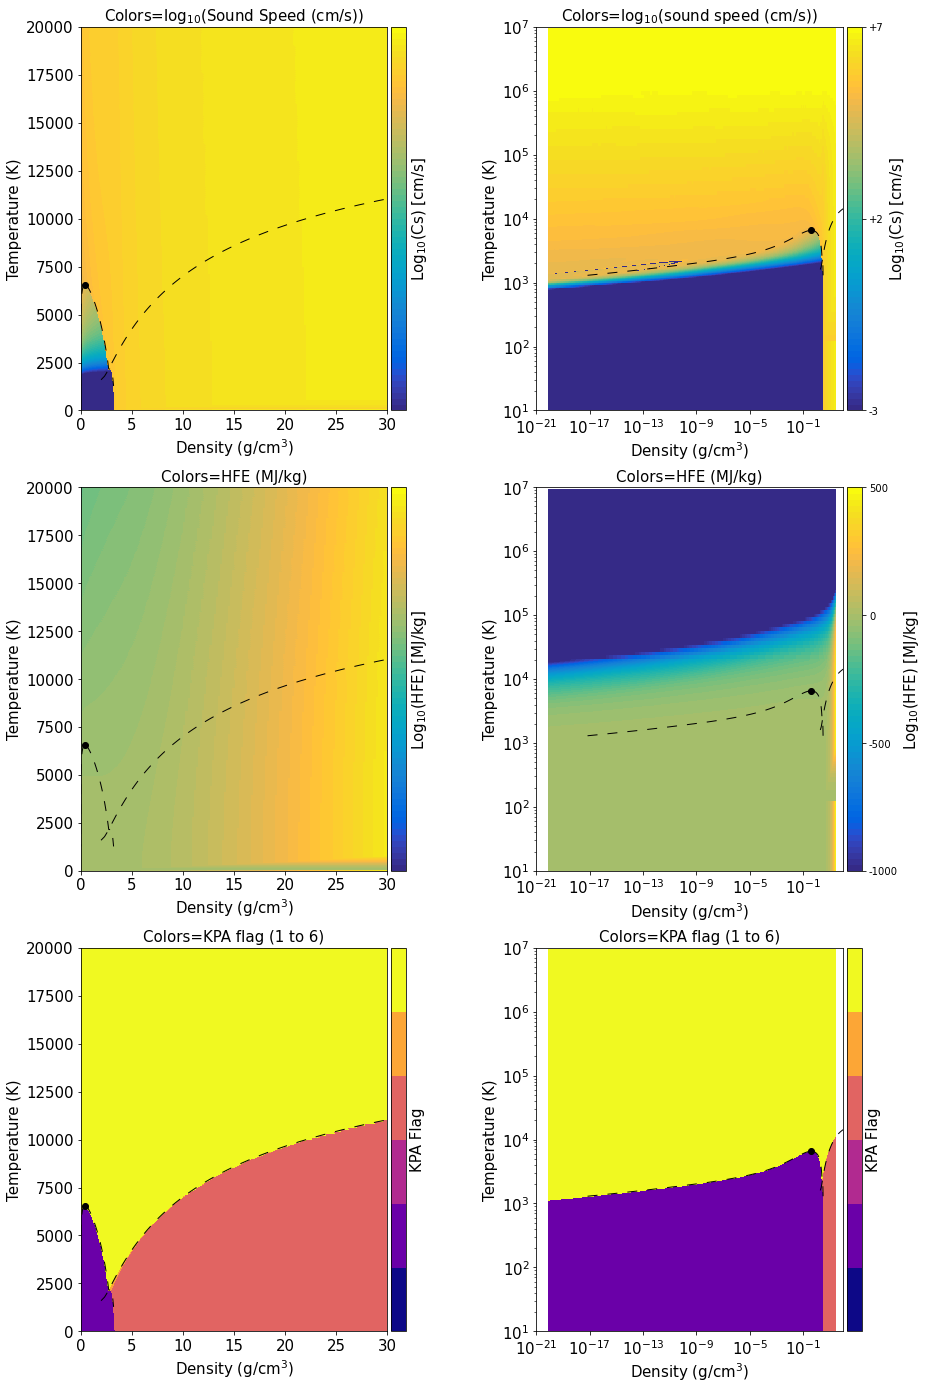

In [14]:
# PLOT COLOR SHADED VALUES RHO-T TABLE
lw=1
sfont = 15
ds = (10,10)
plt.rcParams['pcolor.shading'] ='nearest'



%matplotlib inline
fig, ([ax0, ax1], [ax2,ax3], [ax4,ax5])= plt.subplots(nrows=3,ncols=2,figsize=(14,24))
plt.subplots_adjust(wspace=0.4)
#plt.tight_layout(pad=0.6)

##================ Pressure
im1=ax0.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.P)+25)/29.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
ax0.plot(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax0.plot(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax0.plot(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax0.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax0.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax0.set_ylim(0.,20000)
ax0.set_xlim(0,30.)
ax0.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax0.set_ylabel('Temperature (K)',size=sfont)
ax0.set_title('Colors=log$_{10}$(P (GPa))',size=sfont)
ax0.tick_params(labelsize=sfont)

divider0 = make_axes_locatable(ax0)
cax0 = divider0.append_axes('right', size='5%', pad=0.05)
cbar0 = fig.colorbar(im1, cax=cax0, ticks = [],orientation='vertical')
#cbar0.ax.set_yticklabels(['  ','  ','  '])  # vertical colorbar
cbar0.set_label('Log$_{10}$(P) [GPa]',size=sfont)
#cbar0.ax.set_yticklabels(['-25','-11','+4'])  # vertical colorbar

im1=ax1.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.P)+25)/29.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
ax1.loglog(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax1.loglog(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax1.loglog(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax1.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax1.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax1.set_ylim(10.,1.E7)
ax1.set_xlim(1.E-21,100.)
ax1.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax1.set_ylabel('Temperature (K)',size=sfont)
ax1.set_title('Colors=log$_{10}$(P (GPa))',size=sfont)
ax1.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
cbar.ax.set_yticklabels(['-25','-11', '+4'])  # vertical colorbar
cbar.set_label('Log$_{10}$(P) [GPa]',size=sfont)


#================ Sp. Int. Energy
im1=ax2.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.U)+4.)/10.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
ax2.plot(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax2.plot(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax2.plot(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax2.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax2.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax2.set_ylim(0.,20000)
ax2.set_xlim(0,30.)
ax2.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax2.set_ylabel('Temperature (K)',size=sfont)
ax2.set_title('Colors=log$_{10}$(Sp. Int. Energy (MJ/kg))',size=sfont)
ax2.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
# does not want to label ticks in this location
cbar = fig.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
#cbar.ax.set_yticklabels(['','',''])  # vertical colorbar
cbar.set_label('Log$_{10}$(E) [MJ/kg]',size=sfont)
#cbar.ax.set_yticklabels(['-4','+1','+6'])  # vertical colorbar


ax3.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.U)+4.)/10.,cmap=local_cmaps.parula,vmin=0,vmax=1)
ax3.loglog(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax3.loglog(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax3.loglog(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax3.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax3.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax3.set_ylim(10.,1.E7)
ax3.set_xlim(1.E-21,100.)
ax3.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax3.set_ylabel('Temperature (K)',size=sfont)
ax3.set_title('Colors=log$_{10}$(E (MJ/kg))',size=sfont)
ax3.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
#cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
#cbar.ax.set_yticklabels(['-6', '-3.5', '-1'])  # vertical colorbar
cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
cbar.ax.set_yticklabels(['-4', '+1','+6'])  # vertical colorbar
cbar.set_label('Log$_{10}$(E) [MJ/kg]',size=sfont)

#================ Sp. Entropy
im1=ax4.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.S)+4.)/4.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
ax4.plot(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax4.plot(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax4.plot(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax4.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax4.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax4.set_ylim(0.,20000)
ax4.set_xlim(0,30.)
ax4.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax4.set_ylabel('Temperature (K)',size=sfont)
ax4.set_title('Colors=log$_{10}$(Sp. Entropy (MJ/K/kg))',size=sfont)
ax4.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax4)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
#cbar.ax.set_yticklabels(['-4', '-2', '0'])  # vertical colorbar
cbar.set_label('Log$_{10}$(S) [MJ/K/kg]',size=sfont)


ax5.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.S)+4.)/4.,cmap=local_cmaps.parula,vmin=0,vmax=1)
ax5.loglog(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax5.loglog(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax5.loglog(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax5.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax5.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax5.set_ylim(10.,1.E7)
ax5.set_xlim(1.E-21,100.)
ax5.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax5.set_ylabel('Temperature (K)',size=sfont)
ax5.set_title('Colors=log$_{10}$(Sp. Entropy (MJ/K/kg))',size=sfont)
ax5.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax5)
cax = divider.append_axes('right', size='5%', pad=0.05)
#cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
#cbar.ax.set_yticklabels(['-6', '-3.5', '-1'])  # vertical colorbar
cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
cbar.ax.set_yticklabels(['-4', '-2','0'])  # vertical colorbar
cbar.set_label('Log$_{10}$(S) [MJ/K/kg]',size=sfont)


##============= start new plot
fig2, ([ax0, ax1], [ax2,ax3], [ax4,ax5])= plt.subplots(nrows=3,ncols=2,figsize=(14,24))
plt.subplots_adjust(wspace=0.4)

#================ Sound Speed
im1=ax0.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.cs)+3.)/10.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
ax0.plot(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax0.plot(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax0.plot(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax0.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax0.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax0.set_ylim(0.,20000)
ax0.set_xlim(0,30.)
ax0.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax0.set_ylabel('Temperature (K)',size=sfont)
ax0.set_title('Colors=log$_{10}$(Sound Speed (cm/s))',size=sfont)
ax0.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax0)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
#cbar.ax.set_yticklabels(['-3', '+2', '+7'])  # vertical colorbar
cbar.set_label('Log$_{10}$(Cs) [cm/s]',size=sfont)


ax1.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.cs)+3.)/10.,cmap=local_cmaps.parula,vmin=0,vmax=1)
ax1.loglog(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax1.loglog(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax1.loglog(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax1.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax1.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax1.set_ylim(10.,1.E7)
ax1.set_xlim(1.E-21,100.)
ax1.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax1.set_ylabel('Temperature (K)',size=sfont)
ax1.set_title('Colors=log$_{10}$(sound speed (cm/s))',size=sfont)
ax1.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
#cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
#cbar.ax.set_yticklabels(['-6', '-3.5', '-1'])  # vertical colorbar
cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
cbar.ax.set_yticklabels(['-3', '+2', '+7'])  # vertical colorbar
cbar.set_label('Log$_{10}$(Cs) [cm/s]',size=sfont)


#================ HFE
amin = np.min(NewEOS.A)
amin = -1000.
alogmax = 1500. #np.max(anaarrodd)-amin #np.max(np.log10(anaarrodd-amin))
#print('amin, log10(amin)',amin,np.log10(-amin))
#print('alogmax=',alogmax)
im1=ax2.pcolormesh(NewEOS.rho,NewEOS.T,(NewEOS.A-amin)/alogmax,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
ax2.plot(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax2.plot(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax2.plot(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax2.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax2.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax2.set_ylim(0.,20000)
ax2.set_xlim(0,30.)
ax2.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax2.set_ylabel('Temperature (K)',size=sfont)
ax2.set_title('Colors=HFE (MJ/kg)',size=sfont)
ax2.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
#cbar.ax.set_yticklabels(['-1000','-500','0','500'])  # vertical colorbar
cbar.set_label('Log$_{10}$(HFE) [MJ/kg]',size=sfont)


ax3.pcolormesh(NewEOS.rho,NewEOS.T,(NewEOS.A-amin)/alogmax,cmap=local_cmaps.parula,vmin=0,vmax=1)
ax3.loglog(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax3.loglog(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax3.loglog(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax3.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax3.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax3.set_ylim(10.,1.E7)
ax3.set_xlim(1.E-21,100.)
ax3.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax3.set_ylabel('Temperature (K)',size=sfont)
ax3.set_title('Colors=HFE (MJ/kg)',size=sfont)
ax3.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
#cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
#cbar.ax.set_yticklabels(['-6', '-3.5', '-1'])  # vertical colorbar
cbar = fig.colorbar(im1, cax=cax, ticks = [0,.333,.6667,  1], orientation='vertical')
cbar.ax.set_yticklabels(['-1000','-500','0','500'])  # vertical colorbar
cbar.set_label('Log$_{10}$(HFE) [MJ/kg]',size=sfont)



#================ KPA flag
cmap2 = cm.get_cmap('plasma', 6)    # 6 discrete colors

im1=ax4.pcolormesh(NewEOS.rho,NewEOS.T,((NewEOS.KPA)-0.5)/6.,cmap=cmap2,vmin=0,vmax=1,edgecolors='face')
#im1=ax4.pcolormesh(NewEOS.rho,NewEOS.T,((NewEOS.KPA))/6.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
ax4.plot(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax4.plot(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax4.plot(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax4.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax4.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax4.set_ylim(0.,20000)
ax4.set_xlim(0,30.)
ax4.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax4.set_ylabel('Temperature (K)',size=sfont)
ax4.set_title('Colors=KPA flag (1 to 6)',size=sfont)
ax4.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax4)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
#cbar.ax.set_yticklabels(['0','1','2','3','4','5',  '6'])  # vertical colorbar
cbar.set_label('KPA Flag',size=sfont)


ax5.pcolormesh(NewEOS.rho,NewEOS.T,((NewEOS.KPA)-0.5)/6.,cmap=cmap2,vmin=0,vmax=1)
ax5.loglog(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax5.loglog(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax5.loglog(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax5.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax5.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax5.set_ylim(10.,1.E7)
ax5.set_xlim(1.E-21,100.)
ax5.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax5.set_ylabel('Temperature (K)',size=sfont)
ax5.set_title('Colors=KPA flag (1 to 6)',size=sfont)
ax5.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax5)
cax = divider.append_axes('right', size='5%', pad=0.05)
#cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
#cbar.ax.set_yticklabels(['-6', '-3.5', '-1'])  # vertical colorbar
#cbar = fig.colorbar(im1, cax=cax, ticks = np.arange(13)/12, orientation='vertical')
cbar = fig.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
#cbar.ax.set_yticklabels(['','1','','2','','3','','4','','5','',  '6'])  # vertical colorbar
cbar.set_label('KPA Flag',size=sfont)






# Model Data Quality (MDQ) Flag
We provide an MDQ rating which is saved as a 301-style SESAME table. The MDQ rating is a qualitative guide for users that provides some known quality control information. This information is necessarily subjective and incomplete. The rating does not guarantee any fidelity in the EOS model except for points that have been directly compared to experimental data in the plots below.<br>
<ul>
    <li>MDQ=1: Data point has experimental data and falls within experimental error. NOT USED AT THIS TIME. Will be added in the future.
    <li>MDQ=0: Data point rating is neutral. The value appears to be a thermodynamically self-consistent model point without known gross errors.
    <li>MDQ=-1: Data point rating is erroneous. The value is not thermodynamically correct in a known way. In this work, this flag is used for the replacement values for the tension region to generate an all positive pressure equilibrium EOS table. The current replacement scheme is to use the values in the adjacent grid cell: for each P and T in the sublimation region, use values at the adjacent density with positive pressure. The magnitude of the error is small, but the derivatives in this region will be incorrect.
    <li>MDQ=-2: Data point rating is non-physical. The value is not thermodynamically correct in a known way. In this work, this flag is used for ANEOS output with negative values for the specific entropy.
    <li>MDQ=-4: Developer judgement that this region of phase space does not provide a robust representation of the material. There are no high-pressure solid phases in this EOS model. Seek alternative models for problems focused in this region.
    <li>MDQ=-5: Developer judgement that this region of phase space does not provide a robust representation of the material. Applied to regions with pressures > 2 TPa. The Gruneisen gamma value is too large for liquid in this region and missing physics at higher pressures and temperatures. Seek alternative models for problems focused in this region.
</ul>   


Unique values in the MDQ flag array: [-5. -4. -2. -1.  0.]
Value: # elements with this value
-5.0 :  32562
-4.0 :  163729
-2.0 :  10891
-1.0 :  23493
0.0 :  409165


[Text(1, 0.0, ''),
 Text(1, 0.08333333333333333, '-5'),
 Text(1, 0.16666666666666666, ''),
 Text(1, 0.25, '-4'),
 Text(1, 0.3333333333333333, ''),
 Text(1, 0.4166666666666667, '-3'),
 Text(1, 0.5, ''),
 Text(1, 0.5833333333333334, '-2'),
 Text(1, 0.6666666666666666, ''),
 Text(1, 0.75, '-1'),
 Text(1, 0.8333333333333334, ''),
 Text(1, 0.9166666666666666, '0'),
 Text(1, 1.0, '')]

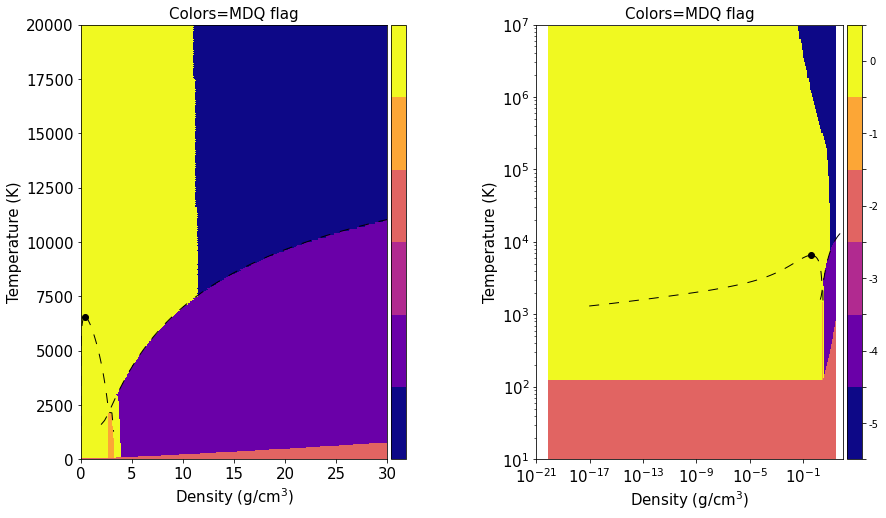

In [15]:
# check the user-defined model data quality flag across the EOS surface
uniqmdqarr = np.unique(NewEOS.MDQ)
print("Unique values in the MDQ flag array:", uniqmdqarr)
print("Value: # elements with this value")
#get_indexes = lambda x, xs: [i for (y, i) in zip(xs, range(len(xs))) if x == y]

for i in uniqmdqarr:
    ix = get_indexes(i,np.reshape(NewEOS.MDQ,NewEOS.ND*NewEOS.NT))
    print(i,': ',len(ix))


##============= start new plot
fig3, ([ax4, ax5])= plt.subplots(nrows=1,ncols=2,figsize=(14,8))
plt.subplots_adjust(wspace=0.4)

#================ MDQ flag
cmap2 = cm.get_cmap('plasma', 6)    # 6 discrete colors

#im1=ax4.pcolormesh(NewEOS.rho,NewEOS.T,((NewEOS.MDQ)+5)/6.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
im1=ax4.pcolormesh(NewEOS.rho,NewEOS.T,((NewEOS.MDQ)+5)/6.,cmap=cmap2,vmin=0,vmax=1,edgecolors='face')
ax4.plot(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax4.plot(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax4.plot(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax4.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax4.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax4.set_ylim(0.,20000)
ax4.set_xlim(0,30.)
ax4.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax4.set_ylabel('Temperature (K)',size=sfont)
ax4.set_title('Colors=MDQ flag',size=sfont)
ax4.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax4)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
#cbar.ax.set_yticklabels(['','-5','','-4','','-3','','-2','','-1','','0','','1'])  # vertical colorbar

cmap2 = cm.get_cmap('plasma', 6)    # 6 discrete colors
ax5.pcolormesh(NewEOS.rho,NewEOS.T,((NewEOS.MDQ)+5)/6.,cmap=cmap2,vmin=0,vmax=1)
#ax5.pcolormesh(NewEOS.rho,NewEOS.T,((NewEOS.MDQ)+5)/6.,cmap=local_cmaps.parula,vmin=0,vmax=1)
ax5.loglog(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax5.loglog(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax5.loglog(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax5.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax5.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax5.set_ylim(10.,1.E7)
ax5.set_xlim(1.E-21,100.)
ax5.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax5.set_ylabel('Temperature (K)',size=sfont)
ax5.set_title('Colors=MDQ flag',size=sfont)
ax5.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax5)
cax = divider.append_axes('right', size='5%', pad=0.05)
#cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
#cbar.ax.set_yticklabels(['-6', '-3.5', '-1'])  # vertical colorbar
cbar = fig.colorbar(im1, cax=cax, ticks = np.arange(13)/12, orientation='vertical')
#cbar.ax.set_yticklabels(['','-5','','-4','','-3','','-2','','-1','','0','','1'])  # vertical colorbar
cbar.ax.set_yticklabels(['','-5','','-4','','-3','','-2','','-1','','0',''])  # vertical colorbar



## ANEOS Model Compared to Experimental and Ab Initio Data

The following plots compare the ANEOS model Hugoniots with laboratory data and ab initio calculations. 

Compared to forsterite Hugoniot (Root et al. 2018) and entropy on the Hugoniot derived by Davies et al., 2019.

Orange points are corrected data points for the liquid (rho=2.597 g/cm$^3$, T$_0$=2273 K) forsterite Hugoniot from Thomas and Asimow 2013. 

ANEOS STP Hugoniots: red -- calculated in the ANEOS code for pyrolitic glass density at room temperature interpreted to be in tension; green -- 1 bar glass estimate; blue -- Hugoniot based at STP (model solid at reference density).


Requested ANEOS Hugoniot initial state from (THUG,RHUG) (red curves in plots below):
Initial Pressure (GPa): -9.0363
Initial Temperature (K): 298.03
Initial Sp. Entropy (MJ/K/kg): 0.0002959
Initial Sp. Internal Energy (MJ/kg): 0.28742
Initial Density (g/cm3): 2.94


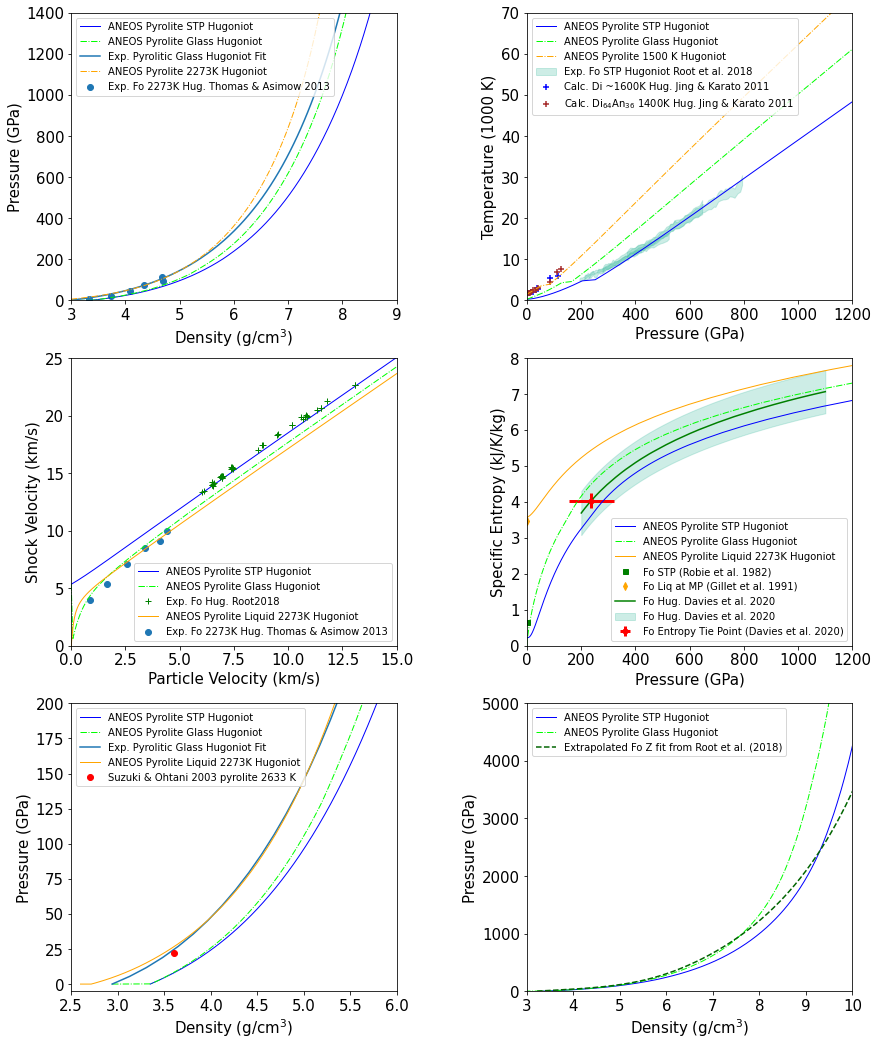

In [16]:
# Display the initial conditions for the Hugoniot in ANEOS.OUTPUT    
print('\nRequested ANEOS Hugoniot initial state from (THUG,RHUG) (red curves in plots below):')
print('Initial Pressure (GPa):',NewEOS.anhug.P[0])
print('Initial Temperature (K):',NewEOS.anhug.T[0])
print('Initial Sp. Entropy (MJ/K/kg):',NewEOS.anhug.S[0])
print('Initial Sp. Internal Energy (MJ/kg):',NewEOS.anhug.U[0])
print('Initial Density (g/cm3):',NewEOS.anhug.rho[0])
#

#========== PLOTTING STYLES FOR LOTS OF PLOTS =================
styleanhug = ['-','red',1,'ANEOS Glass-tension Hugoniot'] # requested THUG,RHUG Hugoniot in ANEOS.INPUT
stylestphug = ['-','blue',1,'ANEOS Pyrolite STP Hugoniot'] # rho0, press0 reference state Hugoniot in ANEOS.OUTPUT
stylehugo = ['-.','lime',1,'ANEOS Pyrolite Glass Hugoniot'] # NewEOS.hugo holds result from: NewEOS.calcOffEOSHugoniot(r0=2.94,t0=298.,p0=1.e-4,e0=0.,r1=3.35,writefilename='NEW-SESAME-HUG-GLASS.TXT')
stylezfit = ['-','green',1,'Fo Z fit (Davies et al. 2019)']

styleqmd = ['^','red',5,'Fo QMD calc (Root et al. 2018)']
stylezdat = ['^','black',5,'Fo Z data (Root et al. 2018)']
stylegg = ['+','green',5,'Fo Gas gun data\n(Mosenfelder et al. 2007)']
styleliq = ['^','orange',7,'Liquid Fo data corrected\n(Thomas & Asimow 2013)']
styleliqhug = ['-','orange',1,'ANEOS Pyrolite Liquid 2273K Hugoniot']
styleanphase = ['-','black',1,'ANEOS Phase Boundaries']
stylephasept = ['o','black',6]



#======================LOTS OF PLOTS============================
# plot the Hugoniots for comparison
sfont = 15
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,18))
plt.subplots_adjust(wspace=0.4)

#-------------
# Pressure-Density Data vs. ANEOS
ai=0
aj=0

axes[ai,aj].plot(NewEOS.hug.rho,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hugo.rho,NewEOS.hugo.P,stylehugo[0],linewidth=stylehugo[2],color=stylehugo[1],label=stylehugo[3])
# only up to 25 GPa - leave off this plot
#axes[ai,aj].plot(NewEOS.anhug.rho,NewEOS.anhug.P,styleanhug[0],linewidth=styleanhug[2],color=styleanhug[1],label=styleanhug[3])

# Fo data needs to be shifted to higher densities for comparison to pyrolite
#axes[ai,aj].plot(fo_hug_Davies20.rho,fo_hug_Davies20.P,stylezfit[0],linewidth=stylezfit[2],color=stylezfit[1],label='Fo Root2018;Davies2020')
#axes[ai,aj].plot(fo_hug_ZRoot18.rho,fo_hug_ZRoot18.P,'+',linewidth=stylezfit[2],color=stylezfit[1],label='Fo Root2018;Davies2020')

if SHOWUNPUBDATA:
    axes[ai,aj].errorbar(pyr_hug_Chid22.rho,pyr_hug_Chid22.P,xerr=pyr_hug_Chid22.rho_err*2,yerr=pyr_hug_Chid22.P_err*2,fmt='o',color='orange',label='Exp. Pyrolitic Glass Hugoniot')
    axes[ai,aj].plot(pyr_hug_Caracas22.rho,pyr_hug_Caracas22.P,'s',color='orange',label=pyr_hug_Caracas22.label)
    axes[ai,aj].plot(pyr_hug31_Caracas22.rho,pyr_hug31_Caracas22.P,'s',color='red',label=pyr_hug31_Caracas22.label)
else:
    axes[ai,aj].plot(pyr_hugfit_Chid22.rho,pyr_hugfit_Chid22.P,label='Exp. Pyrolitic Glass Hugoniot Fit')

axes[ai,aj].scatter(fo_hug_liqThomas13.rho,fo_hug_liqThomas13.P,label='Exp. Fo 2273K Hug. Thomas & Asimow 2013')
NewEOS.calchugoniot(r0=2.597,t0=2273.)
axes[ai,aj].plot(NewEOS.hug.rho,NewEOS.hug.P,'-.',linewidth=styleliqhug[2],color='orange',label='ANEOS Pyrolite 2273K Hugoniot')
# Put the STP hugoniot back into the structure
NewEOS.calchugoniot(r0=NewEOS.R0REF,t0=NewEOS.T0REF)

axes[ai,aj].set_ylim(0,1400)
axes[ai,aj].set_xlim(3.,9.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].legend(fontsize=sfont-5)

#-------------
# Pressure - Temperature Data vs. ANEOS
ai=0
aj=1

##### OMEGA temperature data from Root et al. 2018
col=local_cmaps.parula(0.5)
axes[ai,aj].fill_between(fo_hug_OM1Root18.P,(fo_hug_OM1Root18.T-fo_hug_OM1Root18.T_err)/1000,(fo_hug_OM1Root18.T+fo_hug_OM1Root18.T_err)/1000,label="Exp. Fo STP Hugoniot Root et al. 2018",
         color=col,alpha=0.25)
axes[ai,aj].fill_between(fo_hug_OM2Root18.P,(fo_hug_OM2Root18.T-fo_hug_OM2Root18.T_err)/1000,(fo_hug_OM2Root18.T+fo_hug_OM2Root18.T_err)/1000,
         color=col,alpha=0.25)
axes[ai,aj].fill_between(fo_hug_OM3Root18.P,(fo_hug_OM3Root18.T-fo_hug_OM3Root18.T_err)/1000,(fo_hug_OM3Root18.T+fo_hug_OM3Root18.T_err)/1000,
         color=col,alpha=0.25)
axes[ai,aj].fill_between(fo_hug_OM4Root18.P,(fo_hug_OM4Root18.T-fo_hug_OM4Root18.T_err)/1000,(fo_hug_OM4Root18.T+fo_hug_OM4Root18.T_err)/1000,
         color=col,alpha=0.25)

#axes[ai,aj].plot(NewEOS.anhug.P,NewEOS.anhug.T/1.E3,styleanhug[0],linewidth=styleanhug[2],color=styleanhug[1],label=styleanhug[3])
axes[ai,aj].plot(NewEOS.hug.P,NewEOS.hug.T/1.E3,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hugo.P,NewEOS.hugo.T/1.e3,stylehugo[0],linewidth=stylehugo[2],color=stylehugo[1],label=stylehugo[3])
#axes[ai,aj].plot(fo_hug_Davies20.P,fo_hug_Davies20.T/1.e3,stylezfit[0],linewidth=stylezfit[2],color=stylezfit[1],label='Fo Root2018;Davies2020')

#axes[ai,aj].plot(pyr_hugfit_Chid22.P,pyr_hugfit_Chid22.T/1.e3,label='Pyrolitic Glass Hugoniot Exp.')
if SHOWUNPUBDATA:
    axes[ai,aj].scatter(pyr_hug_TChid22.P,pyr_hug_TChid22.T/1.e3,s=1,label='Exp. Pyrolitic Glass Hugoniot')
    axes[ai,aj].plot(pyr_hug_Caracas22.P,pyr_hug_Caracas22.T/1.e3,'s',color='orange',label=pyr_hug_Caracas22.label)
    axes[ai,aj].plot(pyr_hug31_Caracas22.P,pyr_hug31_Caracas22.T/1.e3,'s',color='red',label=pyr_hug31_Caracas22.label)

# ANEOS LIQUID HUGONIOT
# Calculate the model Hugoniot with the same initial state as Thomas & Asimow 2013
#NewEOS.calchugoniot(r0=fo_hug_liqThomas13.rho0,t0=fo_hug_liqThomas13.T0)
#axes[ai,aj].plot(NewEOS.hug.P,NewEOS.hug.T/1.e3,styleliqhug[0],linewidth=styleliqhug[2],color='orange',label=styleliqhug[3])
# use average temperature for comparison to Jing & Karato 2011 calculations
NewEOS.calchugoniot(r0=2.597,t0=1500.)
axes[ai,aj].plot(NewEOS.hug.P,NewEOS.hug.T/1.e3,'-.',linewidth=styleliqhug[2],color='orange',label='ANEOS Pyrolite 1500 K Hugoniot')
# Put the STP hugoniot back into the structure
NewEOS.calchugoniot(r0=NewEOS.R0REF,t0=NewEOS.T0REF)

# low pressure for this plot
if 1:
    axes[ai,aj].scatter(di_hug_JK11.P,di_hug_JK11.T/1000,marker='+',color='blue',label='Calc. Di ~1600K Hug. Jing & Karato 2011')
    axes[ai,aj].scatter(dian_hug_JK11.P,dian_hug_JK11.T/1000,marker='+',color='brown',label='Calc. Di$_{64}$An$_{36}$ 1400K Hug. Jing & Karato 2011')



axes[ai,aj].set_xlim(0,1200)
axes[ai,aj].set_ylim(0,70)
axes[ai,aj].set_ylabel('Temperature (1000 K)',size=sfont)
axes[ai,aj].set_xlabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].legend(fontsize=sfont-5)

#-------------
# Particle Velocity vs. Shock Velocity; Data vs. ANEOS
ai=1
aj=0

#axes[ai,aj].plot(NewEOS.anhug.up,NewEOS.anhug.us,styleanhug[0],linewidth=styleanhug[2],color=styleanhug[1],label=styleanhug[3])
axes[ai,aj].plot(NewEOS.hug.up,NewEOS.hug.us,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hugo.up,NewEOS.hugo.us,stylehugo[0],linewidth=stylehugo[2],color=stylehugo[1],label=stylehugo[3])

axes[ai,aj].plot(fo_hug_ZRoot18.up,fo_hug_ZRoot18.us,'+',linewidth=stylezfit[2],color=stylezfit[1],label='Exp. Fo Hug. Root2018')

axes[ai,aj].scatter(fo_hug_liqThomas13.up,fo_hug_liqThomas13.us,label='Exp. Fo 2273K Hug. Thomas & Asimow 2013')

if SHOWUNPUBDATA:
    axes[ai,aj].errorbar(pyr_hug_Chid22.up,pyr_hug_Chid22.us,xerr=pyr_hug_Chid22.up_err,yerr=pyr_hug_Chid22.us_err,fmt='o',color='orange',label='Exp. Pyrolitic Glass Hugoniot')


# ANEOS LIQUID HUGONIOT
# Calculate the model Hugoniot with the same initial state as Thomas & Asimow 2013
NewEOS.calchugoniot(r0=fo_hug_liqThomas13.rho0,t0=fo_hug_liqThomas13.T0)
axes[ai,aj].plot(NewEOS.hug.up,NewEOS.hug.us,styleliqhug[0],linewidth=styleliqhug[2],color=styleliqhug[1],label=styleliqhug[3])
# Put the STP hugoniot back into the structure
NewEOS.calchugoniot(r0=NewEOS.R0REF,t0=NewEOS.T0REF)

axes[ai,aj].set_xlim(0,15)
axes[ai,aj].set_ylim(0,25)
axes[ai,aj].set_xlabel('Particle Velocity (km/s)',size=sfont)
axes[ai,aj].set_ylabel('Shock Velocity (km/s)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].legend(fontsize=sfont-5)

#-------------
# Sp. Entropy vs Pressure; Calculated from experiments vs. ANEOS
ai=1
aj=1

#axes[ai,aj].plot(NewEOS.anhug.P,NewEOS.anhug.S*1.E3,styleanhug[0],linewidth=styleanhug[2],color=styleanhug[1],label=styleanhug[3])
axes[ai,aj].plot(NewEOS.hug.P,NewEOS.hug.S*1.E3,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hugo.P,NewEOS.hugo.S*1.E3,stylehugo[0],linewidth=stylehugo[2],color=stylehugo[1],label=stylehugo[3])

# ANEOS LIQUID HUGONIOT
# Calculate the model Hugoniot with the same initial state as Thomas & Asimow 2013
NewEOS.calchugoniot(r0=fo_hug_liqThomas13.rho0,t0=fo_hug_liqThomas13.T0)
axes[ai,aj].plot(NewEOS.hug.P,NewEOS.hug.S*1.e3,styleliqhug[0],linewidth=styleliqhug[2],color=styleliqhug[1],label=styleliqhug[3])
# Put the STP hugoniot back into the structure
NewEOS.calchugoniot(r0=NewEOS.R0REF,t0=NewEOS.T0REF)


# Tie point from Davies et al. 2019
axes[ai,aj].errorbar(fo_Stie_Davies20.P,fo_Stie_Davies20.S,xerr=fo_Stie_Davies20.P_err,yerr=fo_Stie_Davies20.S_err,fmt='o',markersize=5,color='red',label='Fo Entropy Tie Point (Davies et al. 2020)',elinewidth=3)
# Fo at STP from Robie et al. 1982
axes[ai,aj].plot(fo_STP_Robie82.P,fo_STP_Robie82.S,'s',markersize=5,color='green',label='Fo STP (Robie et al. 1982)')
# Fo liquid at melt point from Gillet et al. 1991
fo_1barmelt_Gillet91.S
axes[ai,aj].plot(1.E-4,fo_1barmelt_Gillet91.S[0],'d',markersize=5,color='orange',label='Fo Liq at MP (Gillet et al. 1991)')

axes[ai,aj].plot(fo_hug_Davies20.P,fo_hug_Davies20.S,'-',color='green',label="Fo Hug. Davies et al. 2020")

axes[ai,aj].fill_between(fo_hug_Davies20.P,(fo_hug_Davies20.S-fo_hug_Davies20.S_err),(fo_hug_Davies20.S+fo_hug_Davies20.S_err),label="Fo Hug. Davies et al. 2020",
         color=col,alpha=0.25)

axes[ai,aj].set_ylim(0,8.)
axes[ai,aj].set_xlim(0,1200)
axes[ai,aj].set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].set_xlabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].legend(fontsize=sfont-5)

#-------------
# Pressure-Density Data vs. ANEOS   LOW PRESSURE + LIQUID HUGONIOT
ai=2
aj=0
# ANEOS REFERENCE POINT (STP) Hugoniots
#axes[ai,aj].plot(NewEOS.anhug.rho,NewEOS.anhug.P,styleanhug[0],linewidth=styleanhug[2],color=styleanhug[1],label=styleanhug[3])
axes[ai,aj].plot(NewEOS.hug.rho,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hugo.rho,NewEOS.hugo.P,stylehugo[0],linewidth=stylehugo[2],color=stylehugo[1],label=stylehugo[3])

if SHOWUNPUBDATA:
    axes[ai,aj].errorbar(pyr_hug_Chid22.rho,pyr_hug_Chid22.P,xerr=pyr_hug_Chid22.rho_err*2,yerr=pyr_hug_Chid22.P_err*2,fmt='o',color='orange',label='Exp. Pyrolitic Glass Hugoniot')
else:
    axes[ai,aj].plot(pyr_hugfit_Chid22.rho,pyr_hugfit_Chid22.P,label='Exp. Pyrolitic Glass Hugoniot Fit')

# ANEOS LIQUID HUGONIOT
# Calculate the model Hugoniot with the same initial state as Thomas & Asimow 2013
NewEOS.calchugoniot(r0=fo_hug_liqThomas13.rho0,t0=fo_hug_liqThomas13.T0)
axes[ai,aj].plot(NewEOS.hug.rho,NewEOS.hug.P,styleliqhug[0],linewidth=styleliqhug[2],color=styleliqhug[1],label=styleliqhug[3])
# Put the STP hugoniot back into the structure
NewEOS.calchugoniot(r0=NewEOS.R0REF,t0=NewEOS.T0REF)

#axes[ai,aj].plot(fitsample_rarr/1.e3,fitsample_parr,label='Omega Pyrolitic Glass Fit')
axes[ai,aj].plot(3.6,22.1,'o',color='red',label='Suzuki & Ohtani 2003 pyrolite 2633 K')

if SHOWUNPUBDATA:
    axes[ai,aj].plot(pyr_hug_Caracas22.rho,pyr_hug_Caracas22.P,'s',color='orange',label=pyr_hug_Caracas22.label)
    axes[ai,aj].plot(pyr_hug31_Caracas22.rho,pyr_hug31_Caracas22.P,'s',color='red',label=pyr_hug31_Caracas22.label)

axes[ai,aj].set_ylim(-5,200)
axes[ai,aj].set_xlim(2.5,6.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].legend(fontsize=sfont-5)

#-------------
# Pressure-Density Data vs. ANEOS   EXTRAPOLATED HIGH PRESSURE
ai=2
aj=1
#axes[ai,aj].plot(NewEOS.anhug.rho,NewEOS.anhug.P,styleanhug[0],linewidth=styleanhug[2],color=styleanhug[1],label=styleanhug[3])
axes[ai,aj].plot(NewEOS.hug.rho,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hugo.rho,NewEOS.hugo.P,stylehugo[0],linewidth=stylehugo[2],color=stylehugo[1],label=stylehugo[3])

#axes[ai,aj].errorbar(pyom_rarr,pyom_parr,xerr=pyom_rerr,yerr=pyom_perr,fmt='o',color='orange',label='Omega Pyrolitic Glass')


# Extrapolate the exponential form Hugoniot from Root et al. 2018
uptmp = NewEOS.hug.up #up in km/s
ustmp = 6.89+1.22*uptmp-1.50*uptmp*np.exp(-0.4*uptmp) # root 2018 exponential fit 
ptmp = 3220*uptmp*ustmp/1.e3 # GPa
vtmp = (1./3220)*(1.-uptmp/ustmp)
axes[ai,aj].plot(1/vtmp/1.e3,ptmp,'--',color='darkgreen',label='Extrapolated Fo Z fit from Root et al. (2018)')

#axes[ai,aj].plot(fitsample_rarr/1.e3,fitsample_parr,label='Omega Pyrolitic Glass Fit')

axes[ai,aj].set_ylim(0,5000)
axes[ai,aj].set_xlim(3.,10.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].legend(fontsize=sfont-5)

plt.savefig(MODELNAME+'-Pyrolite-Hugoniot.pdf')

## Model Critical Point and Shock-Induced Phase Changes

See Caracas and Stewart (in prep.) for the bounds on the critical point for pyrolitic composition.

In [17]:
print('ANEOS Calculated Critical point:')
print('   Temperature (K):       ',NewEOS.cp.T)
print('   Pressure (GPa):        ', NewEOS.cp.P)
print('   Density (g/cm^3):      ',NewEOS.cp.rho)
print('   Sp. Energy (MJ/kg):    ', NewEOS.cp.U)
print('   Sp. Entropy (kJ/K/kg): ', NewEOS.cp.S*1.e3)
print('\n')
print('ANEOS Calculated Values at 1 bar:')
print('   Temperature at melting (K):                     ', NewEOS.onebar.Tmelt)
print('   Liquid density at melting (g/cm^3):             ', NewEOS.onebar.rhocm)
print('   Sp. Entropy at inc. melting Sim (kJ/K/kg):      ', NewEOS.onebar.Sim*1.E3)
print('   Sp. Entropy at com. melting Scm (kJ/K/kg):      ', NewEOS.onebar.Scm*1.E3)
print('   Temperature at boiling (K):                     ', NewEOS.onebar.Tvap)
print('   Liquid density at boiling (g/cm^3):             ', NewEOS.onebar.rhoiv)
print('   Sp. Entropy at inc. vaporization Siv (kJ/K/kg): ', NewEOS.onebar.Siv*1.E3)
print('   Sp. Entropy at com. vaporization Scv (kJ/K/kg): ', NewEOS.onebar.Scv*1.E3)
print('\n')
if NewEOS.tp.T > 0:
    print('ANEOS Calculated Triple Point:')
    print('   Temperature (K):                        ',NewEOS.tp.T)
    print('   Pressure (GPa):                         ', NewEOS.tp.P)
    print('   Solid density (g/cm^3):                 ',NewEOS.tp.rhos)
    print('   Liquid density (g/cm^3):                ',NewEOS.tp.rhol)
    print('   Vapor density (g/cm^3):                 ',NewEOS.tp.rhov)
    print('   Sp. Entropy at inc. melt Sim (kJ/K/kg): ', NewEOS.tp.Sim*1.E3)
    print('   Sp. Entropy at com. melt Scm (kJ/K/kg): ', NewEOS.tp.Scm*1.E3)
    print('   Sp. Entropy at inc. vap. Siv (kJ/K/kg): ', NewEOS.tp.Siv*1.E3)
    print('   Sp. Entropy at com. vap. Scv (kJ/K/kg): ', NewEOS.tp.Scv*1.E3)
else:
    print('ANEOS: No melt curve or triple point in this calculation.')
print('\n')
print('Starting at reference conditions (rho,T): ',NewEOS.R0REF,NewEOS.T0REF, ' (g/cm^3, K)')
print('ANEOS model conditions for shock-induced vaporization on release to 1 bar:')
print('                     :         IM        CM        IV      50%V        CV')
print('Shock Pressure (GPa) : {:10.2f}{:10.2f}{:10.2f}{:10.2f}{:10.2f}'.format(
    np.interp(NewEOS.onebar.Sim,NewEOS.hug.S,NewEOS.hug.P),
    np.interp(NewEOS.onebar.Scm,NewEOS.hug.S,NewEOS.hug.P),
    np.interp(NewEOS.onebar.Siv,NewEOS.hug.S,NewEOS.hug.P),
    np.interp(NewEOS.onebar.Siv+0.5*(NewEOS.onebar.Scv-NewEOS.onebar.Siv),NewEOS.hug.S,NewEOS.hug.P),
    np.interp(NewEOS.onebar.Scv,NewEOS.hug.S,NewEOS.hug.P)))
print('Imp. Match Vel (km/s): {:10.2f}{:10.2f}{:10.2f}{:10.2f}{:10.2f}'.format(
    np.interp(NewEOS.onebar.Sim,NewEOS.hug.S,NewEOS.hug.up)*2,
    np.interp(NewEOS.onebar.Scm,NewEOS.hug.S,NewEOS.hug.up)*2,
    np.interp(NewEOS.onebar.Siv,NewEOS.hug.S,NewEOS.hug.up)*2,
    np.interp(NewEOS.onebar.Siv+0.5*(NewEOS.onebar.Scv-NewEOS.onebar.Siv),NewEOS.hug.S,NewEOS.hug.up)*2,
    np.interp(NewEOS.onebar.Scv,NewEOS.hug.S,NewEOS.hug.up)*2))
print('ANEOS model conditions for shock-induced vaporization on release to the triple point pressure:')
print('                     :         IM        CM        IV      50%V        CV')
print('Shock Pressure (GPa) : {:10.2f}{:10.2f}{:10.2f}{:10.2f}{:10.2f}'.format(
    np.interp(NewEOS.tp.Sim,NewEOS.hug.S,NewEOS.hug.P),
    np.interp(NewEOS.tp.Scm,NewEOS.hug.S,NewEOS.hug.P),
    np.interp(NewEOS.tp.Siv,NewEOS.hug.S,NewEOS.hug.P),
    np.interp(NewEOS.tp.Siv+0.5*(NewEOS.tp.Scv-NewEOS.tp.Siv),NewEOS.hug.S,NewEOS.hug.P),
    np.interp(NewEOS.tp.Scv,NewEOS.hug.S,NewEOS.hug.P)))
print('Imp. Match Vel (km/s): {:10.2f}{:10.2f}{:10.2f}{:10.2f}{:10.2f}'.format(
    np.interp(NewEOS.tp.Sim,NewEOS.hug.S,NewEOS.hug.up)*2,
    np.interp(NewEOS.tp.Scm,NewEOS.hug.S,NewEOS.hug.up)*2,
    np.interp(NewEOS.tp.Siv,NewEOS.hug.S,NewEOS.hug.up)*2,
    np.interp(NewEOS.tp.Siv+0.5*(NewEOS.tp.Scv-NewEOS.tp.Siv),NewEOS.hug.S,NewEOS.hug.up)*2,
    np.interp(NewEOS.tp.Scv,NewEOS.hug.S,NewEOS.hug.up)*2))


ANEOS Calculated Critical point:
   Temperature (K):        6555.73
   Pressure (GPa):         0.230942
   Density (g/cm^3):       0.425104
   Sp. Energy (MJ/kg):     20.0015
   Sp. Entropy (kJ/K/kg):  6.8829


ANEOS Calculated Values at 1 bar:
   Temperature at melting (K):                      2163.005307829736
   Liquid density at melting (g/cm^3):              2.7419052956836727
   Sp. Entropy at inc. melting Sim (kJ/K/kg):       2.820102040538663
   Sp. Entropy at com. melting Scm (kJ/K/kg):       3.490500692325618
   Temperature at boiling (K):                      3206.85
   Liquid density at boiling (g/cm^3):              2.4565799999999998
   Sp. Entropy at inc. vaporization Siv (kJ/K/kg):  4.1584200000000004
   Sp. Entropy at com. vaporization Scv (kJ/K/kg):  8.69168


ANEOS Calculated Triple Point:
   Temperature (K):                         2163.0
   Pressure (GPa):                          5.85606e-09
   Solid density (g/cm^3):                  3.0465999999999998
   Liquid

## Model Phase Boundaries

Black lines are the ANEOS phase boundaries. Red curve is the ANEOS Hugoniot. Blue curve is the interpolated Hugoniot from the gridded eos table.

Comparison critical points from experimentally constrained quartz critical point (Kraus et al. 2012), ab initio enstatite critical point (Xiao & Stixrude 2018), ab initio forsterite critical point (Townsend et al. 2020).

Orange diamonds are the 1-bar boiling point; orange squares are the 1-bar melting point for pure forsterite for reference.

Mosenfelder et al. 2007 present an estimate of the melt curve of forsterite at high pressures. For planetary applications, a forsterite EOS is often used to represent the whole mantle. For comparison, the peridotite solidus and liquidus from Fiquet et al. 2010 are shown. The estimates for the mantle solidus and liquidus span a very large range, especially when water is included; see Figure 1 in Andrault et al. 2017.

Temperatures for Di and Di64An36 are calculated in Jing and Karato (2011) Table 10 using P-V shock data from Asimow and Ahrens (2010).

Peridotite composition 3050 K isentrope and liquid density models from Asimow (2018).

Calculated pyrolite isentrope with  3050.0  K potential temperature
Brown rectangle is the BSE triple system from Lock et al. 2018


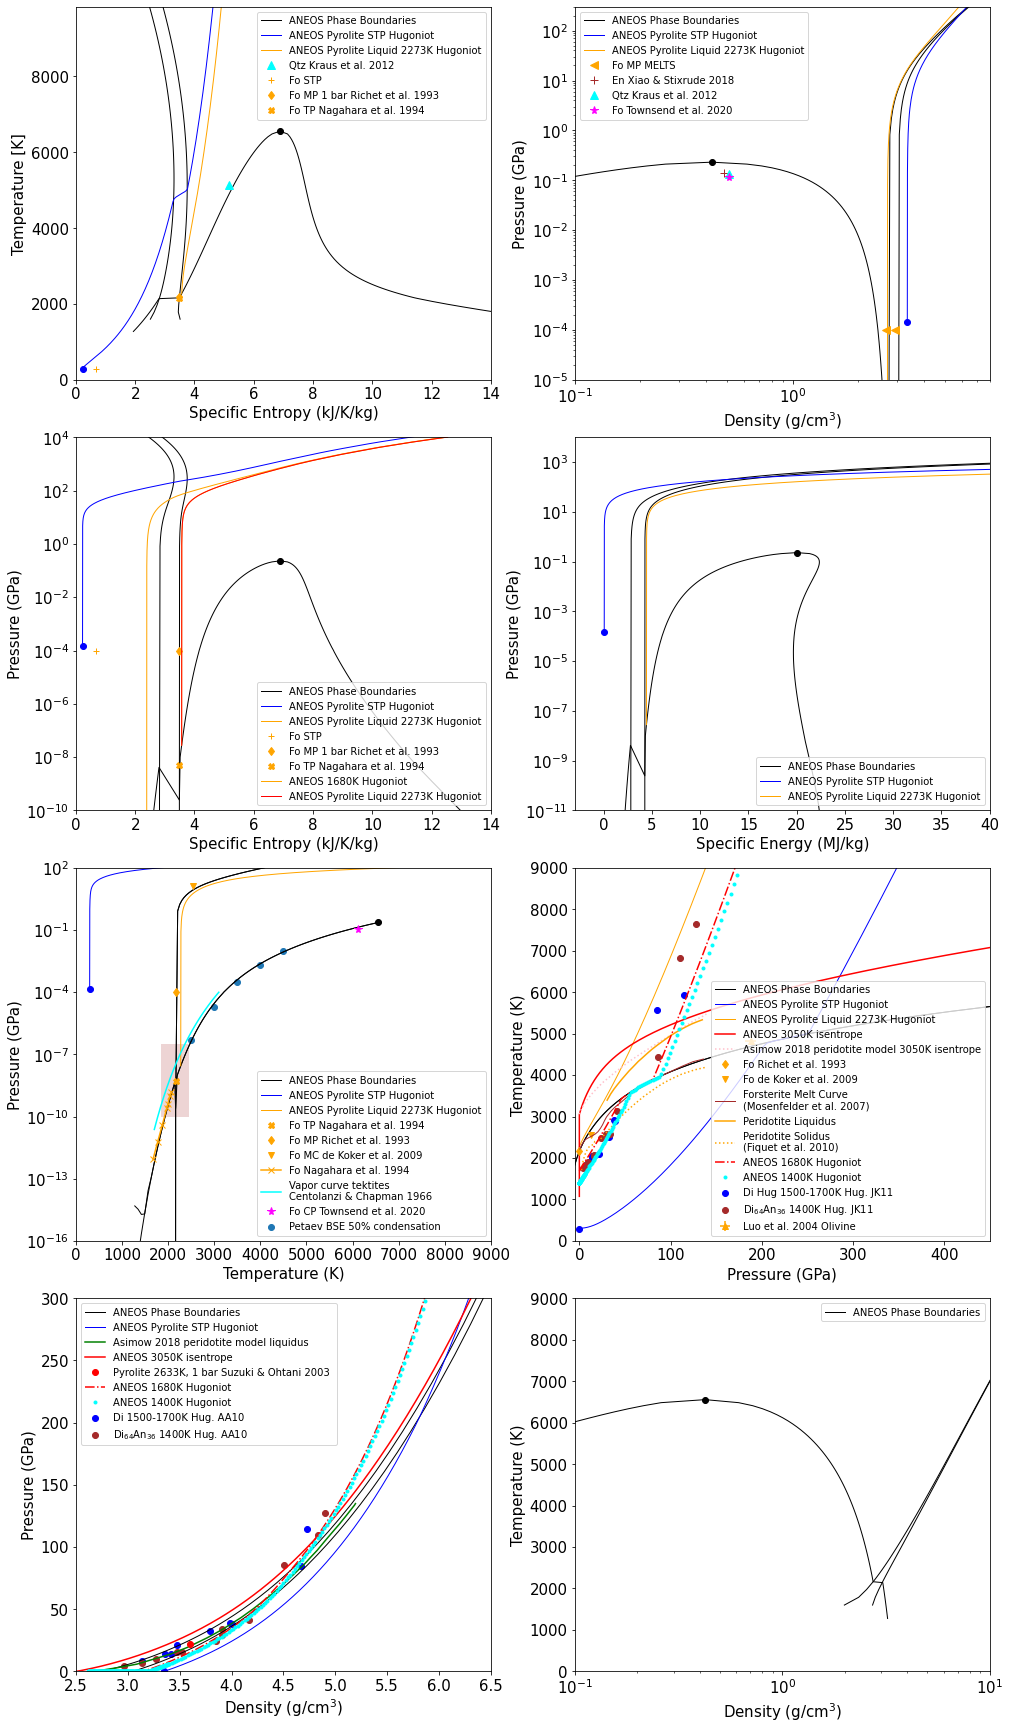

In [18]:
# PHASE DIAGRAM PLOTS
#======================LOTS OF PLOTS============================
# Plot aneos phase boundaries with focus on the vapor curve
sfont = 15
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14,24))
plt.subplots_adjust(wspace=0.4)

#------------------------------
# entropy-temperature
ai=0
aj=0
axes[ai,aj].plot(NewEOS.vc.Sl*1.E3,NewEOS.vc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2],label=styleanphase[3])
axes[ai,aj].plot(NewEOS.vc.Sv*1.E3,NewEOS.vc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
axes[ai,aj].plot(NewEOS.cp.S*1.E3,NewEOS.cp.T,'o',color=stylephasept[1],markersize=stylephasept[2])
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Sl*1.E3,NewEOS.mc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
    axes[ai,aj].plot(NewEOS.mc.Ss*1.E3,NewEOS.mc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])

axes[ai,aj].plot(NewEOS.hug.S*1.E3,NewEOS.hug.T,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hug.S[0]*1.E3,NewEOS.hug.T[0],'o',color=stylestphug[1])

# ANEOS LIQUID HUGONIOT
# Calculate the model Hugoniot with the same initial state as Thomas & Asimow 2013
NewEOS.calchugoniot(r0=fo_hug_liqThomas13.rho0,t0=fo_hug_liqThomas13.T0)
axes[ai,aj].plot(NewEOS.hug.S*1.E3,NewEOS.hug.T,styleliqhug[0],linewidth=styleliqhug[2],color=styleliqhug[1],label=styleliqhug[3])
# Put the STP hugoniot back into the structure
NewEOS.calchugoniot(r0=NewEOS.R0REF,t0=NewEOS.T0REF)

axes[ai,aj].set_ylim(0,1.5*NewEOS.cp.T)
axes[ai,aj].set_xlim(0,14)
axes[ai,aj].set_xlabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].set_ylabel('Temperature [K]',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#-------------------------
# density-pressure
ai=0
aj=1
axes[ai,aj].loglog(NewEOS.vc.rl,NewEOS.vc.Pl,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2],label=styleanphase[3])
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.Pv,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.P,'o',color=stylephasept[1],markersize=stylephasept[2])
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Pl,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ps,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])

axes[ai,aj].plot(NewEOS.hug.rho,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hug.rho[0],NewEOS.hug.P[0],'o',color=stylestphug[1])


# ANEOS LIQUID HUGONIOT
# Calculate the model Hugoniot with the same initial state as Thomas & Asimow 2013
NewEOS.calchugoniot(r0=fo_hug_liqThomas13.rho0,t0=fo_hug_liqThomas13.T0)
axes[ai,aj].plot(NewEOS.hug.rho,NewEOS.hug.P,styleliqhug[0],linewidth=styleliqhug[2],color=styleliqhug[1],label=styleliqhug[3])
# Put the STP hugoniot back into the structure
NewEOS.calchugoniot(r0=NewEOS.R0REF,t0=NewEOS.T0REF)

axes[ai,aj].set_ylim(1.e-5,300)
axes[ai,aj].set_xlim(1.e-1,8)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#------
#entropy-pressure
ai=1
aj=0
axes[ai,aj].semilogy(NewEOS.vc.Sl*1.E3,NewEOS.vc.Pl,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2],label=styleanphase[3])
axes[ai,aj].plot(NewEOS.vc.Sv*1.E3,NewEOS.vc.Pv,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
axes[ai,aj].plot(NewEOS.cp.S*1.E3,NewEOS.cp.P,'o',color=stylephasept[1],markersize=stylephasept[2])
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Sl*1.E3,NewEOS.mc.Pl,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
    axes[ai,aj].plot(NewEOS.mc.Ss*1.E3,NewEOS.mc.Ps,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])

axes[ai,aj].plot(NewEOS.hug.S*1.E3,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hug.S[0]*1.E3,NewEOS.hug.P[0],'o',color=stylestphug[1])

# ANEOS LIQUID HUGONIOT
# Calculate the model Hugoniot with the same initial state as Thomas & Asimow 2013
NewEOS.calchugoniot(r0=fo_hug_liqThomas13.rho0,t0=fo_hug_liqThomas13.T0)
axes[ai,aj].plot(NewEOS.hug.S*1.E3,NewEOS.hug.P,styleliqhug[0],linewidth=styleliqhug[2],color=styleliqhug[1],label=styleliqhug[3])
# Put the STP hugoniot back into the structure
NewEOS.calchugoniot(r0=NewEOS.R0REF,t0=NewEOS.T0REF)

axes[ai,aj].set_xlabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_ylim(1.e-10,10000)
axes[ai,aj].set_xlim(0,14)

#-----------
# specific energy - pressure
ai=1
aj=1
axes[ai,aj].semilogy(NewEOS.vc.Ul,NewEOS.vc.Pl,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2],label=styleanphase[3])
axes[ai,aj].plot(NewEOS.vc.Uv,NewEOS.vc.Pv,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
axes[ai,aj].plot(NewEOS.cp.U,NewEOS.cp.P,'o',color=stylephasept[1],markersize=stylephasept[2])
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Ul,NewEOS.mc.Pl,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
    axes[ai,aj].plot(NewEOS.mc.Us,NewEOS.mc.Ps,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])

axes[ai,aj].plot(NewEOS.hug.U,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hug.U[0],NewEOS.hug.P[0],'o',color=stylestphug[1])

# ANEOS LIQUID HUGONIOT
# Calculate the model Hugoniot with the same initial state as Thomas & Asimow 2013
NewEOS.calchugoniot(r0=fo_hug_liqThomas13.rho0,t0=fo_hug_liqThomas13.T0)
axes[ai,aj].plot(NewEOS.hug.U,NewEOS.hug.P,styleliqhug[0],linewidth=styleliqhug[2],color=styleliqhug[1],label=styleliqhug[3])
# Put the STP hugoniot back into the structure
NewEOS.calchugoniot(r0=NewEOS.R0REF,t0=NewEOS.T0REF)


axes[ai,aj].set_xlabel('Specific Energy (MJ/kg)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_ylim(1.e-11,10000)
axes[ai,aj].set_xlim(-3,NewEOS.cp.U*2.)

#-------
# temperature - pressure
ai=2
aj=0
axes[ai,aj].semilogy(NewEOS.vc.T,NewEOS.vc.Pl,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2],label=styleanphase[3])
axes[ai,aj].plot(NewEOS.vc.T,NewEOS.vc.Pv,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
axes[ai,aj].plot(NewEOS.cp.T,NewEOS.cp.P,'o',color=stylephasept[1],markersize=stylephasept[2])
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.T,NewEOS.mc.Pl,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
    axes[ai,aj].plot(NewEOS.mc.T,NewEOS.mc.Ps,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])

axes[ai,aj].plot(NewEOS.hug.T,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hug.T[0],NewEOS.hug.P[0],'o',color=stylestphug[1])

# ANEOS LIQUID HUGONIOT
# Calculate the model Hugoniot with the same initial state as Thomas & Asimow 2013
NewEOS.calchugoniot(r0=fo_hug_liqThomas13.rho0,t0=fo_hug_liqThomas13.T0)
axes[ai,aj].plot(NewEOS.hug.T,NewEOS.hug.P,styleliqhug[0],linewidth=styleliqhug[2],color=styleliqhug[1],label=styleliqhug[3])
# Put the STP hugoniot back into the structure
NewEOS.calchugoniot(r0=NewEOS.R0REF,t0=NewEOS.T0REF)


axes[ai,aj].set_xlabel('Temperature (K)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_xlim(0,9000)
axes[ai,aj].set_ylim(1.e-16,100)

#-------
# pressure - temperature melt curve
ai=2
aj=1
#axes[ai,aj].plot(NewEOS.vc.Pl,NewEOS.vc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2],label=styleanphase[3])
#axes[ai,aj].plot(NewEOS.vc.Pv,NewEOS.vc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
#axes[ai,aj].plot(NewEOS.cp.P,NewEOS.cp.T,'o',color=stylephasept[1],markersize=stylephasept[2])
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Pl,NewEOS.mc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2],label=styleanphase[3])
    axes[ai,aj].plot(NewEOS.mc.Ps,NewEOS.mc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])

axes[ai,aj].plot(NewEOS.hug.P,NewEOS.hug.T,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hug.P[0],NewEOS.hug.T[0],'o',color=stylestphug[1])

# ANEOS LIQUID HUGONIOT
# Calculate the model Hugoniot with the same initial state as Thomas & Asimow 2013
NewEOS.calchugoniot(r0=fo_hug_liqThomas13.rho0,t0=fo_hug_liqThomas13.T0)
axes[ai,aj].plot(NewEOS.hug.P,NewEOS.hug.T,styleliqhug[0],linewidth=styleliqhug[2],color=styleliqhug[1],label=styleliqhug[3])
# Put the STP hugoniot back into the structure
NewEOS.calchugoniot(r0=NewEOS.R0REF,t0=NewEOS.T0REF)

axes[ai,aj].set_ylabel('Temperature (K)',size=sfont)
axes[ai,aj].set_xlabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_ylim(0,9000)
axes[ai,aj].set_xlim(-5,450)


#-------
# density - pressure melt curve
ai=3
aj=0
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Pl,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2],label=styleanphase[3])
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ps,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])

axes[ai,aj].plot(NewEOS.hug.rho,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hug.rho[0],NewEOS.hug.P[0],'o',color=stylestphug[1])

axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_ylim(0,300)
axes[ai,aj].set_xlim(2.5,6.5)


#-------
# density -- temperature
ai=3
aj=1
axes[ai,aj].semilogx(NewEOS.vc.rl,NewEOS.vc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2],label=styleanphase[3])
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.T,'o',color=stylephasept[1],markersize=stylephasept[2])
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])

axes[ai,aj].set_ylabel('Temperature (K)',size=sfont)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_ylim(0,9000)
axes[ai,aj].set_xlim(0.1,10)



    
#===================================================================
# calculate ANEOS Tisentrope = 3050 K for comparison to Asimow 2018 calculation for peridotite
Smantle = 0.004065 # MJ/K/kg
mantle = isentrope_class() # code in eostable.py
# loop across all densities and extract the values for the requested isentrope
for i in range(0,NewEOS.ND):
    ind = np.where((NewEOS.S[:,i] > 0))[0]
    interpfunction = interpolate.interp1d(NewEOS.S[ind,i],NewEOS.P[ind,i]) # MJ/K/kg, GPa
    mantle.pressure = np.append(mantle.pressure,interpfunction(Smantle)) # GPa
    interpfunction = interpolate.interp1d(NewEOS.S[ind,i],NewEOS.T[ind]) # MJ/K/kg, GPa
    mantle.temperature = np.append(mantle.temperature,interpfunction(Smantle)) # GPa
mantle.density = NewEOS.rho # g/cm3


# PLOT EXPERIMENTAL CONSTRAINTS ON THE ANEOS PHASE BOUNDARIES
PLOTDATA=1
datms = 8
if PLOTDATA:
    # entropy-temperature [0,0]
    ai=0
    aj=0
    axes[ai,aj].plot(5.149,5130,'^',markersize=datms,color='cyan',label='Qtz Kraus et al. 2012')
    # 0.6689 kJ/kg Fo STP entropy from Robie et al. 1982
    axes[ai,aj].plot(0.669,298,'+',color='orange',label='Fo STP')
    # 1 bar melting point entropy, enthalpy and temperature from Richet et al. 1993
    axes[ai,aj].plot(3.470,2174,'d',color='orange',label='Fo MP 1 bar Richet et al. 1993')
    # Triple point from Nagahara et al. 1994
    #Triple point of forsterite 5.2e-5 bar, 1890 C (2163 K)
    axes[ai,aj].plot(3.470,2163,'X',color='orange',label='Fo TP Nagahara et al. 1994')


    # density-pressure [0,1]
    ai=0
    aj=1
    axes[ai,aj].plot([2.687,2.9468],[1.E-4,1.E-4],'<',markersize=datms,color='orange',label='Fo MP MELTS') # Berman solid, Lange liquid
    axes[ai,aj].plot(0.4822,0.1414,'+',label='En Xiao & Stixrude 2018',markersize=datms,color='brown')
    axes[ai,aj].plot(0.508,0.132,'^',label='Qtz Kraus et al. 2012',markersize=datms,color='cyan')
    axes[ai,aj].plot(0.51,0.114,'*',label='Fo Townsend et al. 2020',markersize=datms,color='magenta')

    # entropy -- pressure [1,0]
    ai=1
    aj=0
    # 0.6689 kJ/kg STP entropy from Robie et al. 1982
    axes[ai,aj].plot(0.669,1.e-4,'+',color='orange',label='Fo STP')
    # 1 bar melting point entropy, enthalpy and temperature from Richet et al. 1993
    axes[ai,aj].plot(3.470,1.e-4,'d',color='orange',label='Fo MP 1 bar Richet et al. 1993')
    # Triple point from Nagahara et al. 1994
    #Triple point of forsterite 5.2e-5 bar, 1890 C (2163 K)
    axes[ai,aj].plot(3.470,5.2e-9,'X',color='orange',label='Fo TP Nagahara et al. 1994')

    # ANEOS LIQUID HUGONIOT
    # Calculate the model Hugoniot with the same initial state as Thomas & Asimow 2013
    NewEOS.calchugoniot(r0=2.618,t0=1680.)
    #print(NewEOS.hug.S)
    axes[ai,aj].plot(NewEOS.hug.S*1.e3,NewEOS.hug.P,styleliqhug[0],linewidth=styleliqhug[2],color=styleliqhug[1],label='ANEOS 1680K Hugoniot')
    # Calculate the model Hugoniot with the same initial state as Thomas & Asimow 2013
    NewEOS.calchugoniot(r0=2.597,t0=2273.)
    axes[ai,aj].plot(NewEOS.hug.S*1.e3,NewEOS.hug.P,styleliqhug[0],linewidth=styleliqhug[2],color='red',label=styleliqhug[3])
    # Put the STP hugoniot back into the structure
    NewEOS.calchugoniot(r0=NewEOS.R0REF,t0=NewEOS.T0REF)

    
    # temperature -- pressure [2,0]
    ai=2
    aj=0
    
    # Petaev BSE triple system region
    axes[ai,aj].add_patch(Rectangle((1850, 1.e-10), 600, 3.e-7, alpha=0.2, facecolor='brown', linewidth=0))

    # Triple point from Nagahara et al. 1994
    #Triple point of forsterite 5.2e-5 bar, 1890 C (2163 K)
    axes[ai,aj].plot(2163.,5.2e-9,'X',color='orange',label='Fo TP Nagahara et al. 1994')
    # Melt curve points
    axes[ai,aj].plot(2174,1.e-4,'d',color='orange',label='Fo MP Richet et al. 1993')
    axes[ai,aj].plot(2550,13.,'v',color='orange',label='Fo MC de Koker et al. 2009')
    # Nagahara et al. 1994 vapor curve of forsterite
    tvapfo = np.arange(46)*10.+1400.+273. # in C to K
    #pvapfo = np.exp(-77955.0/tvapfo+27.7)
    pvapfonagaqhara = np.exp(169.-543.e3/(8.314*(tvapfo))) 
    #print(pvapfonagahara)
    #print(tvapfo)
    #print(pvapfo)
    #axes[3,0].plot(tvapfo+273.,pvapfo*1.e5/1.e9,linestyle='-',color='orange',label='Sublimation curve\nMysen & Kushiro 1988')
    #axes[3,0].plot(tvapfo,pvapfonagahara*1.e5/1.e9,linestyle='-',color='green',label='Sublimation curve\nNagahara et al. 1994')
    #print(pvapfonagahara)
    tt=np.zeros(7)
    tt.fill(273.)
    tt=tt+np.asarray([1400.,1500.,1600.,1700.,1725.,1760.,1800.])
    axes[ai,aj].plot(tt,np.asarray([8.79E-9,5.98E-8,3.85E-7,2.7E-6,4.21E-6,9.58E-6,1.52E-5])/1.e4,'-x',color='orange',label='Fo Nagahara et al. 1994')

    #Centolanzi and Chapman Tektite vapor curve
    tvaptek = np.arange(1400)+1700. # in K
    pvaptek = np.exp(-57400.0/tvaptek+18.5)*101325. # in atm to Pa
    axes[ai,aj].plot(tvaptek,pvaptek/1.e9,linestyle='-',color='cyan',label='Vapor curve tektites\nCentolanzi & Chapman 1966')

    # Misha Petaev BSE vapor curve 50% condensed
    axes[ai,aj].scatter([2500., 3000., 3500., 4000., 4500.],[0.5e-6,2.e-5,3.e-4,20e-4,100.e-4],label='Petaev BSE 50% condensation')
    axes[ai,aj].plot(6110,0.114,'*',label='Fo CP Townsend et al. 2020',markersize=datms,color='magenta')

    JK11Di_parr = [8.7,13.9,14.1,21.5,32.8,38.2,39.3,84.7,114.3]
    JK11Di_rarr = [3.14,3.36 ,3.42,3.47,3.79,4.,3.99,4.67,4.73]
    JK11Di_tarr = [1861,1999,2048,2093,2496,2908,2885,5562,5943]
    JK11DiAn_parr =[4.5,6.7,10.,15.6,15.8,24.2,29.3,33.8,41.3,85.8,109.9,127.5]
    JK11DiAn_rarr = [2.96,3.14,3.27,3.52,3.47,3.85,3.91,3.91,4.17,4.51,4.83,4.9]
    JK11DiAn_tarr = [1765,1836,1902,2081,2038,2473,2572,2572,3139,4426,6822,7647]

    # pressure- temperature [2,1]
    ai=2
    aj=1

    print('Calculated pyrolite isentrope with ',np.round(np.interp(1.E-4,mantle.pressure,mantle.temperature)),' K potential temperature')
    axes[ai,aj].plot(mantle.pressure,mantle.temperature,'-',color='red',label='ANEOS 3050K isentrope')
    axes[ai,aj].plot(pdt_isen_Asimow18.P,pdt_isen_Asimow18.T,':',label='Asimow 2018 peridotite model 3050K isentrope',color='pink')

    # Melt curve points
    axes[ai,aj].plot(1.e-4,2174,'d',color='orange',label='Fo Richet et al. 1993')
    axes[ai,aj].plot(13.,2550,'v',color='orange',label='Fo de Koker et al. 2009')
    # Luo et al. 2004 reanalyzed temperature point
    #5.86(15) 4810(70) 188(6)
    axes[ai,aj].errorbar([188],[4810],xerr=[6],yerr=[70],fmt='^',color='orange',label='Luo et al. 2004 Olivine')

    axes[ai,aj].plot(fo_mc_Mosen2007.P,fo_mc_Mosen2007.T,linestyle='-',color='brown',linewidth=1,label='Forsterite Melt Curve\n(Mosenfelder et al. 2007)')
    axes[ai,aj].plot(pdt_mc_Fiquet10.Pl,pdt_mc_Fiquet10.Tl,linestyle='-',color='orange',label='Peridotite Liquidus')
    axes[ai,aj].plot(pdt_mc_Fiquet10.Ps,pdt_mc_Fiquet10.Ts,linestyle=':',color='orange',label='Peridotite Solidus\n(Fiquet et al. 2010)')

    axes[ai,aj].scatter(di_hug_JK11.P,di_hug_JK11.T,color='blue',label='Di Hug 1500-1700K Hug. JK11')
    axes[ai,aj].scatter(JK11DiAn_parr,JK11DiAn_tarr,color='brown',label='Di$_{64}$An$_{36}$ 1400K Hug. JK11')

    # ANEOS LIQUID HUGONIOT
    # Calculate the model Hugoniot with the same initial state as Thomas & Asimow 2013
    NewEOS.calchugoniot(r0=2.618,t0=1680.)
#    axes[ai,aj].plot(NewEOS.hug.P,NewEOS.hug.T,styleliqhug[0],linewidth=styleliqhug[2],color=styleliqhug[1],label=styleliqhug[3])
    axes[ai,aj].plot(NewEOS.hug.P,NewEOS.hug.T,'-.',color='red',label='ANEOS 1680K Hugoniot')
    # Calculate the model Hugoniot with the same initial state as Thomas & Asimow 2013
    NewEOS.calchugoniot(r0=2.618,t0=1400.)
    axes[ai,aj].plot(NewEOS.hug.P,NewEOS.hug.T,'.',color='cyan',label='ANEOS 1400K Hugoniot')
    # Put the STP hugoniot back into the structure
    NewEOS.calchugoniot(r0=NewEOS.R0REF,t0=NewEOS.T0REF)

    
    # density - pressure [3,0]
    ai=3
    aj=0
    
    axes[ai,aj].plot(pdt_mc_Asimow18.rl,pdt_mc_Asimow18.Pl,label='Asimow 2018 peridotite model liquidus',color='green')
    axes[ai,aj].plot(mantle.density,mantle.pressure,'-',label='ANEOS 3050K isentrope',color='red')
    

    # Melt Hugoniot Points from Mosenfelder et al. 2007
    #axes[ai,aj].errorbar([5.48],[188.5],xerr=[0.6],yerr=[2.0],fmt='o',color='orange',label='Fo Hugoniot "melt point" from\nMosenfelder et al. 2007')
    # QMD Root et al. 2018
    #axes[ai,aj].plot(QMDH_r[1::],QMDH_p[1::],styleqmd[0],markersize=styleqmd[2],color=styleqmd[1],label=styleqmd[3])
    #axes[ai,aj].errorbar(Zdat_r,Zdat_p,xerr=Zdat_rerr,yerr=Zdat_perr,fmt=stylezdat[0],markersize=stylezdat[2],color=stylezdat[1],label=stylezdat[3])
    # Luo et al. 2004 reanalyzed temperature point
    #5.86(15) 4810(70) 188(6)
    #axes[ai,aj].errorbar([5.86],[188],xerr=[0.15],yerr=[6],fmt='^',color='orange',label='Luo et al. 2004 Olivine')
    axes[ai,aj].plot(3.6,22.1,'o',color='red',label='Pyrolite 2633K, 1 bar Suzuki & Ohtani 2003 ')
    JK11Di_parr = [8.7,13.9,14.1,21.5,32.8,38.2,39.3,84.7,114.3]
    JK11Di_rarr = [3.14,3.36 ,3.42,3.47,3.79,4.,3.99,4.67,4.73]
    JK11Di_tarr = [1861,1999,2048,2093,2496,2908,2885,5562,5943]
    JK11DiAn_parr =[4.5,6.7,10.,15.6,15.8,24.2,29.3,33.8,41.3,85.8,109.9,127.5]
    JK11DiAn_rarr = [2.96,3.14,3.27,3.52,3.47,3.85,3.91,3.91,4.17,4.51,4.83,4.9]
    JK11DiAntarr = [1765,1836,1902,2081,2038,2473,2572,2572,3139,4426,6822,7647]
    axes[ai,aj].scatter(di_hug_JK11.rho,di_hug_JK11.P,color='blue',label='Di 1500-1700K Hug. AA10')
    axes[ai,aj].scatter(dian_hug_JK11.rho,dian_hug_JK11.P,color='brown',label='Di$_{64}$An$_{36}$ 1400K Hug. AA10')

        # ANEOS LIQUID HUGONIOT
    # Calculate the model Hugoniot with the same initial state as Thomas & Asimow 2013
    NewEOS.calchugoniot(r0=2.618,t0=1680.)
    axes[ai,aj].plot(NewEOS.hug.rho,NewEOS.hug.P,'-.',color='red',label='ANEOS 1680K Hugoniot')
    # Put the STP hugoniot back into the structure
    NewEOS.calchugoniot(r0=NewEOS.R0REF,t0=NewEOS.T0REF)
    # Calculate the model Hugoniot with the same initial state as Thomas & Asimow 2013
    NewEOS.calchugoniot(r0=2.618,t0=1400.)
    axes[ai,aj].plot(NewEOS.hug.rho,NewEOS.hug.P,'.',color='cyan',label='ANEOS 1400K Hugoniot')
    # Put the STP hugoniot back into the structure
    NewEOS.calchugoniot(r0=NewEOS.R0REF,t0=NewEOS.T0REF)

    
    # density - temperature [3,1]
    ai=3
    aj=1
    if SHOWUNPUBDATA:
        axes[ai,aj].scatter(pyr_spin_Caracas22.rl,pyr_spin_Caracas22.T,label='Caracas DFT Spinodal')
    

# don't show a plot in lower right
#axes[3,1].axis("off")

axes[0,0].legend(fontsize=sfont-5)
axes[0,1].legend(fontsize=sfont-5)
axes[1,0].legend(fontsize=sfont-5)
axes[1,1].legend(fontsize=sfont-5)
axes[2,0].legend(fontsize=sfont-5)
axes[2,1].legend(fontsize=sfont-5)
axes[3,0].legend(fontsize=sfont-5)
axes[3,1].legend(fontsize=sfont-5)




plt.tight_layout(pad=0.6)
plt.savefig(MODELNAME+'-phase-diagram-fig.pdf', format='pdf', dpi=1000,transparent=True)
#--------

print('Brown rectangle is the BSE triple system from Lock et al. 2018')


## ANEOS model comparisons to experimental data

In the liquid field, we assume that the heat capacity is constant and similar to the value for forsterite liquid reported in Thomas and Asimow 2013. 



In [19]:
# INCLUDE A COMPARISON TO EARTH'S STRUCTURE PREM MODEL
G = 6.67E-11 # Gravitational constant  m3/kg/s2

# Read in PREM: Preliminary Earth Reference Model
PREM_filename=mantle_datadir+'PREM500_IDV.csv' # we love long, readable variable names!

# make a class to hold the PREM data
class PREMclass:
    """Class to hold PREM data and other 1-D Earth variables."""  # this is a documentation string for this class
    def __init__(self): # self is the default name of the object for internal referencing of the variables in the class
        """A function to initialize the class object.""" # this is a documentation string for this function
        self.NR = 0 # number of radius points
        self.radius = np.zeros(self.NR) 
        self.density = np.zeros(self.NR)   
        self.pwavevel = np.zeros(self.NR)   
        self.swavevel = np.zeros(self.NR)
        self.pressure = np.zeros(self.NR)
        self.temperature = np.zeros(self.NR)
        # not going to use all the variables in the file
        self.units = '' # I like to keep a text note in a structure about the units

# initialize an empty PREM object
PREM = PREMclass()

# read the data into the class parameters
PREM.radius = np.loadtxt(PREM_filename,delimiter=',',skiprows=2,usecols=[0]) # radius in m
PREM.density = np.loadtxt(PREM_filename,delimiter=',',skiprows=2,usecols=[1]) # density in kg/m3
PREM.pwavevel = np.loadtxt(PREM_filename,delimiter=',',skiprows=2,usecols=[2]) # p-wave velocity m/s
PREM.swavevel = np.loadtxt(PREM_filename,delimiter=',',skiprows=2,usecols=[3]) # s-wave velocity m/s
PREM.NR = len(PREM.radius) # number of radius points
PREM.units = 'radius (m), density (kg/m3), pwavevel (m/s), swavevel (m/s)'

# start at the surface and integrate via a for loop to the center of the planet

# calculate the thickness of each layer in the PREM model using the roll function
PREM_dr = np.roll(PREM.radius,-1)-PREM.radius 
PREM_dr[PREM.NR-1] = 0. # we are not using the last entry in the list because there are NR-1 layers
#print(PREM_dr)

# calculate the mass of each layer
# density x area x thickness of each layer
PREM_mass_rad = PREM.density*(4.*np.pi*PREM.radius*PREM.radius*PREM_dr) 

# Check that the total mass is the mass of the Earth
#print('PREM total mass (kg)=',np.sum(PREM_mass_rad))
#print('PREM total mass (Mearth)=',np.sum(PREM_mass_rad)/5.972E24)

PREM.pressure = np.zeros(PREM.NR) # make array of zeros for pressure of the same length as the arrays in the PREM model
# The first entry is the middle of the planet, so start at the surface and integrate inwards
for i in range(PREM.NR-2,0,-1):
    # we indent for the code in the for loop
    PREM.pressure[i] = PREM.pressure[i+1]+G*np.sum(PREM_mass_rad[0:i-1])*PREM.density[i]*PREM_dr[i]/PREM.radius[i]/PREM.radius[i]

# use SESAME units
PREM.pressure = PREM.pressure/1.E9 # GPa

# first extract the isentropes for the planet from the EOS tables
mantle = isentrope_class() # code in eostable.py

Tisentrope = 1777. #K
Smantle = np.interp(Tisentrope,NewEOS.onebar.T,NewEOS.onebar.S)
# loop across all densities and extract the values for the requested isentrope
for i in range(0,NewEOS.ND):
    ind = np.where((NewEOS.S[:,i] > 0))[0]
    interpfunction = interpolate.interp1d(NewEOS.S[ind,i],NewEOS.P[ind,i]) # MJ/K/kg, GPa
    mantle.pressure = np.append(mantle.pressure,interpfunction(Smantle)) # GPa
    interpfunction = interpolate.interp1d(NewEOS.S[ind,i],NewEOS.T[ind]) # MJ/K/kg, GPa
    mantle.temperature = np.append(mantle.temperature,interpfunction(Smantle)) # GPa
mantle.density = NewEOS.rho # g/cm3

print('Calculated pyrolite isentrope with ',np.round(np.interp(1.E-4,mantle.pressure,mantle.temperature)),' K potential temperature')
#print(np.size(mantle.density))
#print(np.size(mantle.pressure))

Calculated pyrolite isentrope with  1777.0  K potential temperature


3.6099158145574792
4.132848346563289
Calculated pyrolite isentrope with  1700.0  K potential temperature


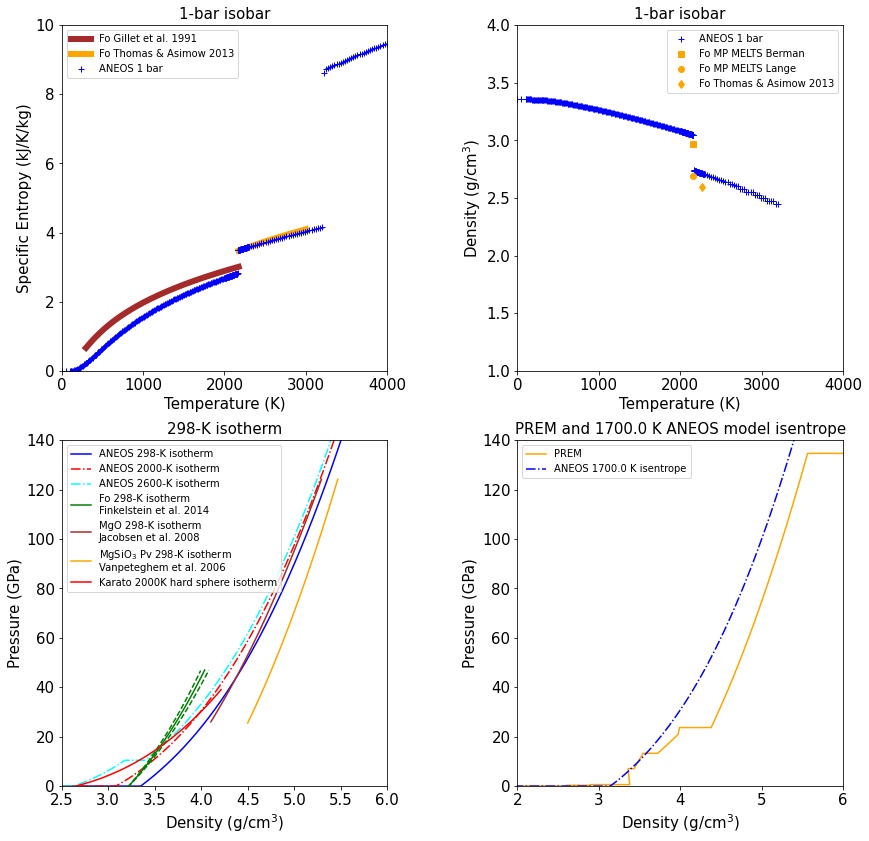

In [20]:
# 1-bar plots and 298 K plots

# Plot aneos vapor curves
sfont = 15
fig, axes = plt.subplots(2, 2, figsize=(14,14))
plt.subplots_adjust(wspace=0.4)

#--------
# temperature - entropy at 1 bar
ai=0
aj=0


axes[ai,aj].plot(fo_1barsolid_Gillet91.T,fo_1barsolid_Gillet91.S,linestyle='-',color='brown',linewidth=6,label='Fo Gillet et al. 1991')
axes[ai,aj].plot(fo_1barmelt_Gillet91.T,fo_1barmelt_Gillet91.S,linestyle='-',color='orange',linewidth=6,label='Fo Thomas & Asimow 2013')
axes[ai,aj].plot(NewEOS.onebar.T,NewEOS.onebar.S*1.E3,'+',color='blue',label='ANEOS 1 bar')

axes[ai,aj].set_xlabel('Temperature (K)',size=sfont)
axes[ai,aj].set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].set_title('1-bar isobar',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_ylim(0,10)
axes[ai,aj].set_xlim(0,4000)


#----
# density-temperature at 1 bar
ai=0
aj=1

axes[ai,aj].plot(NewEOS.onebar.T,NewEOS.onebar.rho,'+',color='blue',label='ANEOS 1 bar')

axes[ai,aj].set_ylabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_xlabel('Temperature (K)',size=sfont)
axes[ai,aj].set_title('1-bar isobar',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_ylim(1,4)
axes[ai,aj].set_xlim(0,4000)

# plot data
axes[ai,aj].plot(1890+273.,2.968,'s',color='orange',label='Fo MP MELTS Berman')
axes[ai,aj].plot(1890+273.,2.687,'o',color='orange',label='Fo MP MELTS Lange')
axes[ai,aj].plot(2273.,2.597,'d',color='orange',label='Fo Thomas & Asimow 2013')


#----
# density-pressure at 298 K
ai=1
aj=0

iT0REF = np.where(NewEOS.T == T0REF)[0]
axes[ai,aj].plot(NewEOS.rho,NewEOS.P[iT0REF[0],:],'-',color='blue',label='ANEOS 298-K isotherm')
iT0REF = np.where(NewEOS.T == 2000)[0]
axes[ai,aj].plot(NewEOS.rho,NewEOS.P[iT0REF[0],:],'-.',color='red',label='ANEOS 2000-K isotherm')
iT0REF = np.where(NewEOS.T > 2600)[0]
axes[ai,aj].plot(NewEOS.rho,NewEOS.P[iT0REF[0],:],'-.',color='cyan',label='ANEOS 2600-K isotherm')
iT0REF = np.where(NewEOS.T == T0REF)[0]

# Finkelstein et al. 2014 Forsterite isotherm
K0T = 130.0 # +-9 GPa
K0Tp = 4.12 # +- 0.07
R0F = 3.22 # g/cm3
BM_pressure = 1.5*K0T*(np.power(NewEOS.rho/R0F,7./3.)-np.power(NewEOS.rho/R0F,5./3.)
                      )*(1.+0.75*(K0Tp-4.)*(np.power(NewEOS.rho/R0F,2./3.)-1.))
K0T = 130.0-9. # +-9 GPa
K0Tp = 4.12 # +- 0.07
BM_pressure_low = 1.5*K0T*(np.power(NewEOS.rho/R0F,7./3.)-np.power(NewEOS.rho/R0F,5./3.)
                      )*(1.+0.75*(K0Tp-4.)*(np.power(NewEOS.rho/R0F,2./3.)-1.))
K0T = 130.0+9. # +-9 GPa
K0Tp = 4.12 # +- 0.07
BM_pressure_high = 1.5*K0T*(np.power(NewEOS.rho/R0F,7./3.)-np.power(NewEOS.rho/R0F,5./3.)
                      )*(1.+0.75*(K0Tp-4.)*(np.power(NewEOS.rho/R0F,2./3.)-1.))
igood = np.where(BM_pressure < 48.)
axes[ai,aj].plot(NewEOS.rho[igood],BM_pressure[igood],'-',color='green',label='Fo 298-K isotherm\nFinkelstein et al. 2014')
igood = np.where(BM_pressure_low < 48.)
axes[ai,aj].plot(NewEOS.rho[igood],BM_pressure_low[igood],'--',color='green')
igood = np.where(BM_pressure_high < 48.)
axes[ai,aj].plot(NewEOS.rho[igood],BM_pressure_high[igood],'--',color='green')


# Jacobsen et al. 2008 MgO isotherm
K0T = 159.6 # +-0.6 GPa room temp isotherm
K0Tp = 3.74 # +-0.03 
R00 = (24.305+15.999)*4.*1.6726/(74.697*1.E-3)/1.E3 # kg/m3->g/cm3 
print(R00)
BM_pressure = 1.5*K0T*(np.power(NewEOS.rho/R00,7./3.)-np.power(NewEOS.rho/R00,5./3.)
                      )*(1.+0.75*(K0Tp-4.)*(np.power(NewEOS.rho/R00,2./3.)-1.))
igood = np.where((BM_pressure > 25.)&(BM_pressure < 125.))
axes[ai,aj].plot(NewEOS.rho[igood],BM_pressure[igood],'-',color='brown',label='MgO 298-K isotherm\nJacobsen et al. 2008')

# Vanpeteghem et al. 2006 silicate perovskite isotherm
K0T = 253. # +-1 GPa room temp isotherm
K0Tp = 4.0 
R00 = (24.305+28.085+3.*15.999)*4.*1.6726/(162.51*1.E-3)/1.E3 # kg/m3->g/cm3 
print(R00)
BM_pressure = 1.5*K0T*(np.power(NewEOS.rho/R00,7./3.)-np.power(NewEOS.rho/R00,5./3.)
                      )*(1.+0.75*(K0Tp-4.)*(np.power(NewEOS.rho/R00,2./3.)-1.))
igood = np.where((BM_pressure > 25.)&(BM_pressure < 125.))
axes[ai,aj].plot(NewEOS.rho[igood],BM_pressure[igood],'-',color='orange',label='MgSiO$_3$ Pv 298-K isotherm\nVanpeteghem et al. 2006')

# Hosono et al. nat Geo hard sphere model isotherm 2000 K
K0T = 25. # GPa
K0Tp = 5.2
R00 = 2.65
BM_pressure = 1.5*K0T*(np.power(NewEOS.rho/R00,7./3.)-np.power(NewEOS.rho/R00,5./3.)
                      )*(1.+0.75*(K0Tp-4.)*(np.power(NewEOS.rho/R00,2./3.)-1.))
igood = np.where(BM_pressure < 40.)
axes[ai,aj].plot(NewEOS.rho[igood],BM_pressure[igood],'-',color='red',label='Karato 2000K hard sphere isotherm')

axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_title('298-K isotherm',size=sfont)
axes[ai,aj].set_xlim(2.5,6)
axes[ai,aj].set_ylim(0,140)

#----
# density-pressure at 298 K
ai=1
aj=1

#axes[ai,aj].plot(mantle.density,mantle.pressure,'-',color='blue',label='ANEOS '+str(np.round(np.interp(1.E-4,mantle.pressure,mantle.temperature)))+' K isentrope',markersize=10)
axes[ai,aj].plot(PREM.density/1.E3,PREM.pressure,'-',color='orange',label='PREM')

mantle = isentrope_class() # code in eostable.py
Tisentrope = 1700. #K
Smantle = np.interp(Tisentrope,NewEOS.onebar.T,NewEOS.onebar.S)

# loop across all densities and extract the values for the requested isentrope
for i in range(0,NewEOS.ND):
    ind = np.where((NewEOS.S[:,i] > 0))[0]
    interpfunction = interpolate.interp1d(NewEOS.S[ind,i],NewEOS.P[ind,i]) # MJ/K/kg, GPa
    mantle.pressure = np.append(mantle.pressure,interpfunction(Smantle)) # GPa
    interpfunction = interpolate.interp1d(NewEOS.S[ind,i],NewEOS.T[ind]) # MJ/K/kg, GPa
    mantle.temperature = np.append(mantle.temperature,interpfunction(Smantle)) # GPa
mantle.density = NewEOS.rho # g/cm3

print('Calculated pyrolite isentrope with ',np.round(np.interp(1.E-4,mantle.pressure,mantle.temperature)),' K potential temperature')
axes[ai,aj].plot(mantle.density,mantle.pressure,'-.',color='blue',label='ANEOS '+str(np.round(np.interp(1.E-4,mantle.pressure,mantle.temperature)))+' K isentrope',markersize=10)

axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_title('PREM and '+str(np.round(np.interp(1.E-4,mantle.pressure,mantle.temperature)))+' K ANEOS model isentrope',size=sfont)
axes[ai,aj].set_xlim(2,6)
axes[ai,aj].set_ylim(0,140)

# don't show a plot in lower right
#axes[1,1].axis("off")


axes[0,0].legend(fontsize=sfont-5)
axes[0,1].legend(fontsize=sfont-5)
axes[1,0].legend(fontsize=sfont-5)
axes[1,1].legend(fontsize=sfont-5)



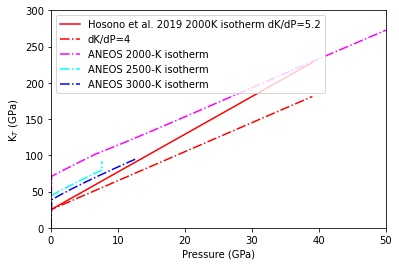

In [21]:
# Hosono et al. nat Geo 2019 hard sphere model isotherm 2000 K
K0T = 25. # GPa
K0Tp = 5.2
R00 = 2.65
BM_pressure = 1.5*K0T*(np.power(NewEOS.rho/R00,7./3.)-np.power(NewEOS.rho/R00,5./3.)
                      )*(1.+0.75*(K0Tp-4.)*(np.power(NewEOS.rho/R00,2./3.)-1.))
igood = np.where(BM_pressure < 40.)
plt.plot(BM_pressure[igood],K0T+BM_pressure[igood]*K0Tp,'-',color='red',label='Hosono et al. 2019 2000K isotherm dK/dP=5.2')
plt.plot(BM_pressure[igood],K0T+BM_pressure[igood]*4,'-.',color='red',label="dK/dP=4")

iii = np.where(NewEOS.T > 2000)[0]
igood = np.where(NewEOS.P[iii,:] < 40.)[0]
plt.plot(NewEOS.P[iii[0],igood],NewEOS.cs[iii[0],igood]*NewEOS.cs[iii[0],igood]*NewEOS.rho[igood]/1.e10,'-.',color='magenta',label='ANEOS 2000-K isotherm')

iii = np.where(NewEOS.T > 2500)[0]
igood = np.where(NewEOS.P[iii,:] < 40.)[0]
plt.plot(NewEOS.P[iii[0],igood],NewEOS.cs[iii[0],igood]*NewEOS.cs[iii[0],igood]*NewEOS.rho[igood]/1.e10,'-.',color='cyan',label='ANEOS 2500-K isotherm')

iii = np.where(NewEOS.T > 3000)[0]
igood = np.where(NewEOS.P[iii,:] < 40.)[0]
plt.plot(NewEOS.P[iii[0],igood],NewEOS.cs[iii[0],igood]*NewEOS.cs[iii[0],igood]*NewEOS.rho[igood]/1.e10,'-.',color='blue',label='ANEOS 3000-K isotherm')

plt.xlim(0,50)
plt.ylim(0,300)
plt.xlabel('Pressure (GPa)')
plt.ylabel('K$_T$ (GPa)')
plt.legend()
plt.savefig(MODELNAME+'Kt.pdf')

## ANEOS Gruneisen parameter and Theta parameter for thermal model

The Gruneisen parameter in forsterite liquid has been determined experimentally from shock wave data (Thomas & Asimow 2013; Davies et al. in prep.). Shockwave data derive the Grueneisen parameter in reference to a known state:
\begin{equation}
\gamma = \frac{1}{\rho}\frac{(P-P_{\rm ref})}{(E-E_{\rm ref})} \bigg\rvert _V
\end{equation}

The ANEOS Gruneisen model is split into two parts. For $\rho \ge \rho_{0}$,
\begin{equation}
\gamma = \left( \frac{\gamma_0 \rho_0}{\rho}  + C_{24} \left( 1-\frac{\rho_0}{\rho} \right)^2 \right) (1-C_{60}) + \left( \gamma_0 + (C_{24}-\gamma_0) \left( 1- \frac{\rho_0}{\rho} \right)^2 \right) C_{60}.
\end{equation}
For $\rho < \rho_{0}$,
\begin{equation}
\gamma = C_{16} \rho^2 + C_{17}\rho + 1 + C_{61}.
\end{equation}

$C_{16}$ and $C_{17}$ are calculated so that $\gamma$ and $d \gamma / d \rho$ are continuous at $\rho=\rho_0$. The model asymptotes to the Thomas-Fermi limit ($\gamma=2/3$) when $C_{24}=2/3$.

The functional form in ANEOS does not provide a good fit to the data on forsterite. As a result, the model Gruneisen parameter does not extrapolate to the Thomas-Fermi limit at high pressures. 

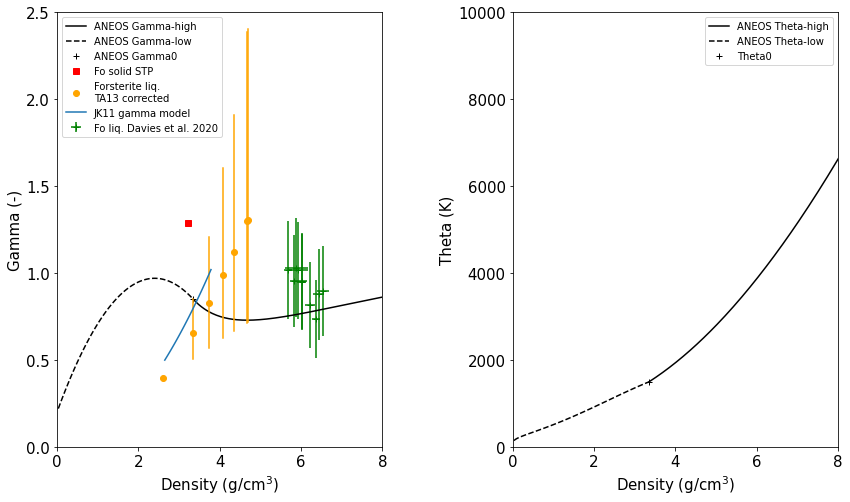

In [22]:
# plot the gamma and isotherms

# ANEOS Formulation for Gamma and theta
theta0=abs(NewEOS.theta0)
rhoarr = (1+np.arange(1000))/1000.*NewEOS.R0REF*10.
gammaarr = (NewEOS.gamma0*NewEOS.R0REF/rhoarr
           )+NewEOS.C24*np.power(1.0-NewEOS.R0REF/rhoarr,2.)*(1.-NewEOS.C60)+(NewEOS.gamma0 + (NewEOS.C24-NewEOS.gamma0)*np.power(1.-NewEOS.R0REF/rhoarr,2.))*NewEOS.C60
s3 = NewEOS.C61+1.
C14 = theta0 * np.exp(1.5*s3-(2.-0.5*NewEOS.C60)*NewEOS.gamma0)/(np.power(NewEOS.R0REF,s3))
C16 = (s3-(2.-NewEOS.C60)*NewEOS.gamma0)/(NewEOS.R0REF*NewEOS.R0REF)
C17 = ((3.-NewEOS.C60)*NewEOS.gamma0-2.*s3)/NewEOS.R0REF
gammaarrlow = C16*rhoarr*rhoarr+C17*rhoarr+s3
thetaarr = theta0*np.exp((1.-NewEOS.C60)*(1.-NewEOS.R0REF/rhoarr)*NewEOS.gamma0-0.5*(NewEOS.R0REF/rhoarr)*(3.-(NewEOS.R0REF/rhoarr)*(4-(NewEOS.R0REF/rhoarr))))*np.power((rhoarr/NewEOS.R0REF),NewEOS.C24)
thetalowarr = C14*np.exp(rhoarr*(C17+0.5*C16*rhoarr))*np.power(rhoarr,s3)


#-------- plots
sfont = 15
fig, axes = plt.subplots(1, 2, figsize=(14,8))
plt.subplots_adjust(wspace=0.4)


# -----
ai=0
indlow = np.where(rhoarr <= NewEOS.R0REF)
indhigh = np.where(rhoarr >= NewEOS.R0REF)
axes[ai].plot(rhoarr[indhigh[0]],gammaarr[indhigh[0]],label="ANEOS Gamma-high",color='black')
axes[ai].plot(rhoarr[indlow[0]], gammaarrlow[indlow[0]],label="ANEOS Gamma-low",color='black',ls='--')

axes[ai].plot(NewEOS.R0REF,NewEOS.gamma0,'+',label="ANEOS Gamma0",color='black')

axes[ai].set_ylim(0,2.5)
axes[ai].set_xlim(0,8)

axes[ai].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai].set_ylabel('Gamma (-)',size=sfont)
axes[ai].tick_params(labelsize=sfont)

# solid forsterite at STP
axes[ai].plot([3.22],[1.29],'s',color='red',label='Fo solid STP')

# Thomas and Asimow 2013 liquid forsterite shock data
gamma_0=0.396
q=-2.02
q_u=1.03
Rho_0=2597. # kg/m^3
asi_rhot = np.array([3739.79122056, 3335.90237636,4691.02371542 ,4088.40354767, 4347.15217391 ,4681.1865942 ])
##asi_rhot=np.array([3340.0, 3740.0, 4100.0, 4680.0, 5290.0, 5420.0]) # BAD TABULATED VALUES in TA13
asi_gammat=gamma_0*np.power(Rho_0/asi_rhot,q)

asi_rho = np.append([2597.],asi_rhot)/1.e3
asi_gamma = np.append([0.396],asi_gammat)

#print(asi_rho)
#print(asi_gamma)
#[3739.79122056 3335.90237636 4691.02371542 4088.40354767 4347.15217391 4681.1865942 ]
#[0.82720568 0.65667847 1.30744208 0.99037675 1.12107749 1.30190973]

# Erik's error bars monte carlo'd for the asimow data
#gamma [ 0.82271901  0.65485213  1.29584059  0.97276836  1.11171104  1.29195917]
asi_gamma_sig_low=np.asarray([0., 0.25715384 , 0.14948592 , 0.5898531,   0.36154228 , 0.45607297 , 0.58790934])
asi_gamma_sig_high=np.asarray([0., 0.37855329,  0.19525818 , 1.09577441,  0.6137275 ,  0.78965792 , 1.08676142])

axes[ai].plot(asi_rho,asi_gamma,'o',color='orange',label='Forsterite liq.\nTA13 corrected')
for i in range(0,len(asi_gamma)):
    axes[ai].plot([asi_rho[i],asi_rho[i]],[asi_gamma[i]-asi_gamma_sig_low[i],asi_gamma[i]+asi_gamma_sig_high[i]],linestyle='-',color='orange')

# these values from the submitted paper
axes[ai].errorbar(fo_gamma_Davies20.rho,fo_gamma_Davies20.gamma,yerr=fo_gamma_Davies20.gamma_err, xerr=fo_gamma_Davies20.rho_err, fmt='g+', label ='Fo liq. Davies et al. 2020')

gamma_0=0.5
Rho_0=2.65
Karato_gammar=np.arange(.7,1,.01)
q=-2
Karato_gammat=gamma_0*np.power(Karato_gammar,q)
axes[ai].plot(Rho_0/(Karato_gammar),Karato_gammat,label='JK11 gamma model')
#print(Rho_0/Karato_gammar)
#print(Karato_gammat)


#print('pyrolite data:')
#print('densities: ',dgarr)
#print('gammas: ',ggarr)
#axes[ai].plot(dgarr,ggarr,'x',label='Pyrolitic liquid DFTMD')
# -----
ai=1
axes[ai].plot(rhoarr[indhigh[0]],thetaarr[indhigh[0]],label="ANEOS Theta-high",color='black')
axes[ai].plot(rhoarr[indlow[0]],thetalowarr[indlow[0]],label="ANEOS Theta-low",color='black',ls='--')
axes[ai].plot(NewEOS.R0REF,theta0,'+',label="Theta0",color='black')

axes[ai].set_ylim(0,10000)
axes[ai].set_xlim(0,8)

axes[ai].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai].set_ylabel('Theta (K)',size=sfont)
axes[ai].tick_params(labelsize=sfont)


axes[0].legend(fontsize=sfont-5)
axes[1].legend(fontsize=sfont-5)



# Specfic Heat Capacity and Sounds Speeds

The calculated heat capacities on the forsterite Hugoniot in the liquid region, from Root et al. 2018, are similar to the 1-bar value derived from Thomas and Asimow 2013. Both are larger than the 3nR high temperature value for the solid (Gillet et al. 1991).

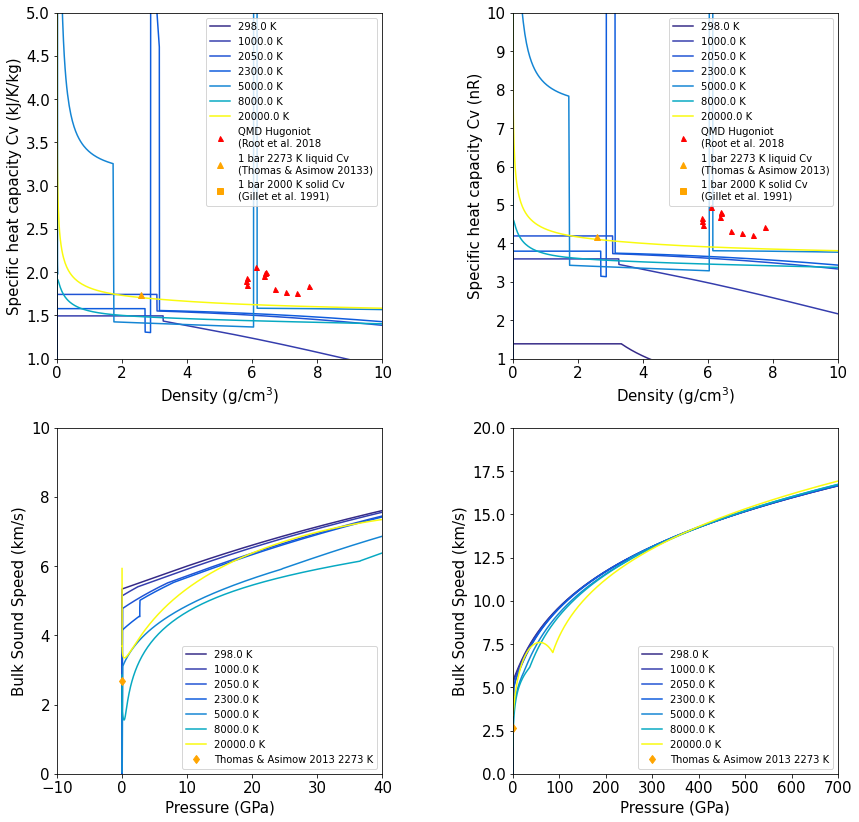

In [23]:

sfont = 15
fig, axes = plt.subplots(2, 2, figsize=(14,14))
plt.subplots_adjust(wspace=0.4)


#-----------------------------
# Pick isotherms and set color scale
ixtemparr = [298.,1000.,2050.,2300.,5000.,8000.,20000.]
# set color scale same for all plots
tcolmin=0.
tcolmax=20000.

# find the index closest to the selected temperatures -- no interpolation
ixindarr=np.zeros(len(ixtemparr))
ixlabelarr = []
for i in np.arange(len(ixtemparr)):
    tmpi=int(np.round(np.interp(ixtemparr[i],NewEOS.T,np.arange(NewEOS.NT))))
    #print(tmpi,antarr[tmpi])
    ixindarr[i] = tmpi
    ixlabelarr.append(str(ixtemparr[i])+' K')


#-----------------------
ai=0
aj=0
for i in np.arange(len(ixtemparr)):
    icolscale = (ixtemparr[i]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.rho,NewEOS.cv[int(ixindarr[i]),:]*1000.,c=col,linestyle='-',label=ixlabelarr[i])

axes[ai,aj].plot(fo_hug_QMDRoot18.rho,fo_hug_QMDRoot18.cv*1000.,styleqmd[0],markersize=styleqmd[2],color=styleqmd[1],label='QMD Hugoniot\n(Root et al. 2018')
axes[ai,aj].plot(2.597,1.73736,'^',color='orange',label='1 bar 2273 K liquid Cv\n(Thomas & Asimow 20133)')
axes[ai,aj].plot(3.,180./(NewEOS.FMW/1.E3)/1.E3,'s',color='orange',label='1 bar 2000 K solid Cv\n(Gillet et al. 1991)')
axes[ai,aj].set_ylim(1.,5.)
axes[ai,aj].set_xlim(0,10)

axes[ai,aj].set_ylabel('Specific heat capacity Cv (kJ/K/kg)',size=sfont)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#-----------------------
ai=0
aj=1
for i in np.arange(len(ixtemparr)):
    icolscale = (ixtemparr[i]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.rho,NewEOS.cv[int(ixindarr[i]),:]*1000.*1000./7/8.314*0.14,c=col,linestyle='-',label=ixlabelarr[i])


axes[ai,aj].plot(fo_hug_QMDRoot18.rho,fo_hug_QMDRoot18.cv*1.E6/7/8.314*0.14,styleqmd[0],markersize=styleqmd[2],color=styleqmd[1],label='QMD Hugoniot\n(Root et al. 2018')
axes[ai,aj].plot(2.597,1737./7/8.314*0.140,'^',color='orange',label='1 bar 2273 K liquid Cv\n(Thomas & Asimow 2013)')
axes[ai,aj].plot(3.,180./(NewEOS.FMW/1.E3)/7/8.314*0.140,'s',color='orange',label='1 bar 2000 K solid Cv\n(Gillet et al. 1991)')
axes[ai,aj].set_ylim(1.,10.)
axes[ai,aj].set_xlim(0,10)

axes[ai,aj].set_ylabel('Specific heat capacity Cv (nR)',size=sfont)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#-----------------------
# plot sound speed along isotherms
ai=1
aj=0
for i in np.arange(len(ixtemparr)):
    icolscale = (ixtemparr[i]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.P[int(ixindarr[i]),:],NewEOS.cs[int(ixindarr[i]),:]/1.e5,c=col,linestyle='-',label=ixlabelarr[i])

axes[ai,aj].plot(1.e-4,2.674,'d',color='orange',label='Thomas & Asimow 2013 2273 K')

axes[ai,aj].set_ylim(0,10)
axes[ai,aj].set_xlim(-10,40)

axes[ai,aj].set_ylabel('Bulk Sound Speed (km/s)',size=sfont)
axes[ai,aj].set_xlabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


#-----------------------
# plot sound speed along isotherms
ai=1
aj=1
for i in np.arange(len(ixtemparr)):
    icolscale = (ixtemparr[i]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.P[int(ixindarr[i]),:],NewEOS.cs[int(ixindarr[i]),:]/1.e5,c=col,linestyle='-',label=ixlabelarr[i])

axes[ai,aj].plot(1.e-4,2.674,'d',color='orange',label='Thomas & Asimow 2013 2273 K')

axes[ai,aj].set_ylim(0,20)
axes[ai,aj].set_xlim(0,700)

axes[ai,aj].set_ylabel('Bulk Sound Speed (km/s)',size=sfont)
axes[ai,aj].set_xlabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

axes[0,0].legend(fontsize=sfont-5)
axes[0,1].legend(fontsize=sfont-5)
axes[1,0].legend(fontsize=sfont-5)
axes[1,1].legend(fontsize=sfont-5)


## Check the grid spacing compared to the phase boundaries

Colors correspond to temperature. Black lines are ANEOS phase boundaries.

Note that ANEOS by default puts a tension region in for the solid that extends to rhomin (V17) in the input file. 

If the tension region is kept, it is visible as a kink connects to the low entropy extension of the melt curve in the lower left plot of density vs. specific entropy. 

The lack of points below 1000 K in the vapor dome (seen in temperature vs. specific entropy upper left) corresponds to when the sublimation pressure reaches 1.E-30. At this point, ANEOS bottoms out the pressures at this value and fixes the other state variables (it looks like to constant values; will investigate this region more closely later).

The ANEOS triple point convergence is not perfect, and there are kinks in the tabulated phase boundaries right at the triple point.

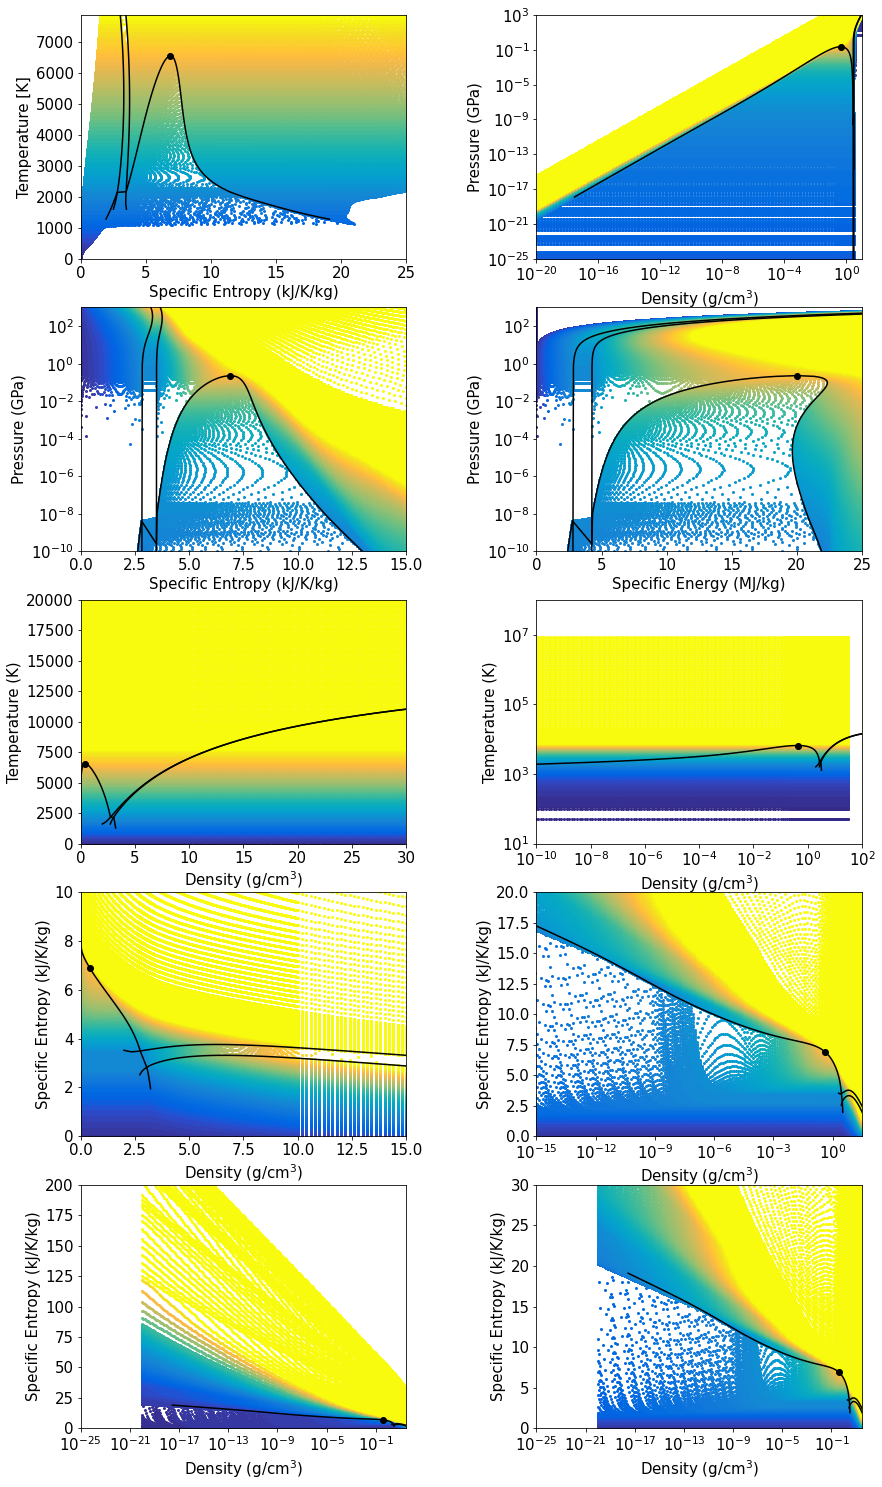

In [24]:
# check the gridding of the table around the vapor curve

# Plot aneos vapor curves
sfont = 15
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14,26))
plt.subplots_adjust(wspace=0.4)
tcolmin=0.
tcolmax=1.2*NewEOS.cp.T
tpltmax=1.2*NewEOS.cp.T

tskip=1
#-------------
ai=0
aj=0
axes[ai,aj].set_xlabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].set_ylabel('Temperature [K]',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

axes[ai,aj].set_ylim(0,tpltmax)
axes[ai,aj].set_xlim(0,25)

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.S[it,:]*1.e3,np.zeros(NewEOS.ND)+NewEOS.T[it],'o',markersize=2,color=col)

axes[ai,aj].plot(NewEOS.vc.Sl*1.e3,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.vc.Sv*1.e3,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.cp.S*1.e3,NewEOS.cp.T,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Sl*1.e3,NewEOS.mc.T,color="black")
    axes[ai,aj].plot(NewEOS.mc.Ss*1.e3,NewEOS.mc.T,color="black")


#-------------
ai=0
aj=1
for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.rho,NewEOS.P[it,:],'o',markersize=2,color=col)
axes[ai,aj].loglog(NewEOS.vc.rl,NewEOS.vc.Pl,color="black")
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.Pv,color="black")
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.P,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_ylim(1.e-25,1000)
axes[ai,aj].set_xlim(1.e-20,10.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


#-------------
ai=1
aj=0


for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.S[it,:]*1.E3,NewEOS.P[it,:],'o',markersize=2,color=col)
axes[ai,aj].semilogy(NewEOS.vc.Sl*1.e3,NewEOS.vc.Pl,color="black")
axes[ai,aj].plot(NewEOS.vc.Sv*1.e3,NewEOS.vc.Pv,color="black")
axes[ai,aj].plot(NewEOS.cp.S*1.e3,NewEOS.cp.P,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Sl*1.e3,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.Ss*1.e3,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_ylim(1.e-10,1000)
axes[ai,aj].set_xlim(0,15)
axes[ai,aj].set_xlabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#-------------
ai=1
aj=1


for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.U[it,:],NewEOS.P[it,:],'o',markersize=2,color=col)

axes[ai,aj].semilogy(NewEOS.vc.Ul,NewEOS.vc.Pl,color="black")
axes[ai,aj].plot(NewEOS.vc.Uv,NewEOS.vc.Pv,color="black")
axes[ai,aj].plot(NewEOS.cp.U,NewEOS.cp.P,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Ul,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.Us,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_ylim(1.e-10,1000)
axes[ai,aj].set_xlim(0,25)
axes[ai,aj].set_xlabel('Specific Energy (MJ/kg)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)



#-------------
ai=2
aj=0

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.rho,np.zeros(NewEOS.ND)+NewEOS.T[it],'o',markersize=2,color=col)
axes[ai,aj].plot(NewEOS.vc.rl,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.T,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.T,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.T,color="black")

axes[ai,aj].set_ylim(0.,20000)
axes[ai,aj].set_xlim(0,30.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Temperature (K)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


#-------------
ai=2
aj=1

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].loglog(NewEOS.rho,np.zeros(NewEOS.ND)+NewEOS.T[it],'o',markersize=2,color=col)

axes[ai,aj].semilogx(NewEOS.vc.rl,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.T,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.T,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.T,color="black")

axes[ai,aj].set_ylim(10.,1.E8)
axes[ai,aj].set_xlim(1.E-10,100.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Temperature (K)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#-------------
ai=3
aj=0

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.rho,NewEOS.S[it,:]*1000.,'o',markersize=2,color=col)

axes[ai,aj].plot(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black")
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black")
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.S*1.E3,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ss*1.E3,color="black")


axes[ai,aj].set_ylim(0.,10)
axes[ai,aj].set_xlim(0.,15.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#-------------
ai=3
aj=1

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].semilogx(NewEOS.rho,NewEOS.S[it,:]*1000.,'o',markersize=2,color=col)

axes[ai,aj].semilogx(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black")
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black")
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.S*1.E3,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ss*1.E3,color="black")

axes[ai,aj].set_ylim(0.,20)
axes[ai,aj].set_xlim(1.E-15,30.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)




#-------------
ai=4
aj=1

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].semilogx(NewEOS.rho,NewEOS.S[it,:]*1000.,'o',markersize=2,color=col)

axes[ai,aj].semilogx(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black")
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black")
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.S*1.E3,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ss*1.E3,color="black")

axes[ai,aj].set_ylim(0.,30)
axes[ai,aj].set_xlim(1.E-25,30.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#-------------
ai=4
aj=0

tcolmax=40000.
for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].semilogx(NewEOS.rho,NewEOS.S[it,:]*1000.,'o',markersize=2,color=col)

axes[ai,aj].semilogx(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black")
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black")
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.S*1.E3,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ss*1.E3,color="black")

axes[ai,aj].set_ylim(0.,200)
axes[ai,aj].set_xlim(1.E-25,30.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#axes[0,0].legend(fontsize=sfont-5)
#axes[0,1].legend(fontsize=sfont-5)
#axes[1,0].legend(fontsize=sfont-5)
#axes[1,1].legend(fontsize=sfont-5)



# ANEOS KPA FLAG

                                TABLE          ANEOS
     KPAQQ=STATE INDICATOR      =1, 1p    =1, 1p    (eos without melt)
                                =2, 2p lv =2, 2p liquid/solid plus vapor
                                          =4, 1p solid  (eos with melt)
                                          =5, 2p melt   (eos with melt)
                                          =6, 1p liquid (eos with melt)
                                =-1 bad value of temperature
                                =-2 bad value of density
                                =-3 bad value of material number

To resolve a melt curve, there should be sufficient numbers of points within the melt curve (KPA=5, red points) so that the melt curve is continuously sampled in the grid.

The pink region is where the vapor pressure is bottomed out at 1.E-30 GPa or the pressures are negative (if there is a tension region.)

Every 10th isotherm is plotted.

Unique values in the KPA flag array: [2. 4. 5. 6.]
Value: # elements with this value
2.0 :  116341
4.0 :  191062
5.0 :  4084
6.0 :  328353


/Users/sts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:148: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


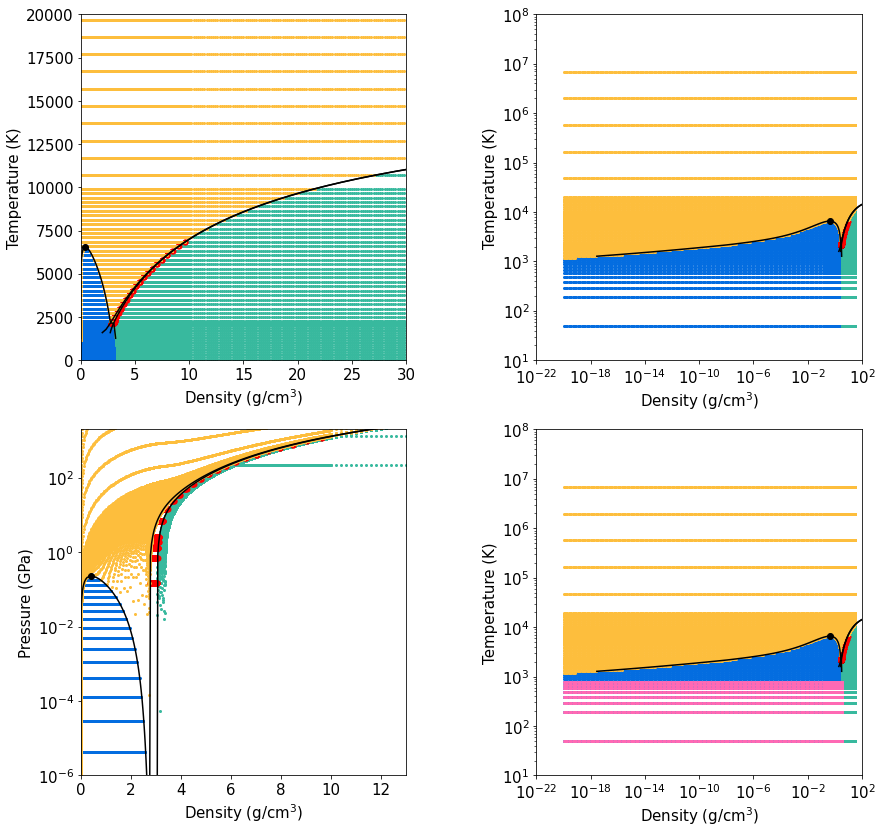

In [25]:
# check the ANEOS quality flag for errors in the EOS surface
uniqkarr = np.unique(NewEOS.KPA)
print("Unique values in the KPA flag array:", uniqkarr)
print("Value: # elements with this value")
#get_indexes = lambda x, xs: [i for (y, i) in zip(xs, range(len(xs))) if x == y]

for i in uniqkarr:
    ix = get_indexes(i,np.reshape(NewEOS.KPA,NewEOS.ND*NewEOS.NT))
    print(i,': ',len(ix))


    
# Plot aneos vapor curves
sfont = 15
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,14))
plt.subplots_adjust(wspace=0.4)
kcolmin=1
kcolmax=7

tskip=10
#-------------


#-------------
ai=0
aj=0
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Temperature (K)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


for itt in range(1,NewEOS.NT,tskip):
    for i in uniqkarr:
        ix = get_indexes(i,NewEOS.KPA[itt,:])
        icolscale = (i-kcolmin)/(kcolmax-kcolmin)
        col=local_cmaps.parula(icolscale)
        if i == 5:
            axes[ai,aj].plot(NewEOS.rho[ix],np.full(len(ix),NewEOS.T[itt]),'o',markersize=5,color='red')
#            print(i,andarr[ix],antarr[itt])
        else:
            axes[ai,aj].plot(NewEOS.rho[ix],np.full(len(ix),NewEOS.T[itt]),'o',markersize=2,color=col)

axes[ai,aj].plot(NewEOS.vc.rl,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.T,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.T,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.T,color="black")


axes[ai,aj].set_ylim(0.,20000)
axes[ai,aj].set_xlim(0,30.)


#-------------
ai=0
aj=1

for itt in range(1,NewEOS.NT,tskip):
    for i in uniqkarr:
        ix = get_indexes(i,NewEOS.KPA[itt,:])
        icolscale = (i-kcolmin)/(kcolmax-kcolmin)
        col=local_cmaps.parula(icolscale)
        if i == 5:
            axes[ai,aj].loglog(NewEOS.rho[ix],np.full(len(ix),NewEOS.T[itt]),'o',markersize=5,color='red')
#            print(i,andarr[ix],antarr[itt])
        else:
            axes[ai,aj].loglog(NewEOS.rho[ix],np.full(len(ix),NewEOS.T[itt]),'o',markersize=2,color=col)

axes[ai,aj].loglog(NewEOS.vc.rl,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.T,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.T,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.T,color="black")

axes[ai,aj].set_ylim(10.,1.E8)
axes[ai,aj].set_xlim(1.E-22,100.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Temperature (K)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


#-------------
ai=1
aj=0
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


for itt in range(1,NewEOS.NT,tskip):
    for i in uniqkarr:
        ix = get_indexes(i,NewEOS.KPA[itt,:])
        icolscale = (i-kcolmin)/(kcolmax-kcolmin)
        col=local_cmaps.parula(icolscale)
        if i == 5:
            axes[ai,aj].semilogy(NewEOS.rho[ix],NewEOS.P[itt,ix],'o',markersize=5,color='red')
#            print(i,andarr[ix],antarr[itt])
        else:
            axes[ai,aj].semilogy(NewEOS.rho[ix],NewEOS.P[itt,ix],'o',markersize=2,color=col)

axes[ai,aj].semilogy(NewEOS.vc.rl,NewEOS.vc.Pl,color="black")
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.Pv,color="black")
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.P,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_ylim(1.e-6,2000)
axes[ai,aj].set_xlim(0,13.)


#-------------
ai=1
aj=1
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Temperature (K)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


for itt in range(1,NewEOS.NT,tskip):
    for i in uniqkarr:
        ix = get_indexes(i,NewEOS.KPA[itt,:])
        icolscale = (i-kcolmin)/(kcolmax-kcolmin)
        col=local_cmaps.parula(icolscale)
        if i == 5:
            axes[ai,aj].plot(NewEOS.rho[ix],np.full(len(ix),NewEOS.T[itt]),'o',markersize=5,color='red')
#            print(i,andarr[ix],antarr[itt])
        else:
            axes[ai,aj].plot(NewEOS.rho[ix],np.full(len(ix),NewEOS.T[itt]),'o',markersize=2,color=col)
    tmp = np.where(NewEOS.P[itt,:] < 0.)
    if (len(tmp[0]) > 0):
        axes[ai,aj].plot(NewEOS.rho[tmp[0]],np.full(len(tmp[0]),NewEOS.T[itt]),'o',markersize=2,color='purple')
    tmp = np.where(NewEOS.P[itt,:]*1.e30 <= 2.)
    if (len(tmp[0]) > 0):
        axes[ai,aj].plot(NewEOS.rho[tmp[0]],np.full(len(tmp[0]),NewEOS.T[itt]),'o',markersize=2,color='hotpink')

axes[ai,aj].loglog(NewEOS.vc.rl,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.T,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.T,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.T,color="black")
    
axes[ai,aj].set_ylim(10.,1.E8)
axes[ai,aj].set_xlim(1.E-22,100.)
fig.show()

# Check the Melt Curve in Tabulated EOS

Colored lines correspond to isotherms. Black lines are ANEOS phase boundaries.

Tabulations of the equation of state can lead to erroneous material descriptions across the melt curve. In the following plots, the isotherms should be flat (constant pressure) across the phase boundary (black lines). Every 10th isotherm in the table is shown in the plotted regions.

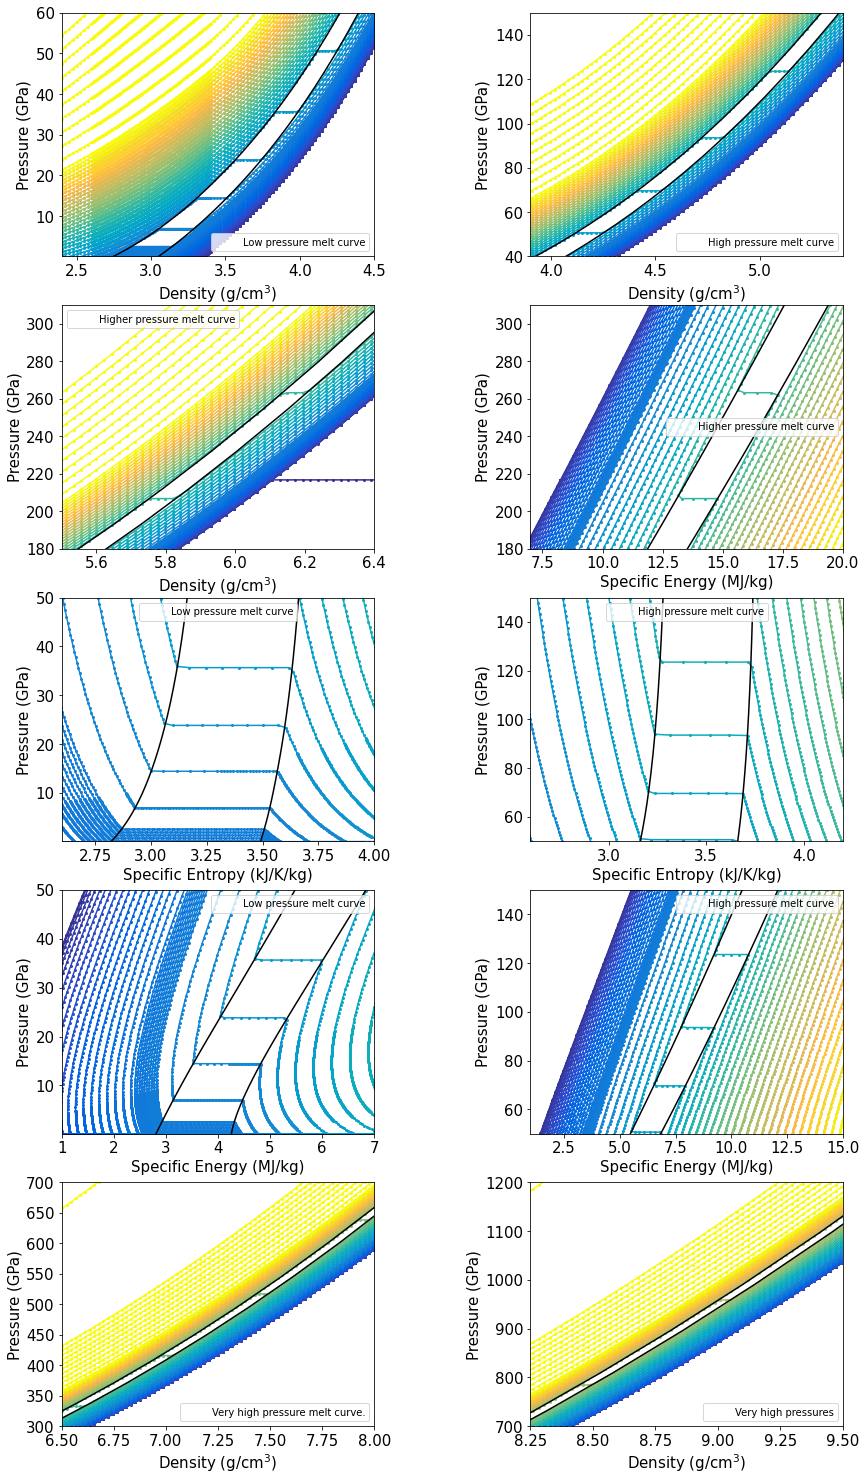

In [26]:
# CHECK MELT CURVE GRIDDING
sfont = 15
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14,26))
plt.subplots_adjust(wspace=0.5)
tcolmin=0.
tcolmax=1.5*NewEOS.cp.T
tpltmax=1.5*NewEOS.cp.T

tskip=10
#-------------
ai=0
aj=0
axes[ai,aj].plot([],[],' ',label='Low pressure melt curve')

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.rho,NewEOS.P[it,:],'o',markersize=2,linestyle='-',color=col)

if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_ylim(.1,60)
axes[ai,aj].set_xlim(2.4,4.5)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#-------------
ai=0
aj=1
axes[ai,aj].plot([],[],' ',label='High pressure melt curve')

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.rho,NewEOS.P[it,:],'o',markersize=2,linestyle='-',color=col)

if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_ylim(40.,150)
axes[ai,aj].set_xlim(3.9,5.4)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


#-------------
ai=1
aj=0
axes[ai,aj].plot([],[],' ',label='Higher pressure melt curve')

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.rho,NewEOS.P[it,:],'o',markersize=2,linestyle='-',color=col)

if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ps,color="black")


axes[ai,aj].set_ylim(180.,310)
axes[ai,aj].set_xlim(5.5,6.4)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


#-------------
ai=1
aj=1
axes[ai,aj].plot([],[],' ',label='Higher pressure melt curve')

axes[ai,aj].set_xlabel('Specific Energy (MJ/kg)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.U[it,:],NewEOS.P[it,:],'o',markersize=2,linestyle='-',color=col)

if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Ul,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.Us,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_ylim(180.,310)
axes[ai,aj].set_xlim(7,20)

#-------------

ai=2
aj=0
axes[ai,aj].plot([],[],' ',label='Low pressure melt curve')

axes[ai,aj].set_xlabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.S[it,:]*1.e3,NewEOS.P[it,:],'o',markersize=2,linestyle='-',color=col)

if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Sl*1.e3,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.Ss*1.e3,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_ylim(.1,50)
axes[ai,aj].set_xlim(2.6,4.)


#-------------

ai=2
aj=1
axes[ai,aj].plot([],[],' ',label='High pressure melt curve')

axes[ai,aj].set_xlabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.S[it,:]*1.e3,NewEOS.P[it,:],'o',markersize=2,linestyle='-',color=col)

if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Sl*1.e3,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.Ss*1.e3,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_ylim(50.,150)
axes[ai,aj].set_xlim(2.6,4.2)


#-------------
ai=3
aj=0
axes[ai,aj].plot([],[],' ',label='Low pressure melt curve')

axes[ai,aj].set_xlabel('Specific Energy (MJ/kg)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.U[it,:],NewEOS.P[it,:],'o',markersize=2,linestyle='-',color=col)

if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Ul,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.Us,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_xlim(1,7)
axes[ai,aj].set_ylim(.1,50)

#-------------
ai=3
aj=1
axes[ai,aj].plot([],[],' ',label='High pressure melt curve')

axes[ai,aj].set_xlabel('Specific Energy (MJ/kg)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.U[it,:],NewEOS.P[it,:],'o',markersize=2,linestyle='-',color=col)
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Ul,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.Us,NewEOS.mc.Ps,color="black")
axes[ai,aj].set_ylim(50.,150)
axes[ai,aj].set_xlim(1,15)



#-------------
ai=4
aj=0
for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.rho,NewEOS.P[it,:],'o',markersize=2,color=col,linestyle='-')

if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_ylim(300,700)
axes[ai,aj].set_xlim(6.5,8.)

axes[ai,aj].plot([],[],' ',label='Very high pressure melt curve.')
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#-------------
ai=4
aj=1
for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.rho,NewEOS.P[it,:],'o',markersize=2,linestyle='-',color=col)
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ps,color="black")
axes[ai,aj].set_ylim(700,1200)
axes[ai,aj].set_xlim(8.25,9.5)

axes[ai,aj].plot([],[],' ',label='Very high pressures')
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#------
axes[0,0].legend(fontsize=sfont-5)
axes[0,1].legend(fontsize=sfont-5)
axes[1,0].legend(fontsize=sfont-5)
axes[1,1].legend(fontsize=sfont-5)
axes[2,0].legend(fontsize=sfont-5)
axes[2,1].legend(fontsize=sfont-5)
axes[3,0].legend(fontsize=sfont-5)
axes[3,1].legend(fontsize=sfont-5)
axes[4,0].legend(fontsize=sfont-5)
axes[4,1].legend(fontsize=sfont-5)



# PLOT GADGET2 FORMAT TABLE: Entropy-Density grid

## Color contour plots of the GADGET Rho-S table

The SESAME table and GADGET table use the same density array. So the GADGET table is linearly interpolated along a density-column to find the new table values at each point in the GADGET entropy grid. 

Errors in the interpolation, particularly near phase boundaries, can be seen in the sound speeds and KPA flags.


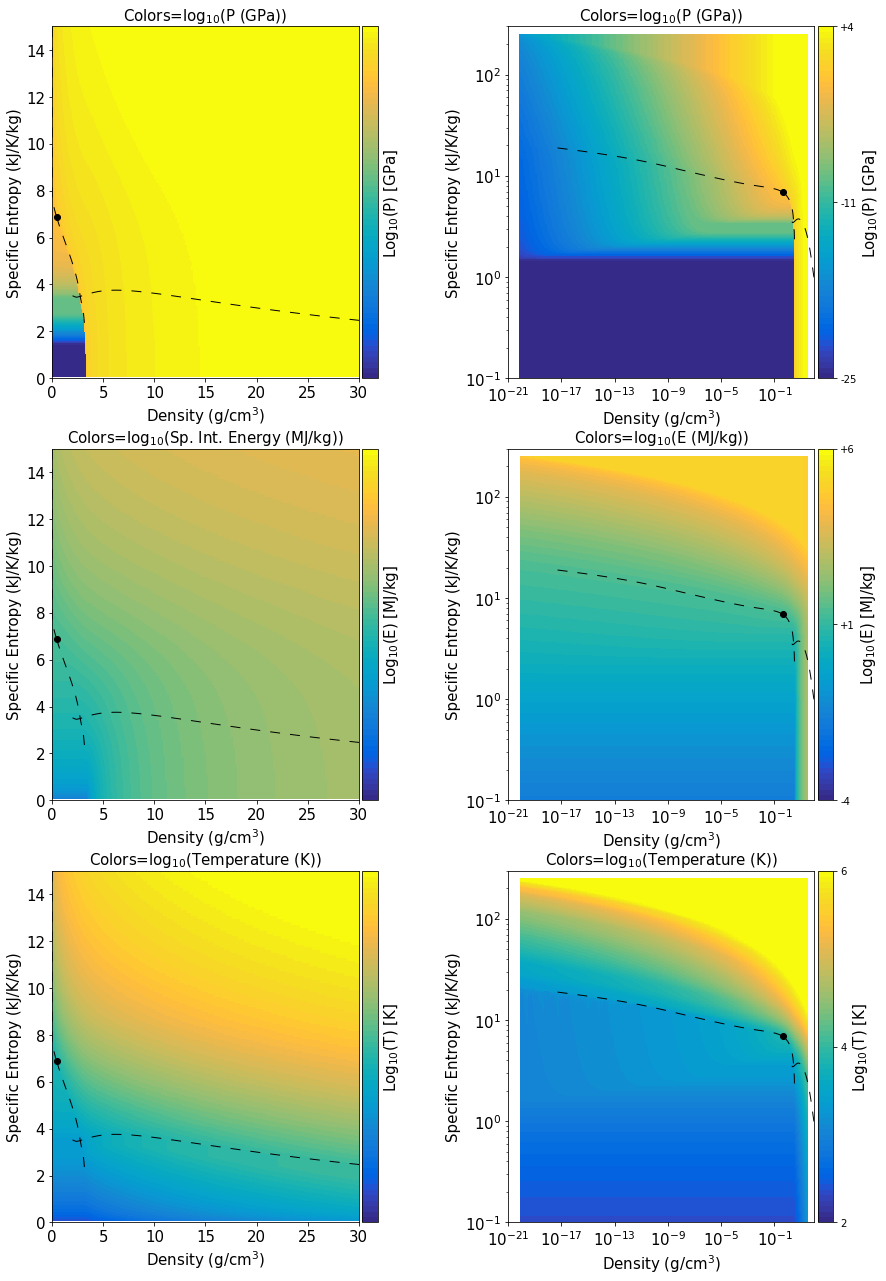

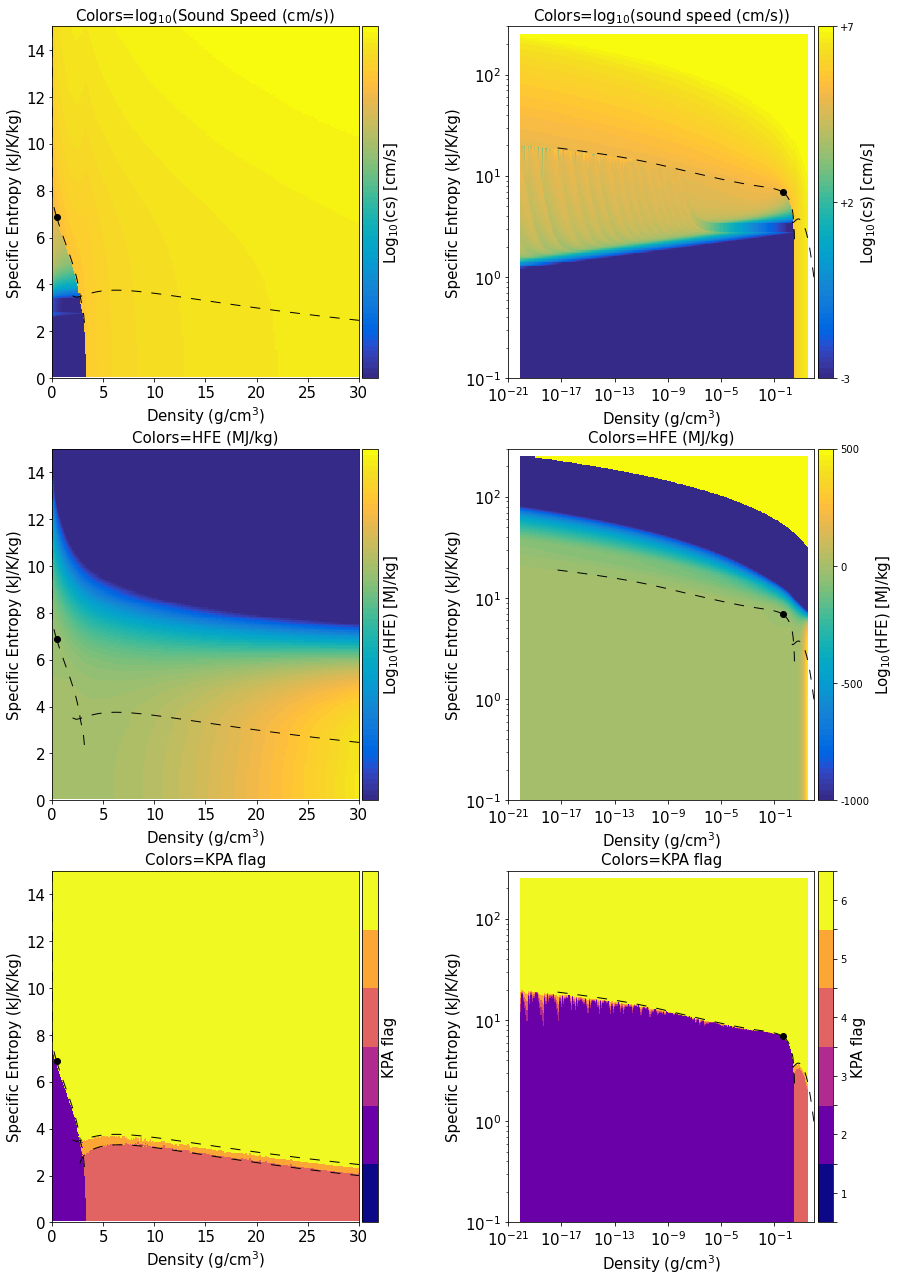

In [27]:
if MAKEGADGETTABLE == 1:
    # PLOT COLOR SHADED VALUES RHO-S TABLE
    lw=1
    sfont = 15
    ds = (10,10)

    fig, ([ax0, ax1], [ax2,ax3], [ax4,ax5])= plt.subplots(nrows=3,ncols=2,figsize=(14,22))
    plt.subplots_adjust(wspace=0.4)

    ##================ Pressure
    im1=ax0.pcolormesh(GadEOS.rho,GadEOS.S*1.e3,(np.log10(GadEOS.P)+25)/29.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
    ax0.plot(NewEOS.vc.rl,NewEOS.vc.Sl*1.e3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax0.plot(NewEOS.vc.rv,NewEOS.vc.Sv*1.e3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax0.plot(NewEOS.vc.rl[0],NewEOS.vc.Sl[0]*1.e3,'ko')
    if NewEOS.mc.NT > 0:
        ax0.plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    #    ax0.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

    ax0.set_ylim(0.,15)
    ax0.set_xlim(0,30.)
    ax0.set_xlabel('Density (g/cm$^3$)',size=sfont)
    ax0.set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
    ax0.set_title('Colors=log$_{10}$(P (GPa))',size=sfont)
    ax0.tick_params(labelsize=sfont)

    divider0 = make_axes_locatable(ax0)
    cax0 = divider0.append_axes('right', size='5%', pad=0.05)
    cbar0 = fig.colorbar(im1, cax=cax0, ticks = [],orientation='vertical')
    #cbar0.ax.set_yticklabels(['  ','  ','  '])  # vertical colorbar
    cbar0.set_label('Log$_{10}$(P) [GPa]',size=sfont)
    #cbar0.ax.set_yticklabels(['-25','-11','+4'])  # vertical colorbar

    im1=ax1.pcolormesh(GadEOS.rho,GadEOS.S*1.E3,(np.log10(GadEOS.P)+25)/29.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
    ax1.loglog(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax1.plot(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax1.plot(NewEOS.vc.rl[0],NewEOS.vc.Sl[0]*1.E3,'ko')
    if NewEOS.mc.NT > 0:
        ax1.plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    #    ax1.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

    ax1.set_ylim(0.1,300)
    ax1.set_xlim(1.E-21,100.)
    ax1.set_xlabel('Density (g/cm$^3$)',size=sfont)
    ax1.set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
    ax1.set_title('Colors=log$_{10}$(P (GPa))',size=sfont)
    ax1.tick_params(labelsize=sfont)

    divider = make_axes_locatable(ax1)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
    cbar.ax.set_yticklabels(['-25','-11', '+4'])  # vertical colorbar
    cbar.set_label('Log$_{10}$(P) [GPa]',size=sfont)



    #================ Sp. Int. Energy
    im1=ax2.pcolormesh(GadEOS.rho,GadEOS.S*1.E3,(np.log10(GadEOS.U)+4.)/10.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
    ax2.plot(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax2.plot(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax2.plot(NewEOS.vc.rl[0],NewEOS.vc.Sl[0]*1.E3,'ko')
    if NewEOS.mc.NT > 0:
        ax2.plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    #    ax2.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

    ax2.set_ylim(0.,15)
    ax2.set_xlim(0,30.)
    ax2.set_xlabel('Density (g/cm$^3$)',size=sfont)
    ax2.set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
    ax2.set_title('Colors=log$_{10}$(Sp. Int. Energy (MJ/kg))',size=sfont)
    ax2.tick_params(labelsize=sfont)

    divider = make_axes_locatable(ax2)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    # does not want to label ticks in this location
    cbar = fig.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
    #cbar.ax.set_yticklabels(['-4','+1','+6'])  # vertical colorbar
    cbar.set_label('Log$_{10}$(E) [MJ/kg]',size=sfont)


    ax3.pcolormesh(GadEOS.rho,GadEOS.S*1.E3,(np.log10(GadEOS.U)+4.)/10.,cmap=local_cmaps.parula,vmin=0,vmax=1)
    ax3.loglog(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax3.loglog(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax3.loglog(NewEOS.vc.rl[0],NewEOS.vc.Sl[0]*1.E3,'ko')
    if NewEOS.mc.NT > 0:
        ax3.plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    #    ax3.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

    ax3.set_ylim(.1,300)
    ax3.set_xlim(1.E-21,100.)
    ax3.set_xlabel('Density (g/cm$^3$)',size=sfont)
    ax3.set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
    ax3.set_title('Colors=log$_{10}$(E (MJ/kg))',size=sfont)
    ax3.tick_params(labelsize=sfont)

    divider = make_axes_locatable(ax3)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    #cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
    #cbar.ax.set_yticklabels(['-6', '-3.5', '-1'])  # vertical colorbar
    cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
    cbar.ax.set_yticklabels(['-4', '+1','+6'])  # vertical colorbar
    cbar.set_label('Log$_{10}$(E) [MJ/kg]',size=sfont)

    #================ Temperature
    im1=ax4.pcolormesh(GadEOS.rho,GadEOS.S*1.E3,(np.log10(GadEOS.T)-2)/4.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
    ax4.plot(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax4.plot(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax4.plot(NewEOS.vc.rl[0],NewEOS.vc.Sl[0]*1.E3,'ko')
    if NewEOS.mc.NT > 0:
        ax4.plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    #    ax4.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

    ax4.set_ylim(0.,15)
    ax4.set_xlim(0,30.)
    ax4.set_xlabel('Density (g/cm$^3$)',size=sfont)
    ax4.set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
    ax4.set_title('Colors=log$_{10}$(Temperature (K))',size=sfont)
    ax4.tick_params(labelsize=sfont)

    divider = make_axes_locatable(ax4)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
    #cbar.ax.set_yticklabels(['2', '4', '6'])  # vertical colorbar
    cbar.set_label('Log$_{10}$(T) [K]',size=sfont)


    ax5.pcolormesh(GadEOS.rho,GadEOS.S*1.E3,(np.log10(GadEOS.T)-2)/4.,cmap=local_cmaps.parula,vmin=0,vmax=1)
    ax5.loglog(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax5.loglog(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax5.loglog(NewEOS.vc.rl[0],NewEOS.vc.Sl[0]*1.E3,'ko')
    if NewEOS.mc.NT > 0:
        ax5.plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    #    ax5.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

    ax5.set_ylim(.1,300)
    ax5.set_xlim(1.E-21,100.)
    ax5.set_xlabel('Density (g/cm$^3$)',size=sfont)
    ax5.set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
    ax5.set_title('Colors=log$_{10}$(Temperature (K))',size=sfont)
    ax5.tick_params(labelsize=sfont)

    divider = make_axes_locatable(ax5)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    #cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
    #cbar.ax.set_yticklabels(['-6', '-3.5', '-1'])  # vertical colorbar
    cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
    cbar.ax.set_yticklabels(['2', '4','6'])  # vertical colorbar
    cbar.set_label('Log$_{10}$(T) [K]',size=sfont)

    plt.show()

    ##============= start new plot
    fig2, ([ax0, ax1], [ax2,ax3], [ax4,ax5])= plt.subplots(nrows=3,ncols=2,figsize=(14,22))
    plt.subplots_adjust(wspace=0.4)

    #================ Sound Speed
    im1=ax0.pcolormesh(GadEOS.rho,GadEOS.S*1.E3,(np.log10(GadEOS.cs)+3.)/10.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
    ax0.plot(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax0.plot(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax0.plot(NewEOS.vc.rl[0],NewEOS.vc.Sl[0]*1.E3,'ko')
    if NewEOS.mc.NT > 0:
        ax0.plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    #    ax0.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

    ax0.set_ylim(0.,15)
    ax0.set_xlim(0,30.)
    ax0.set_xlabel('Density (g/cm$^3$)',size=sfont)
    ax0.set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
    ax0.set_title('Colors=log$_{10}$(Sound Speed (cm/s))',size=sfont)
    ax0.tick_params(labelsize=sfont)

    divider = make_axes_locatable(ax0)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
    #cbar.ax.set_yticklabels(['-3', '+2', '+7'])  # vertical colorbar
    cbar.set_label('Log$_{10}$(cs) [cm/s]',size=sfont)


    ax1.pcolormesh(GadEOS.rho,GadEOS.S*1.E3,(np.log10(GadEOS.cs)+3.)/10.,cmap=local_cmaps.parula,vmin=0,vmax=1)
    ax1.loglog(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax1.loglog(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax1.loglog(NewEOS.vc.rl[0],NewEOS.vc.Sl[0]*1.E3,'ko')
    if NewEOS.mc.NT > 0:
        ax1.plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    #    ax1.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

    ax1.set_ylim(.1,300)
    ax1.set_xlim(1.E-21,100.)
    ax1.set_xlabel('Density (g/cm$^3$)',size=sfont)
    ax1.set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
    ax1.set_title('Colors=log$_{10}$(sound speed (cm/s))',size=sfont)
    ax1.tick_params(labelsize=sfont)

    divider = make_axes_locatable(ax1)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    #cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
    #cbar.ax.set_yticklabels(['-6', '-3.5', '-1'])  # vertical colorbar
    cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
    cbar.ax.set_yticklabels(['-3', '+2', '+7'])  # vertical colorbar
    cbar.set_label('Log$_{10}$(cs) [cm/s]',size=sfont)



    #================ HFE
    amin = np.min(GadEOS.A)
    amin = -1000.
    alogmax = 1500. #np.max(anaarrodd)-amin #np.max(np.log10(anaarrodd-amin))
    #print('amin, log10(amin)',amin,np.log10(-amin))
    #print('alogmax=',alogmax)
    im1=ax2.pcolormesh(GadEOS.rho,GadEOS.S*1.E3,(GadEOS.A-amin)/alogmax,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
    ax2.plot(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax2.plot(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax2.plot(NewEOS.vc.rl[0],NewEOS.vc.Sl[0]*1.E3,'ko')
    if NewEOS.mc.NT > 0:
        ax2.plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    #    ax2.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

    ax2.set_ylim(0.,15)
    ax2.set_xlim(0,30.)
    ax2.set_xlabel('Density (g/cm$^3$)',size=sfont)
    ax2.set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
    ax2.set_title('Colors=HFE (MJ/kg)',size=sfont)
    ax2.tick_params(labelsize=sfont)

    divider = make_axes_locatable(ax2)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
    #cbar.ax.set_yticklabels(['-1000','-500','0','500'])  # vertical colorbar
    cbar.set_label('Log$_{10}$(HFE) [MJ/kg]',size=sfont)



    ax3.pcolormesh(GadEOS.rho,GadEOS.S*1.E3,(GadEOS.A-amin)/alogmax,cmap=local_cmaps.parula,vmin=0,vmax=1)
    ax3.loglog(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax3.loglog(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax3.loglog(NewEOS.vc.rl[0],NewEOS.vc.Sl[0]*1.E3,'ko')
    if NewEOS.mc.NT > 0:
        ax3.plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    #    ax3.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

    ax3.set_ylim(.1,300)
    ax3.set_xlim(1.E-21,100.)
    ax3.set_xlabel('Density (g/cm$^3$)',size=sfont)
    ax3.set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
    ax3.set_title('Colors=HFE (MJ/kg)',size=sfont)
    ax3.tick_params(labelsize=sfont)

    divider = make_axes_locatable(ax3)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    #cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
    #cbar.ax.set_yticklabels(['-6', '-3.5', '-1'])  # vertical colorbar
    cbar = fig.colorbar(im1, cax=cax, ticks = [0,.333,.6667,  1], orientation='vertical')
    cbar.ax.set_yticklabels(['-1000','-500','0','500'])  # vertical colorbar
    cbar.set_label('Log$_{10}$(HFE) [MJ/kg]',size=sfont)



    #================ KPA flag
    cmap2 = cm.get_cmap('plasma', 6)    # 6 discrete colors
    im1=ax4.pcolormesh(GadEOS.rho,GadEOS.S*1.E3,((GadEOS.KPA)-0.5)/6.,cmap=cmap2,vmin=0,vmax=1,edgecolors='face')
    ax4.plot(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax4.plot(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax4.plot(NewEOS.vc.rl[0],NewEOS.vc.Sl[0]*1.E3,'ko')
    if NewEOS.mc.NT > 0:
        ax4.plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
        ax4.plot(NewEOS.mc.rs,NewEOS.mc.Ss*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)

    ax4.set_ylim(0.,15)
    ax4.set_xlim(0,30.)
    ax4.set_xlabel('Density (g/cm$^3$)',size=sfont)
    ax4.set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
    ax4.set_title('Colors=KPA flag',size=sfont)
    ax4.tick_params(labelsize=sfont)

    divider = make_axes_locatable(ax4)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
    #cbar.ax.set_yticklabels(['0','1','2','3','4','5',  '6'])  # vertical colorbar
    cbar.set_label('KPA flag',size=sfont)


    ax5.pcolormesh(GadEOS.rho,GadEOS.S*1.E3,((GadEOS.KPA)-0.5)/6.,cmap=cmap2,vmin=0,vmax=1)
    ax5.loglog(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax5.loglog(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax5.loglog(NewEOS.vc.rl[0],NewEOS.vc.Sl[0]*1.E3,'ko')
    if NewEOS.mc.NT > 0:
        ax5.plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    #    ax5.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

    ax5.set_ylim(.1,300)
    ax5.set_xlim(1.E-21,100.)
    ax5.set_xlabel('Density (g/cm$^3$)',size=sfont)
    ax5.set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
    ax5.set_title('Colors=KPA flag',size=sfont)
    ax5.tick_params(labelsize=sfont)

    divider = make_axes_locatable(ax5)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im1, cax=cax, ticks = np.arange(13)/12, orientation='vertical')
#    cbar.ax.set_yticklabels(['','1','','2','','3','','4','','5','',  '6'])  # vertical colorbar
    cbar.ax.set_yticklabels(['','1','','2','','3','','4','','5','', '6',''])  # vertical colorbar
    cbar.set_label('KPA flag',size=sfont)

    plt.show()
else:
    print("No GADGET2 TABLE requested.")

# References

Andrault, D., Bolfan-Casanova, N., Bouhifd, M. A., Boujibar, A., Garbarino, G., Manthilake, G., ... & Pesce, G. (2017). Toward a coherent model for the melting behavior of the deep Earth’s mantle. Physics of the Earth and Planetary Interiors, 265, 67-81.

Asimow, P. D. (2018). Melts under extreme conditions from shock experiments, in Magmas Under Pressure, Elsevier, p. 387-418. https://doi.org/10.1016/B978-0-12-811301-1.00015-0

Asimow P. D. and Ahrens T. J. (2010) Shock compression of liquid silicates to 125 GPa: the anorthite–diopside join. J. Geophys. Res. 115, B10209. doi:10.1029/2009JB007145.

Asimow P. D., Ghiorso M. S. (1998) Algorithmic Modifications Extending MELTS to Calculate Subsolidus Phase Relations. American Mineralogist 83, 1127-1131.

Caracas, R., Stewart, S. T. (in review) No magma ocean surface after giant impacts between rocky planets.

Centolanzi, F. J., & Chapman, D. R. (1966). Vapor pressure of tektite glass and its bearing on tektite trajectories determined from aerodynamic analysis. Journal of Geophysical Research, 71(6), 1735-1749.

Chase Jr, M. W., Curnutt, J. L., Downey Jr, J. R., McDonald, R. A., Syverud, A. N., & Valenzuela, E. A. (1982). JANAF thermochemical tables, 1982 supplement. Journal of Physical and Chemical Reference Data, 11(3), 695-940.  https://janaf.nist.gov

Chidester, B.A., M. Harwell, J. Badro, D. Spaulding, M. Huff, P. Kalita, R. Caracas, S.B. Jacobsen, S.T.Stewart, Shock response of a magma ocean analog to 1 TPa, AGU Fall Meeting, 2021.

Chidester, B.A., Millot, M., Townsend, J.P., Spaulding, D.K., Davies, E.J., Root, S., Kalita, P., Fratanduono, D.E., Jacobsen, S.B., Stewart, S.T., 2021. The Principal Hugoniot of Iron‐Bearing Olivine to 1465 GPa. Geophys. Res. Lett. 48. https://doi.org/10.1029/2021GL092471

Collins, G. S., & Melosh, H. J. (2014). Improvements to ANEOS for multiple phase transitions. 45th Lunar and Planetary Science Conference, 2664.

Costa, G. C., Jacobson, N. S., & Fegley Jr, B. (2017). Vaporization and thermodynamics of forsterite-rich olivine and some implications for silicate atmospheres of hot rocky exoplanets. Icarus, 289, 42-55.

de Koker, N. P., Stixrude, L., & Karki, B. B. (2008). Thermodynamics, structure, dynamics, and freezing of Mg2SiO4 liquid at high pressure. Geochimica et Cosmochimica Acta, 72(5), 1427-1441.

Davies, E.J., Carter, P.J., Root, S., Kraus, R.G., Spaulding, D.K., Stewart, S.T., Jacobsen, S.B. (2019) Silicate Melting and Vaporization during Rocky Planet Formation, J. Geophys. Res. Planets, submitted.

Duffy, T., Madhusudhan, N., & Lee, K. K. M. (2015). 2.07 Mineralogy of Super-Earth Planets. Treatise on Geophysics, Second Edition, Elsevier, Oxford.Duffy, T., Madhusudhan, N., & Lee, K. K. M. (2015). 2.07 Mineralogy of Super-Earth Planets. Treatise on Geophysics, Second Edition, Elsevier, Oxford.

Fiquet, G., Auzende, A. L., Siebert, J., Corgne, A., Bureau, H., Ozawa, H., & Garbarino, G. (2010). Melting of peridotite to 140 gigapascals. Science, 329(5998), 1516-1518.

Gillet, P., Richet, P., Guyot, F., & Fiquet, G. (1991). High‐temperature thermodynamic properties of forsterite. Journal of Geophysical Research: Solid Earth, 96(B7), 11805-11816.

Ghiorso, Mark S., and Sack, Richard O. (1995) Chemical Mass Transfer in Magmatic Processes. IV. A Revised and Internally Consistent Thermodynamic Model for the Interpolation and Extrapolation of Liquid-Solid Equilibria in Magmatic Systems at Elevated Temperatures and Pressures. Contributions to Mineralogy and Petrology, 119, 197-212.

Hosono, N., Karato, S. I., Makino, J., & Saitoh, T. R. (2019). Terrestrial magma ocean origin of the Moon. Nature Geoscience, 1, 418-423.

Jacobsen, S.D., Holl, C.M., Adams, K.A., Fischer, R.A., Martin, E.S., Bina, C.R., Lin, J.F., Prakapenka, V.B., Kubo, A. and Dera, P., 2008. Compression of single-crystal magnesium oxide to 118 GPa and a ruby pressure gauge for helium pressure media. American Mineralogist, 93(11-12), pp.1823-1828.

Jing, Z, and Karato, S. (2011) A new approach to the equation of state of silicate melts: An application of the theory of hard sphere mixtures, Geochimica et Cosmochimica Acta 75, 6780–6802.

Kerley, G. I. (1977). Rational Function Method of Interpolation. Los Alamos National Laboratory, Report LA-6903-MS.

Kraus, R.G., Stewart, S.T., Swift, D.C., Bolme, C.A., Smith, R.F., Hamel, S., Hammel, B.D., Spaulding, D.K., Hicks, D.G., Eggert, J.H. and Collins, G.W. (2012). Shock vaporization of silica and the thermodynamics of planetary impact events. Journal of Geophysical Research: Planets, 117(E9), E09009, doi:10.1029/2012JE004082.

Kumazawa, M., & Anderson, O. L. (1969). Elastic moduli, pressure derivatives, and temperature derivatives of single‐crystal olivine and single‐crystal forsterite. Journal of Geophysical Research, 74(25), 5961-5972.

Lock, S. J. S. J., Stewart, S. T. S. T., Petaev, M. I. M. I., Leinhardt, Z., Mace, M. T. M. T., Jacobsen, S. B. S. B., & Cuk, M. (2018). The Origin of the Moon Within a Terrestrial Synestia. Journal of Geophysical Research: Planets, 123(4), 910–951. https://doi.org/10.1002/2017JE005333

Luo, S. N., Akins, J. A., Ahrens, T. J., & Asimow, P. D. (2004). Shock‐compressed MgSiO$_3$ glass, enstatite, olivine, and quartz: Optical emission, temperatures, and melting. Journal of Geophysical Research: Solid Earth, 109(B5).

Lyon, S. P., & Johnson, J. D. (1992). SESAME: The LANL equation of state database. Los Alamos National Laboratories Report LAUR-92-3407, Los Alamos, NM.

McDonough, W. and Sun, S.-s. (1995). The composition of the Earth. Chemical Geology 120, 223-253.

Marinova, M. M., Aharonson, O., & Asphaug, E. (2011). Geophysical consequences of planetary-scale impacts into a Mars-like planet. Icarus, 211(2), 960-985.

Melosh, H. J. (2007). A hydrocode equation of state for SiO$_2$. Meteoritics & Planetary Science, 42(12), 2079–2098. https://doi.org/10.1111/j.1945-5100.2007.tb01009.x

Mosenfelder, J. L., Asimow, P. D., & Ahrens, T. J. (2007). Thermodynamic properties of Mg2SiO4 liquid at ultra‐high pressures from shock measurements to 200 GPa on forsterite and wadsleyite. Journal of Geophysical Research: Solid Earth, 112(B6).

Mysen, B. O., & Kushiro, I. (1988). Condensation, evaporation, melting, and crystallization in the primitive solar nebula; experimental data in the system MgO-SiO$_2$-H$_2$ to $1.0\times10^{-9}$ bar and 1870 degrees C with variable oxygen fugacity. American Mineralogist, 73(1-2), 1-19.

Nagahara, H., Kushiro, I., & Mysen, B. O. (1994). Evaporation of olivine: Low pressure phase relations of the olivine system and its implication for the origin of chondritic components in the solar nebula. Geochimica et cosmochimica acta, 58(8), 1951-1963.

Richet, P., Leclerc, F., & Benoist, L. (1993). Melting of forsterite and spinel, with implications for the glass transition of Mg$_2$SiO$_4$ liquid. Geophysical Research Letters, 20(16), 1675-1678.

Robie, R. A., Hemingway, B. S., & Takei, H. (1982). Heat capacities and entropies of Mg$_2$SiO$_4$, Mn$_2$SiO$_4$, and Co$_2$SiO$_4$ between 5 and 380 K. American Mineralogist, 67(5-6), 470-482.

Root, S., Townsend, J.P., Davies, E., Lemke, R.W., Bliss, D.E., Fratanduono, D.E., Kraus, R.G., Millot, M., Spaulding, D.K., Shulenburger, L. and Stewart, S.T. (2018). The principal Hugoniot of forsterite to 950 GPa. Geophysical Research Letters, 45(9), 3865-3872.

Solomatova, N. V., & Caracas, R. (2019). Pressure‐induced coordination changes in a pyrolitic silicate melt from ab initio molecular dynamics simulations. Journal of Geophysical Research: Solid Earth, 124, 11232–11250. https://doi.org/10.1029/2019JB018238

Stewart, ANEOS Code Modification: Thermal model adjustment parameter, https://github.com/ststewart/aneos-forsterite-2019/EOS-docs/, 2019. <p>

Stewart, S., Davies, E., Duncan, M., Lock, S., Root, S., Townsend, J., et al. (2020). The shock physics of giant impacts: Key requirements for the equations of state. In AIP Conference Proceedings (Vol. SCCM19, p. 080003). https://doi.org/10.1063/12.0000946

Stewart, S.T., B.A. Chidester, R. Caracas, J. Badro, M.L. Harwell, M. Huff, S.B. Jacobsen, P. Kalita, D.K. Spaulding, A hydrocode EOS for pyrolitic mantles and magma oceans. Lunar and Planetary Science Conference, 53, Abstract 1535, 2022.

Suzuki, A., & Ohanti, E. (2003). Density of peridotite melts at high pressure. Phys. Chem. Minerals 30, 449-456, doi:10.1007/s00269-003-0322-6.

Thomas, C. W., & Asimow, P. D. (2013). Direct shock compression experiments on premolten forsterite and progress toward a consistent high‐pressure equation of state for CaO‐MgO‐Al$_2$O$_3$‐SiO$_2$‐FeO liquids. Journal of Geophysical Research: Solid Earth, 118(11), 5738-5752.

Thompson, S. L., Lauson, H. S., Melosh, H. J., Collins, G. S., & Stewart, S. T. (2019, November 1). M-ANEOS (Version 1.0). Zenodo. http://doi.org/10.5281/zenodo.3525030.<p>

Tillotson, J. H. (1962). Metallic equations of state for hypervelocity impact (No. GA-3216). General Atomics Division, General Dynamics, San Diego, CA.

Townsend, J. P., Shohet, G., & Cochrane, K. R. (2020). Liquid-vapor coexistence and critical point of Mg2SiO4 from ab initio simulations. Geophysical Research Letters, 47, e2020GL089599. https:// doi.org/10.1029/2020GL089599

Vanpeteghem, C. B., Zhao, J., Angel, R. J., Ross, N. L., & Bolfan‐Casanova, N. (2006). Crystal structure and equation of state of MgSiO3 perovskite. Geophysical Research Letters, 33(3), 2005GL024955.

Xiao, B., & Stixrude, L. (2018). Critical vaporization of MgSiO$_3$. Proceedings of the National Academy of Sciences, 115(21), 5371-5376.

Zeman, M., Holec, M., & Váchal, P. (2019). HerEOS: A framework for consistent treatment of the Equation of State in ALE hydrodynamics. Computers & Mathematics with Applications, 78(2), 483-503.

## ANEOS references
Collins, Gareth S., and H. Jay Melosh (2014). Improvements to ANEOS for multiple phase transitions. 45th Lunar Planet. Sci. Conf. Abs. 2664.

Melosh, H. J. (2007). A hydrocode equation of state for SiO$_2$. Meteoritics & Planetary Science, 42(12), 2079-2098.

Thompson, S. L. (1990). ANEOS analytic equations of state for shock physics codes input manual. SANDIA REPORT SAND, 89-2951.

Thompson, S. L., & Lauson, H. S. (1974). Improvements in the Chart D radiation-hydrodynamic CODE III: Revised analytic equations of state (No. SC-RR--71-0714). Sandia Labs.

Thompson, S. L., Lauson, H. S., Melosh, H. J., Collins, G. S., & Stewart, S. T. (2019, November 1). M-ANEOS (Version 1.0). Zenodo. http://doi.org/10.5281/zenodo.3525030

Stewart, S. T. (2019). ANEOS Code Modification: Thermal model adjustment parameter. https://github.com/ststewart/aneos-forsterite-2019/EOS-docs/
    
Stewart, S., Davies, E., Duncan, M., Lock, S., Root, S., Townsend, J., et al. (2020). The shock physics of giant impacts: Key requirements for the equations of state. In AIP Conference Proceedings (Vol. SCCM19, p. 080003). https://doi.org/10.1063/12.0000946


# ANEOS Input Parameters

EOS -1: low temperature solid model<br>
THUG, RHUG: initial state for the Hugoniot calculated in ANEOS.OUTPUT. <br>
These values are room temperature and the density of the pyrolitic glass, which ANEOS interprets to correspond to the solid in tension. There is a small difference between this Hugoniot and the Hugoniot for the a glass at room pressure.<br>
<p>
V01 nelem = 6: This model has 6 elements: Ca, Fe, Mg, Al, Si, O. <br>
V02 model type=4: solid-liquid-gas model with ionization<br>
V03 rho0=3.35 g/cm3: reference solid density at the reference state, in this case STP.<br>
V04 T0=298 K: reference state is STP.<br>
V05 P0=1.e6 dynes/cm2: reference state STP.<br>
V06 B0=0.95E12 dynes/cm2: bulk modulus is a compromise value to span the phase diagram. The solid is too soft, e.g. the bulk modulus of forsterite at STP is 128 GPa (Kumazawa and Anderson 1969). And the low-pressure liquid is too stiff.<br>
V07 gamma0=0.85: See gamma vs. density plots. This value is OK for the liquid at the reference density.<br>
V08 Tdebye=-1500.0 K: fitted to obtain an entropy of melting similar to pure forsterite. Negative means use full Debye model. True value for forsterite solid is 768K.<br>
<p>
V09 TG model=1: based on free-volume theory, generate a derivative of the bulk modulus near 4.<br>
V10 3*C24=4.5: Compromise value for the gamma function to span solid to liquid. <br>
V11 Esep=1.90E11 erg/g: Zero temperature separation energy. Fitted to match the triple point pressure and critical point temperature.<br>
V12 Tmelt=2163 K: Melting temperature at reference pressure. Here, using the value for forsterite when the true system has a solidus and liquidus.<br>
V13 C53=0 erg/g: Critical point adjustment parameter. Not used.<br>
V14 C54=0. [dimless]: Critical point adjustment parameter. Not used.<br>
V15 H0=0: Thermal conduction parameter. Not used.<br>
V16 C41=0: Thermal conduction parameter. Not used.<br>
<p>
V17 rhomin=0 g/cm3: minimum density for the solid. Defines the tension region in the model. The default value is 0.8*rho0 when rhomin=0.<br>
V18=0.0 g/cm3: Solid-solid phase transition parameter. Density at onset of transition. Not used.<br>
V19=0.0 g/cm3: Solid-solid phase transition parameter. Density at end of transition. Not used.<br>
V20=0.0 dynes/cm2: Solid-solid phase transition parameter. Pctr, pressure at the center of the transition. Not used.<br>
V21=0.0: Solid-solid phase transition parameter. First derivative of Pctr with respect to density. Not used.<br>
V22=0.0: Solid-solid phase transition parameter. Second derivative of Pctr with respect to density. Not used.<br>
V23 Hfusion=1.45E10 erg/g: Latent heat of fusion at the reference pressure. Fitted to provide a melt curve similar to forsterite.<br>
V24 rhol/rhos=0.90: Volume change on melting. Large volume change similar to 0.9053 for forsterite at 1 bar. <br>
<p>
V25 upper=0.0: Upper limit to cold compression curve extension. Default=1. Setting to zero means use default value.<br>
V26 lower=0.: Default=0.<br>
V27 alpha=0.3: Liquid model parameter ($0<\alpha<1$, default=0.3).<br>
V28 beta=0.1: Liquid model parameter ($0<\beta<1$, default=0.1). beta cannot be equal to gamma.<br>
V29 gamma=0.3: Liquid model parameter ($0<\gamma<1$, default=0.2). beta cannot be equal to gamma.<br>
V30 C60=0: Gamma model adjustment parameter. Default=0.<br>
V31 C61=-0.80: Gamma model adjustment parameter to provide best fit to the critical point. Default=0.<br>
V32 C62=0.5: Critical point adjustment parameter. Default=0. ($0<C63<1$). Fitted to improve critical point.<br>
<p>
V33 Ionization model=0=Saha model.<br>
V34-V35=0: Reactive chemistry model not used.<br>
Melosh molecular clusters model for the critical point (Melosh fitted values for V36-V43):<br>
V36 Natom=2: number of atoms in molecular clusters<br>
V37 Ebind=4.25 eV: Binding energy<br>
V38 RotDOF=2.0: Rotational degrees of freedom, 2 for diatomic molecule<br>
V39 Rbond=1.5E-8 cm: Length of molecular bond (cm)<br>
V40 VibDOF=1: Numer of vibrational degrees of freedom, 1 for diatomic molecule<br>
<p>
V41 Tdebye=2000 K: Vibrational Debye temperature<br>
V42 Mieflag=1: Flag for Mie potential (1) or Morse potential.<br>
V43 a_exp=1.7: Power in Mie potential (1 to 2). Fitted to improve critical point<br>
V44 $f_{cv}=1.37$: Adjust heat capacity in high temperature limit. $C_v=3f_{cv}NkT$.<br>
V45 QCC1: 1.E-30. low density value to transition to ideal gas.<br>
V45 QCC6: 1.E5. high temperature psi value to transition to ideal gas.<br>
V46 to V48=0: Variables not used.<br>
<p>
Atomic number and atom fraction for a simplified pyrolitic silicate composition (Ca$_{0.87}$Fe$_{2.03}$Mg$_{20.22}$Al$_{1.98}$Si$_{16.27}$O$_{58.63}$):<br>
 8        0.5863<br>
12        0.2022<br>
13        0.0198<br>
14        0.1627<br>
20        0.0087<br>
26        0.0203<p>


# Development Notes

STSM 6/15/2021<br>
Set up development notebook for pyrolite composition.<br>
Began with Omega Hugoniot data on pyrolitic glass (PVT) (Chidester et al. in prep.) and DFT-MD calculations by Caracas & Stewart (in review).<p>

STSM 6/20/2021<br>
Initial model (v0.1) is a pyrolitic glass with a forsterite-like melt curve and heat capacity adjustment parameter fitting the shock temperatures.<p>

STSM 6/27/2021<br>
Glass-melt model abandoned because of trouble with bulk modulus drop from solid to melt.<br>
Now, pyrolitic crystalline (dense, STP=3.35 g/cm3) phase with large volume of melting, comparable to 10% volume change on the melting of pure forsterite (from MELTS database). The large volume change leads to a drop in the bulk modulus on melting.<br>
From MELTS: liquid forsterite at 1890°C and 1 bar (Lange): rho = 2687 kg/m^3; solid forsterite at 1890°C and 1 bar (Berman): 2968 kg/m^3. rhol/rhos = 0.90532<br>

Changed compressibility model to TG=1 (free volume theory) which leads to a high-pressure dK/dP of 4, which is what is inferred from the slope of the Us-up relation for pyrolitic glass (in the fluid region).<br>
True Debye temperature for crystalline forsterite is 768+-15 K (Robie et al. 1982). Like for the ANEOS SLVTv1.0 model for forsterite (2019), the Debye temperature value is fitted to produce a nominal specific entropy at the 1 bar melting point (here, chosen to be the forsterite value).<br>
Added comparison plots to data used by Jing and Karato (2011) for their hard-sphere model for silicate melts.<br>
Added comparison plots for mantle model 3050K isentrope and density along the peridotite liquidus from Asimow (2018).<br>

STSM 6/28/2021<br>
Added comparison plots to Misha Petaev's BSE vapor curve from Lock et al. 2018. The pyrolite vapor curve is close to the 50% condensed multi-component curve.<br>
Triple point of forsterite 5.2e-5 bar, 1890 C (2163 K) (Nagahara et al. 1994). Added box for triple phase region from Lock et al. 2018.<p>

More reference data for forsterite as a single phase approximation when needed for the pyrolitic composition:
Richet et al. 1993 Enthalpy of melting: T=2174(100) K, dS=464(4.3) J/K/kg. dHmelt=1008736 J/kg = 1.0e10 erg/g<br>
Thomas and Asimow 2013 liquid linear shock Hugoniot: rho0=2.597 g/cm3, T0=2273 K, c=2.67 km/s, s=1.64 <br>
Enthalpy of formation at 0 K from JANAF: 1.54E11 erg/g. Referenced to atomic gas at STP.<br>

STSM 3/1/2022<br>
Updating plots and documentation for initial release.

Need to update MDQ and IEP plots.




End of File

##### 